In [ ]:
import sys
sys.path.insert(1, './env')
sys.path.insert(1, './agents')

import gym
import pylab
import random
import aa_gun
import strategy_imitation, sarsa, model_based,clusterized_ql
import numpy as np
from collections import deque
import keras
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


EPISODES = 30000

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 460)               9200      
_________________________________________________________________
batch_normalization_1 (Batch (None, 460)               1840      
_________________________________________________________________
dropout_1 (Dropout)          (None, 460)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 360)               165960    
_________________________________________________________________
batch_normalization_2 (Batch (None, 360)               1440      
_________________________________________________________________
dropout_2 (Dropout)          (None, 360)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 460)              

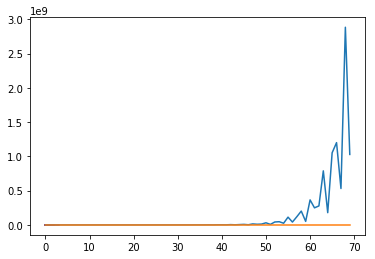

Y1 (248612300.0, 70) (-123.29707483214717, 70)


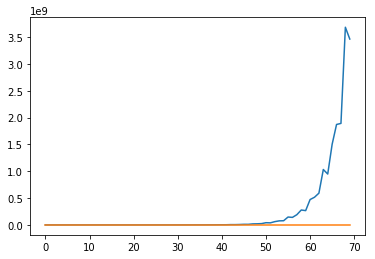

Y2 (186058480.0, 70) (-57.211802661393456, 70)


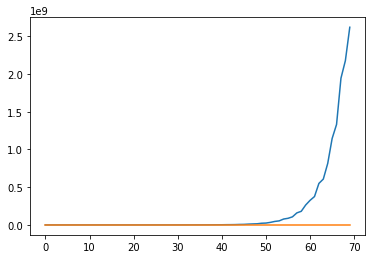

Y3 (253310340.0, 70) (-118.39979260065327, 70)


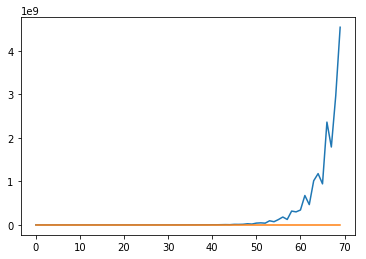

Y4 (595541900.0, 70) (-82.19615884389388, 70)


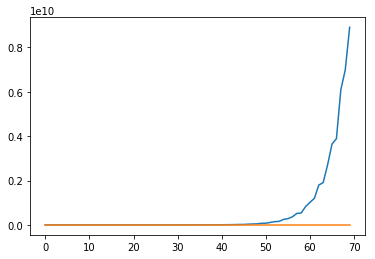

Y5 (-136576030.0, 70) (3.8142857142857145, 70)


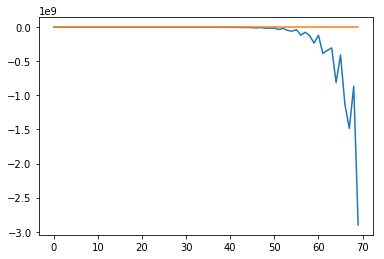

Y6 (-610008960.0, 70) (65.16428571428571, 70)


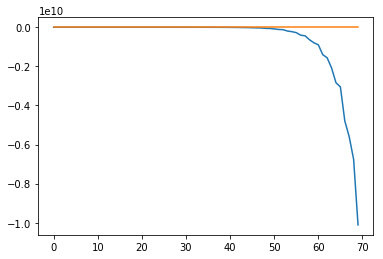

Y7 (10442946.0, 70) (94.29690529378821, 70)


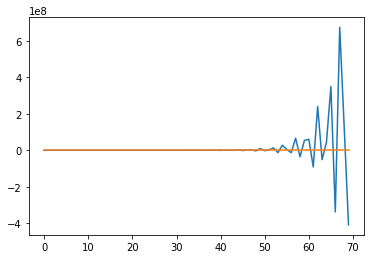

Y8 (-490230460.0, 70) (176.28982314984253, 70)


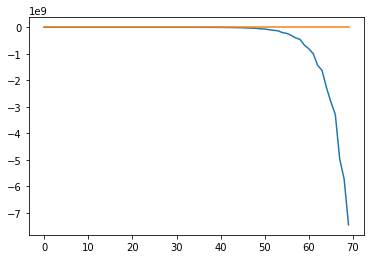

Y9 (-224510200.0, 70) (-0.36428571428571427, 70)


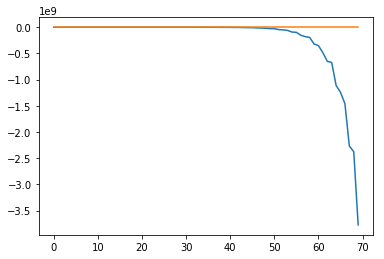

Y10 (-355038100.0, 70) (0.12857142857142856, 70)


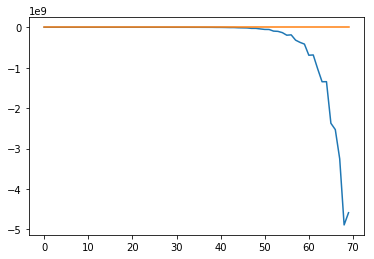

Y11 (-40879372.0, 70) (0.0035714285714285713, 70)


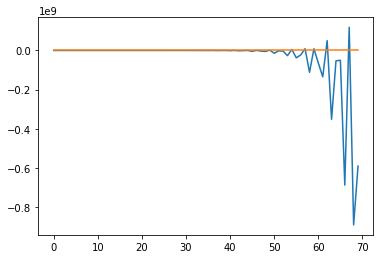

Y12 (-105956780.0, 70) (0.1, 70)


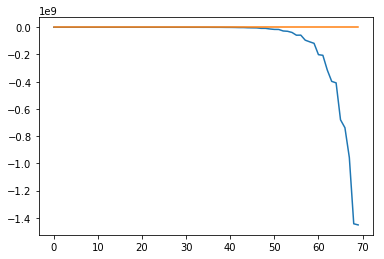

Y13 (80236270.0, 70) (0.18571428571428572, 70)


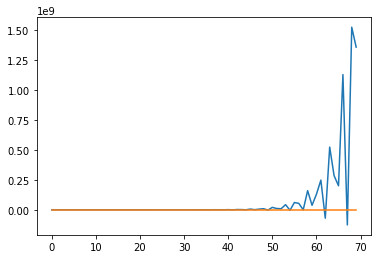

Y14 (263341700.0, 70) (0.18571428571428572, 70)


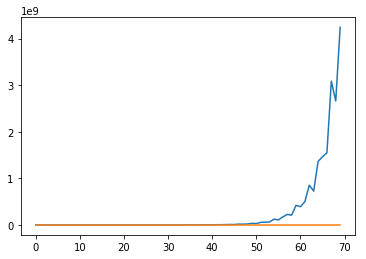

Y15 (-328516700.0, 70) (0.18571428571428572, 70)


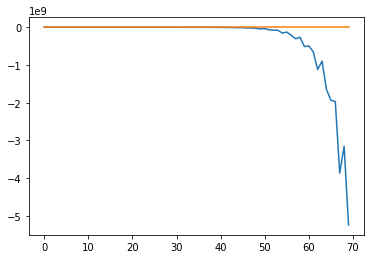

Y16 (247874140.0, 70) (0.08571428571428572, 70)


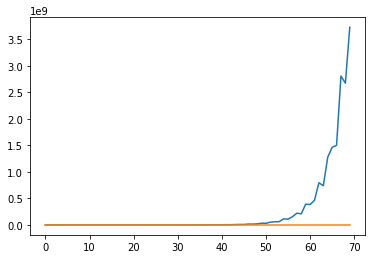

Y17 (254431700.0, 70) (0.12857142857142856, 70)


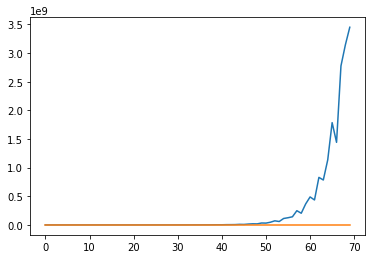

Y18 (-221981700.0, 70) (0.12857142857142856, 70)


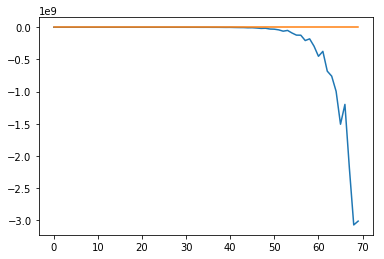

Y19 (-40008764.0, 70) (0.0035714285714285713, 70)


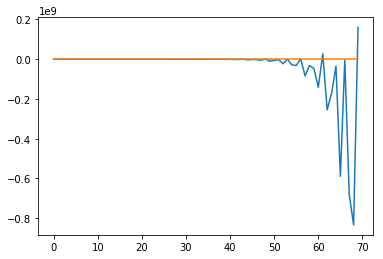

TEST recursive (9.212933262189166, -1262160100.0)
episode: 4   score: 1.4375   memory length: 1250   epsilon: 0.28632566791652947
hit
hit
episode: 5   score: 2.3125   memory length: 1500   epsilon: 0.22296276370290227
Y0 (107706376.0, 70) (146.07142857142858, 70)


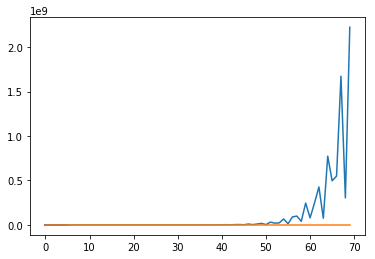

Y1 (188938690.0, 70) (-73.67256647675266, 70)


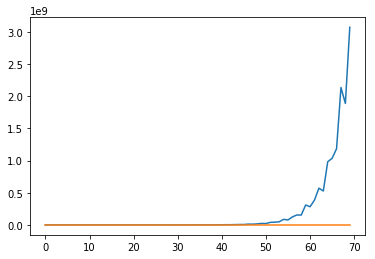

Y2 (144312580.0, 70) (-74.0492223064726, 70)


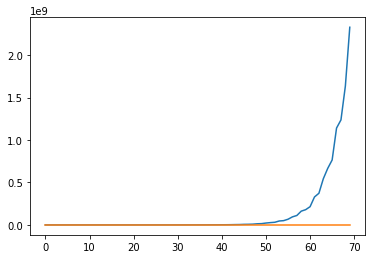

Y3 (174706530.0, 70) (-178.95621339149568, 70)


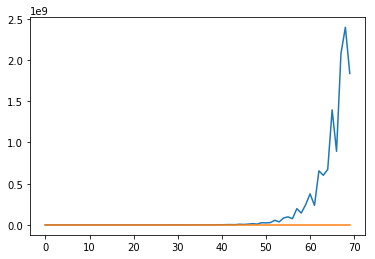

Y4 (458770850.0, 70) (-139.39132482085222, 70)


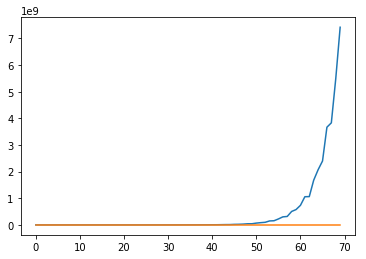

Y5 (-93064520.0, 70) (3.342857142857143, 70)


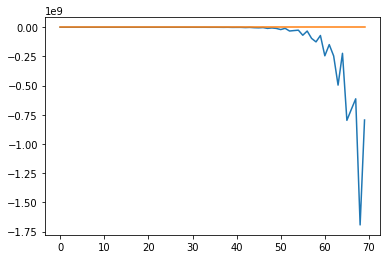

Y6 (-449450850.0, 70) (98.19285714285714, 70)


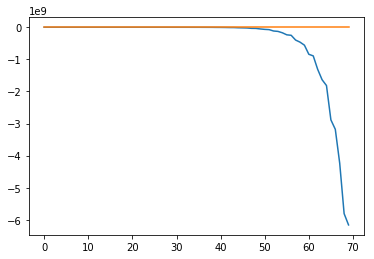

Y7 (20622362.0, 70) (143.2798945588403, 70)


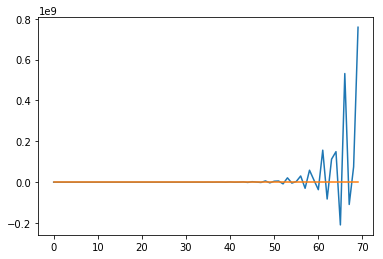

Y8 (-374151140.0, 70) (218.99354800701715, 70)


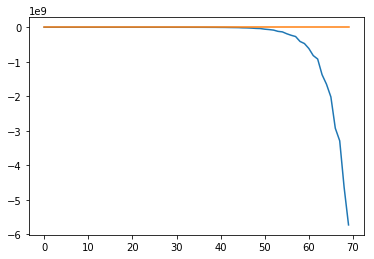

Y9 (-168516450.0, 70) (0.4642857142857143, 70)


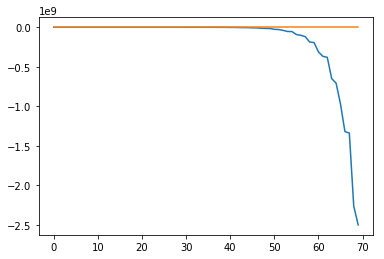

Y10 (-278471460.0, 70) (0.1, 70)


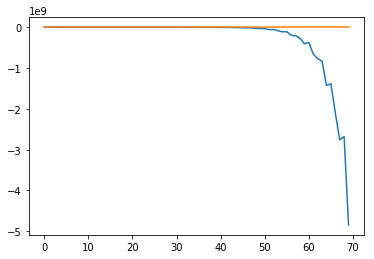

Y11 (-22565474.0, 70) (0.014285714285714285, 70)


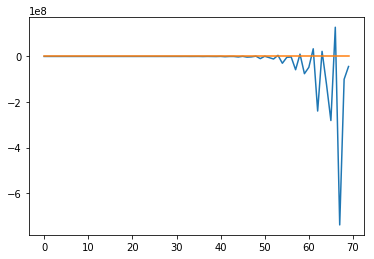

Y12 (-83214650.0, 70) (0.12857142857142856, 70)


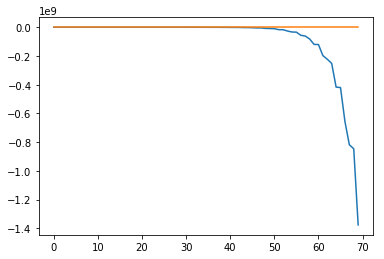

Y13 (50990396.0, 70) (0.12857142857142856, 70)


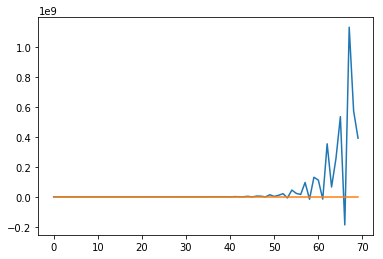

Y14 (202866720.0, 70) (0.12857142857142856, 70)


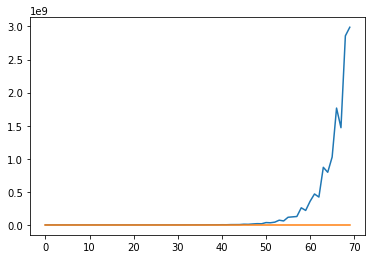

Y15 (-255252220.0, 70) (0.24285714285714285, 70)


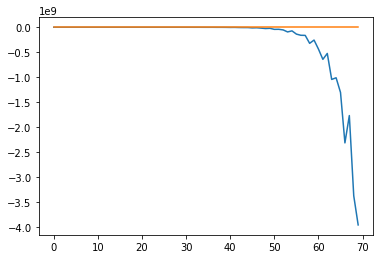

Y16 (193089520.0, 70) (0.18571428571428572, 70)


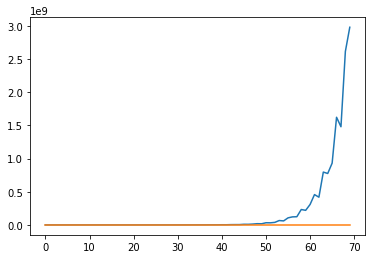

Y17 (203212660.0, 70) (0.08571428571428572, 70)


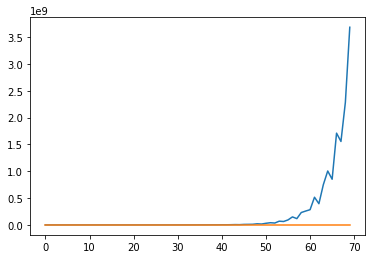

Y18 (-176511900.0, 70) (0.1, 70)


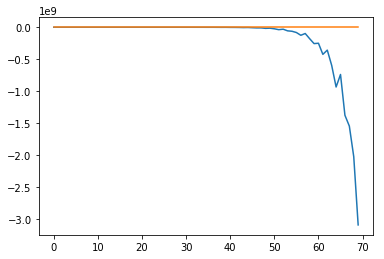

Y19 (-43243148.0, 70) (0.014285714285714285, 70)


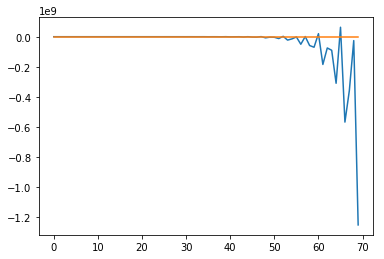

TEST recursive (8.462784497956727, -1371514800.0)
hit
Y0 (89584510.0, 70) (129.5, 70)


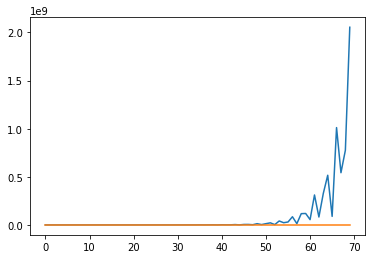

Y1 (147192580.0, 70) (-116.3623042467715, 70)


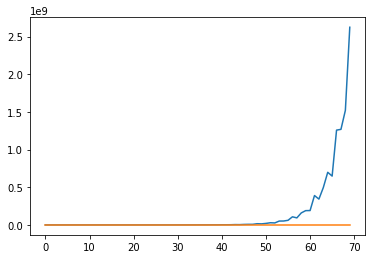

Y2 (109418216.0, 70) (-101.41641418860247, 70)


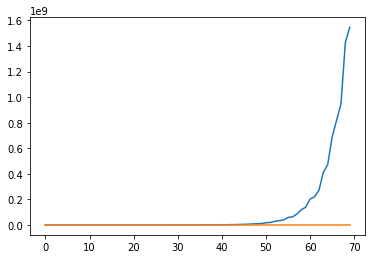

Y3 (142529360.0, 70) (-205.64326530755164, 70)


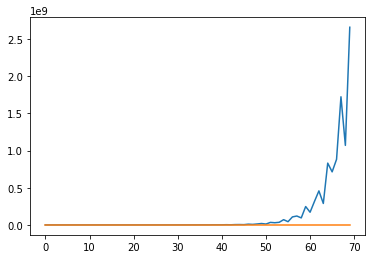

Y4 (341132480.0, 70) (-122.57865137517992, 70)


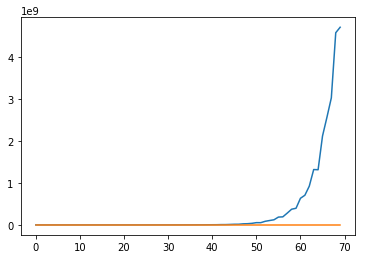

Y5 (-72847660.0, 70) (3.342857142857143, 70)


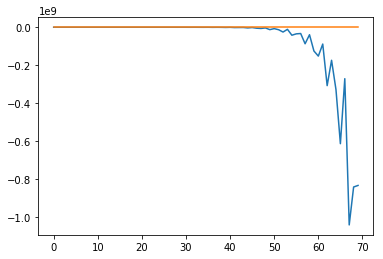

Y6 (-348025250.0, 70) (53.48571428571429, 70)


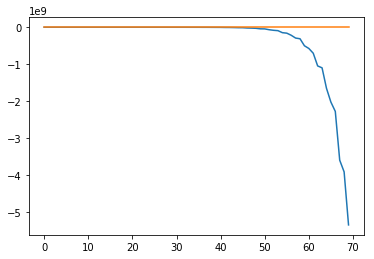

Y7 (10086391.0, 70) (122.57865137517992, 70)


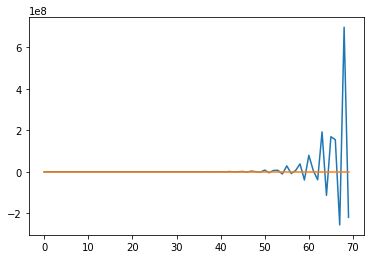

Y8 (-281075600.0, 70) (205.64326530755164, 70)


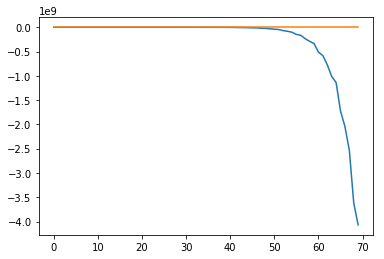

Y9 (-124810940.0, 70) (-0.5642857142857143, 70)


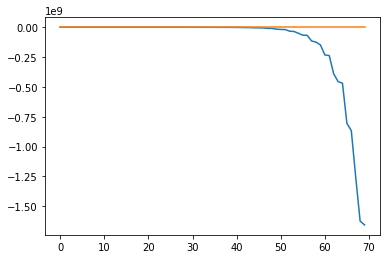

Y10 (-212633010.0, 70) (0.12857142857142856, 70)


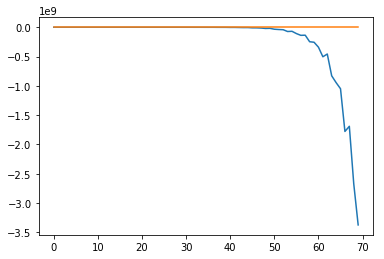

Y11 (-25831992.0, 70) (0.01607142857142857, 70)


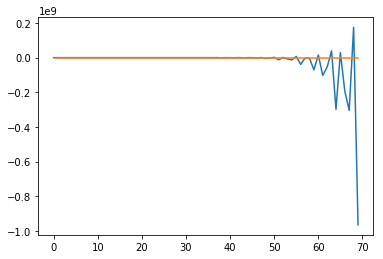

Y12 (-64791050.0, 70) (0.12857142857142856, 70)


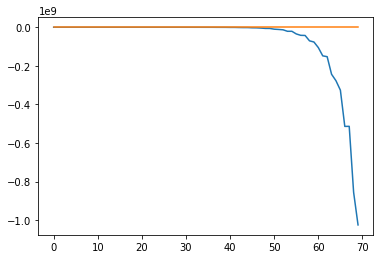

Y13 (46783790.0, 70) (0.11428571428571428, 70)


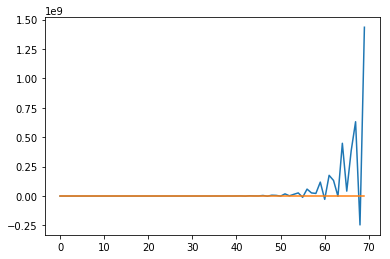

Y14 (148836370.0, 70) (0.11428571428571428, 70)


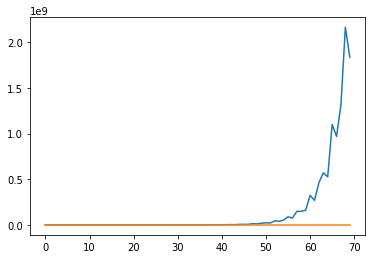

Y15 (-187467700.0, 70) (0.12857142857142856, 70)


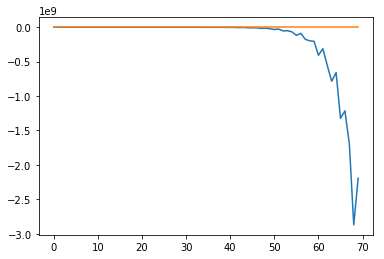

Y16 (140314540.0, 70) (0.15714285714285714, 70)


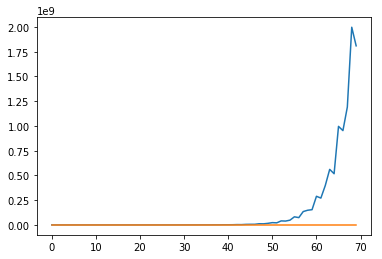

Y17 (145952910.0, 70) (0.22857142857142856, 70)


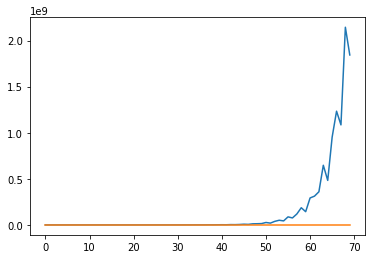

Y18 (-128246610.0, 70) (0.12857142857142856, 70)


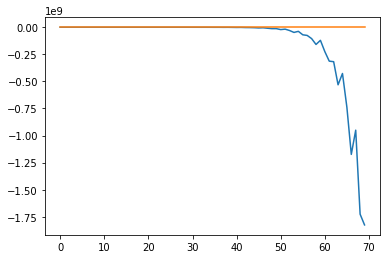

Y19 (-30832040.0, 70) (0.01607142857142857, 70)


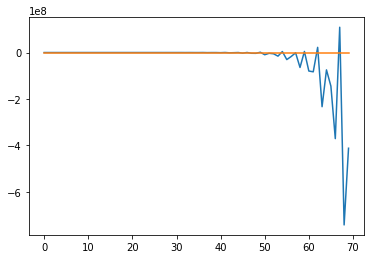

TEST recursive (8.441831179913539, -971048640.0)
episode: 6   score: 1.25   memory length: 1750   epsilon: 0.17362185639789907
hit
episode: 7   score: 1.9375   memory length: 2000   epsilon: 0.1351999253974994
episode: 8   score: 0.6875   memory length: 2250   epsilon: 0.10528063808739813
episode: 9   score: 1.0   memory length: 2500   epsilon: 0.08198238810784661
Y0 (101563600.0, 70) (197.5, 70)


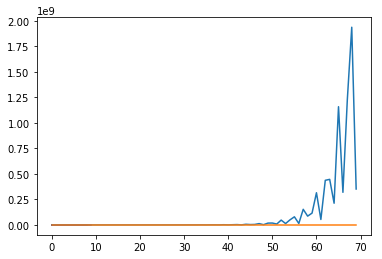

Y1 (195393100.0, 70) (-85.6386165141078, 70)


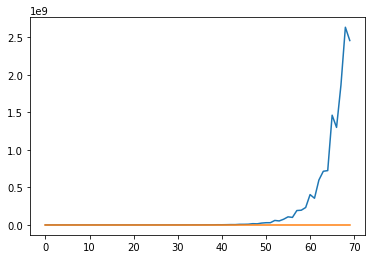

Y2 (156688500.0, 70) (28.835671707771265, 70)


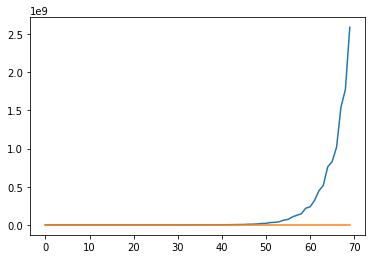

Y3 (196664560.0, 70) (-82.10525532842507, 70)


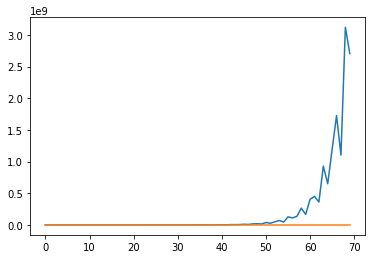

Y4 (485952670.0, 70) (11.597030692886305, 70)


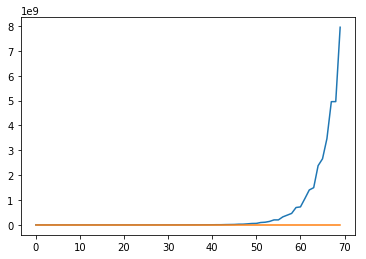

Y5 (-113557820.0, 70) (4.057142857142857, 70)


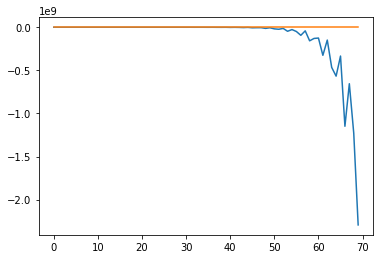

Y6 (-495055680.0, 70) (59.97142857142857, 70)


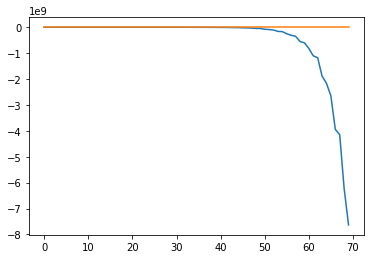

Y7 (17528848.0, 70) (42.53760678341224, 70)


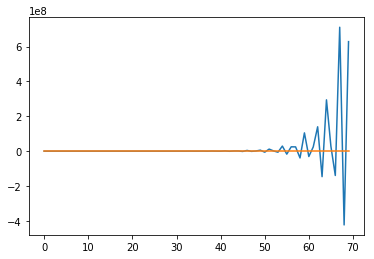

Y8 (-398929920.0, 70) (215.87508468618807, 70)


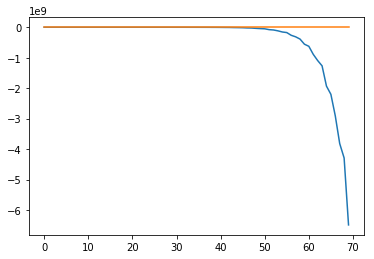

Y9 (-179696260.0, 70) (-1.4214285714285715, 70)


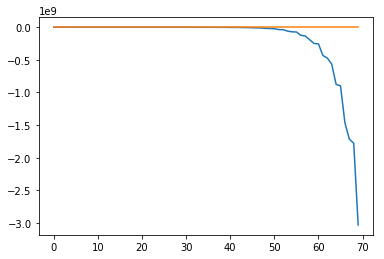

Y10 (-289096930.0, 70) (0.12857142857142856, 70)


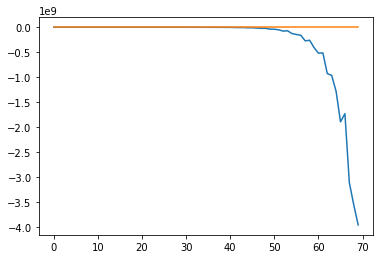

Y11 (-28101430.0, 70) (0.0, 70)


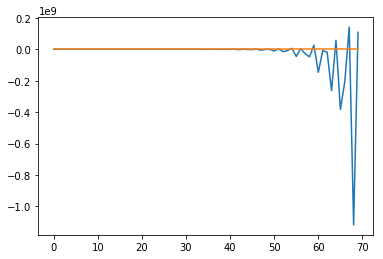

Y12 (-87041610.0, 70) (0.2, 70)


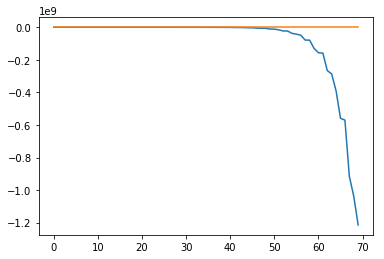

Y13 (57454610.0, 70) (0.11428571428571428, 70)


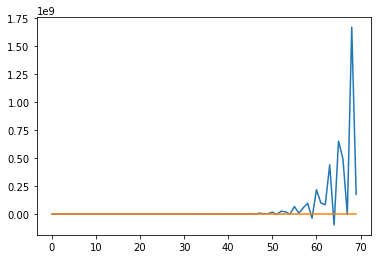

Y14 (221757060.0, 70) (0.08571428571428572, 70)


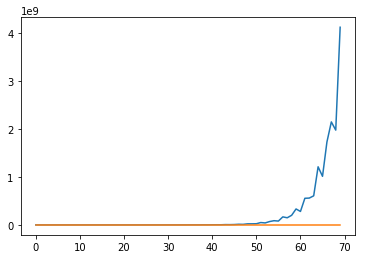

Y15 (-277130300.0, 70) (0.07142857142857142, 70)


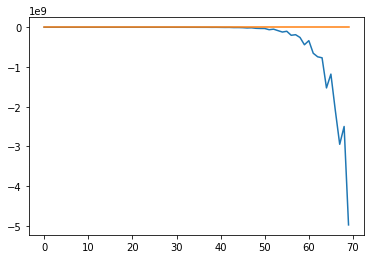

Y16 (208375550.0, 70) (0.1, 70)


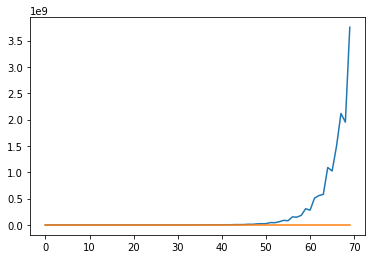

Y17 (210611330.0, 70) (0.3, 70)


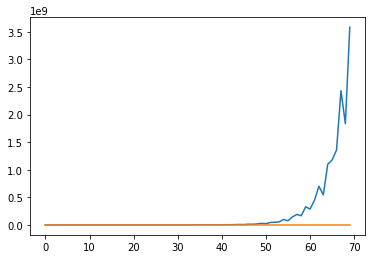

Y18 (-177870080.0, 70) (0.12857142857142856, 70)


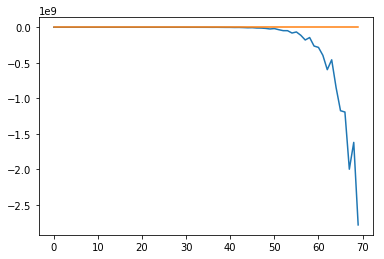

Y19 (-39866876.0, 70) (0.0, 70)


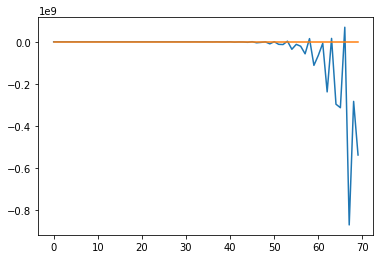

TEST recursive (8.412584091463794, -1264633600.0)
episode: 10   score: 0.4375   memory length: 2750   epsilon: 0.06383996223774882
Epoch 1/2
50/50 [==============================] - 1s 17ms/step - loss: 8297.7822
Epoch 2/2
50/50 [==============================] - 0s 193us/step - loss: 8317.0664
self-test 15.53396918434702
Epoch 1/60
3000/3000 [==============================] - 0s 22us/step - loss: 8653.2734
Epoch 2/60
3000/3000 [==============================] - 0s 20us/step - loss: 8629.1582
Epoch 3/60
3000/3000 [==============================] - 0s 19us/step - loss: 8608.9902
Epoch 4/60
3000/3000 [==============================] - 0s 19us/step - loss: 8584.4141
Epoch 5/60
3000/3000 [==============================] - 0s 23us/step - loss: 8559.3682
Epoch 6/60
3000/3000 [==============================] - 0s 24us/step - loss: 8536.6719
Epoch 7/60
3000/3000 [==============================] - 0s 20us/step - loss: 8509.5283
Epoch 8/60
3000/3000 [==============================] - 0s 23us/ste

Epoch 31/60
3000/3000 [==============================] - 0s 21us/step - loss: 7058.5903
Epoch 32/60
3000/3000 [==============================] - 0s 20us/step - loss: 7035.8657
Epoch 33/60
3000/3000 [==============================] - 0s 22us/step - loss: 7026.1938
Epoch 34/60
3000/3000 [==============================] - 0s 21us/step - loss: 7000.4268
Epoch 35/60
3000/3000 [==============================] - 0s 20us/step - loss: 6989.7021
Epoch 36/60
3000/3000 [==============================] - 0s 21us/step - loss: 6972.2295
Epoch 37/60
3000/3000 [==============================] - 0s 20us/step - loss: 6963.5386
Epoch 38/60
3000/3000 [==============================] - 0s 20us/step - loss: 6944.0776
Epoch 39/60
3000/3000 [==============================] - 0s 19us/step - loss: 6926.6973
Epoch 40/60
3000/3000 [==============================] - 0s 22us/step - loss: 6905.2773
Epoch 41/60
3000/3000 [==============================] - 0s 20us/step - loss: 6887.3091
Epoch 42/60
3000/3000 [=========

Epoch 5/60
3000/3000 [==============================] - 0s 21us/step - loss: 5326.2495
Epoch 6/60
3000/3000 [==============================] - 0s 20us/step - loss: 5314.9478
Epoch 7/60
3000/3000 [==============================] - 0s 23us/step - loss: 5294.0942
Epoch 8/60
3000/3000 [==============================] - 0s 24us/step - loss: 5268.4375
Epoch 9/60
3000/3000 [==============================] - 0s 21us/step - loss: 5252.8125
Epoch 10/60
3000/3000 [==============================] - 0s 20us/step - loss: 5231.7065
Epoch 11/60
3000/3000 [==============================] - 0s 21us/step - loss: 5211.5459
Epoch 12/60
3000/3000 [==============================] - 0s 22us/step - loss: 5200.3716
Epoch 13/60
3000/3000 [==============================] - 0s 22us/step - loss: 5170.6626
Epoch 14/60
3000/3000 [==============================] - 0s 23us/step - loss: 5138.8833
Epoch 15/60
3000/3000 [==============================] - 0s 19us/step - loss: 5122.9541
Epoch 16/60
3000/3000 [==============

Epoch 1/2
50/50 [==============================] - 0s 141us/step - loss: 5161.0229
Epoch 2/2
50/50 [==============================] - 0s 163us/step - loss: 5062.9707
Epoch 1/2
50/50 [==============================] - 0s 159us/step - loss: 5049.5967
Epoch 2/2
50/50 [==============================] - 0s 161us/step - loss: 4896.2212
self-test 1.028543200711771
Epoch 1/2
50/50 [==============================] - 0s 193us/step - loss: 2761.5281
Epoch 2/2
50/50 [==============================] - 0s 172us/step - loss: 2597.6633
Epoch 1/2
50/50 [==============================] - 0s 164us/step - loss: 2800.1646
Epoch 2/2
50/50 [==============================] - 0s 172us/step - loss: 2748.9333
Epoch 1/2
50/50 [==============================] - 0s 168us/step - loss: 2721.9050
Epoch 2/2
50/50 [==============================] - 0s 167us/step - loss: 2794.0984
Epoch 1/2
50/50 [==============================] - 0s 163us/step - loss: 2681.4958
Epoch 2/2
50/50 [==============================] - 0s 159us

Epoch 1/2
50/50 [==============================] - 0s 178us/step - loss: 1815.4069
Epoch 2/2
50/50 [==============================] - 0s 173us/step - loss: 1921.8928
Epoch 1/2
50/50 [==============================] - 0s 185us/step - loss: 1891.1292
Epoch 2/2
50/50 [==============================] - 0s 174us/step - loss: 1862.4562
self-test 0.8646762443112939
Epoch 1/2
50/50 [==============================] - 0s 166us/step - loss: 1919.9054
Epoch 2/2
50/50 [==============================] - 0s 160us/step - loss: 1891.1168
Epoch 1/2
50/50 [==============================] - 0s 173us/step - loss: 1913.5417
Epoch 2/2
50/50 [==============================] - 0s 165us/step - loss: 1801.9705
Epoch 1/2
50/50 [==============================] - 0s 159us/step - loss: 1888.0963
Epoch 2/2
50/50 [==============================] - 0s 152us/step - loss: 1780.2717
Epoch 1/2
50/50 [==============================] - 0s 152us/step - loss: 1771.7728
Epoch 2/2
50/50 [==============================] - 0s 154u

self-test 0.754720625712044
Epoch 1/2
50/50 [==============================] - 0s 186us/step - loss: 1130.5691
Epoch 2/2
50/50 [==============================] - 0s 181us/step - loss: 1098.7446
self-test 0.7281310222489685
Epoch 1/2
50/50 [==============================] - 0s 191us/step - loss: 808.1633
Epoch 2/2
50/50 [==============================] - 0s 175us/step - loss: 855.2413
Epoch 1/2
50/50 [==============================] - 0s 168us/step - loss: 840.6351
Epoch 2/2
50/50 [==============================] - 0s 172us/step - loss: 723.3925
Epoch 1/2
50/50 [==============================] - 0s 158us/step - loss: 739.4037
Epoch 2/2
50/50 [==============================] - 0s 161us/step - loss: 724.7650
Epoch 1/2
50/50 [==============================] - 0s 175us/step - loss: 791.3190
Epoch 2/2
50/50 [==============================] - 0s 164us/step - loss: 741.7400
self-test 0.7841939352014585
Epoch 1/2
50/50 [==============================] - 0s 204us/step - loss: 818.4158
Epoch 2/2


Epoch 2/2
50/50 [==============================] - 0s 163us/step - loss: 1324.9449
Epoch 1/2
50/50 [==============================] - 0s 177us/step - loss: 1220.4382
Epoch 2/2
50/50 [==============================] - 0s 186us/step - loss: 1203.9636
self-test 0.8022336159760435
Epoch 1/2
50/50 [==============================] - 0s 171us/step - loss: 831.3234
Epoch 2/2
50/50 [==============================] - 0s 168us/step - loss: 863.7571
Epoch 1/2
50/50 [==============================] - 0s 166us/step - loss: 833.5422
Epoch 2/2
50/50 [==============================] - 0s 169us/step - loss: 815.9291
Epoch 1/2
50/50 [==============================] - 0s 165us/step - loss: 786.3242
Epoch 2/2
50/50 [==============================] - 0s 184us/step - loss: 795.3846
Epoch 1/2
50/50 [==============================] - 0s 172us/step - loss: 825.0363
Epoch 2/2
50/50 [==============================] - 0s 169us/step - loss: 723.1483
self-test 1.0183840468246466
Epoch 1/2
50/50 [====================

Epoch 1/2
50/50 [==============================] - 0s 174us/step - loss: 839.5021
Epoch 2/2
50/50 [==============================] - 0s 154us/step - loss: 791.5271
Epoch 1/2
50/50 [==============================] - 0s 158us/step - loss: 878.3214
Epoch 2/2
50/50 [==============================] - 0s 155us/step - loss: 775.1517
Epoch 1/2
50/50 [==============================] - 0s 161us/step - loss: 790.1605
Epoch 2/2
50/50 [==============================] - 0s 160us/step - loss: 801.4863
Epoch 1/2
50/50 [==============================] - 0s 169us/step - loss: 737.2391
Epoch 2/2
50/50 [==============================] - 0s 165us/step - loss: 769.6299
self-test 0.7427297411913484
Epoch 1/2
50/50 [==============================] - 0s 175us/step - loss: 530.7330
Epoch 2/2
50/50 [==============================] - 0s 165us/step - loss: 559.6086
Epoch 1/2
50/50 [==============================] - 0s 174us/step - loss: 585.9536
Epoch 2/2
50/50 [==============================] - 0s 163us/step - lo

Epoch 2/2
50/50 [==============================] - 0s 176us/step - loss: 686.9551
Epoch 1/2
50/50 [==============================] - 0s 187us/step - loss: 748.5337
Epoch 2/2
50/50 [==============================] - 0s 170us/step - loss: 649.8619
self-test 0.756559111940111
Epoch 1/2
50/50 [==============================] - 0s 182us/step - loss: 426.4329
Epoch 2/2
50/50 [==============================] - 0s 179us/step - loss: 439.3068
Epoch 1/2
50/50 [==============================] - 0s 168us/step - loss: 441.8636
Epoch 2/2
50/50 [==============================] - 0s 174us/step - loss: 486.6968
Epoch 1/2
50/50 [==============================] - 0s 172us/step - loss: 406.9503
Epoch 2/2
50/50 [==============================] - 0s 180us/step - loss: 438.1456
Epoch 1/2
50/50 [==============================] - 0s 158us/step - loss: 383.8953
Epoch 2/2
50/50 [==============================] - 0s 168us/step - loss: 446.1035
self-test 1.1066264517386373
Epoch 1/2
50/50 [========================

Epoch 2/2
50/50 [==============================] - 0s 170us/step - loss: 489.7783
Epoch 1/2
50/50 [==============================] - 0s 162us/step - loss: 660.8015
Epoch 2/2
50/50 [==============================] - 0s 189us/step - loss: 538.1828
self-test 0.6972112576893297
Epoch 1/2
50/50 [==============================] - 0s 177us/step - loss: 856.4396
Epoch 2/2
50/50 [==============================] - 0s 170us/step - loss: 892.5353
Epoch 1/2
50/50 [==============================] - 0s 179us/step - loss: 953.6791
Epoch 2/2
50/50 [==============================] - 0s 167us/step - loss: 869.7504
Epoch 1/2
50/50 [==============================] - 0s 167us/step - loss: 965.0406
Epoch 2/2
50/50 [==============================] - 0s 172us/step - loss: 912.1826
Epoch 1/2
50/50 [==============================] - 0s 170us/step - loss: 826.7244
Epoch 2/2
50/50 [==============================] - 0s 159us/step - loss: 791.7168
self-test 0.7509973566763458
Epoch 1/2
50/50 [=======================

Epoch 2/2
50/50 [==============================] - 0s 168us/step - loss: 477.3813
Epoch 1/2
50/50 [==============================] - 0s 156us/step - loss: 461.3122
Epoch 2/2
50/50 [==============================] - 0s 148us/step - loss: 431.7738
self-test 0.7274674774799996
Epoch 1/2
50/50 [==============================] - 0s 169us/step - loss: 1030.8812
Epoch 2/2
50/50 [==============================] - 0s 173us/step - loss: 994.4910
Epoch 1/2
50/50 [==============================] - 0s 166us/step - loss: 1067.3138
Epoch 2/2
50/50 [==============================] - 0s 168us/step - loss: 1059.4417
Epoch 1/2
50/50 [==============================] - 0s 162us/step - loss: 1015.6841
Epoch 2/2
50/50 [==============================] - 0s 179us/step - loss: 947.2420
Epoch 1/2
50/50 [==============================] - 0s 159us/step - loss: 1043.0049
Epoch 2/2
50/50 [==============================] - 0s 164us/step - loss: 934.4758
self-test 0.7871920725406065
Epoch 1/2
50/50 [==================

Epoch 2/2
50/50 [==============================] - 0s 176us/step - loss: 602.2206
Epoch 1/2
50/50 [==============================] - 0s 183us/step - loss: 522.6259
Epoch 2/2
50/50 [==============================] - 0s 169us/step - loss: 582.2383
self-test 0.718269840536449
Epoch 1/2
50/50 [==============================] - 0s 169us/step - loss: 758.9837
Epoch 2/2
50/50 [==============================] - 0s 164us/step - loss: 728.3961
Epoch 1/2
50/50 [==============================] - 0s 179us/step - loss: 726.1888
Epoch 2/2
50/50 [==============================] - 0s 168us/step - loss: 737.2384
Epoch 1/2
50/50 [==============================] - 0s 158us/step - loss: 766.5270
Epoch 2/2
50/50 [==============================] - 0s 170us/step - loss: 735.4009
Epoch 1/2
50/50 [==============================] - 0s 164us/step - loss: 738.1193
Epoch 2/2
50/50 [==============================] - 0s 161us/step - loss: 610.3827
self-test 0.8941445534777793
Epoch 1/2
50/50 [========================

Epoch 1/1
3500/3500 [==============================] - 0s 28us/step - loss: 487.7573
self-test 0.6946045269016752
episode: 13   score: 1.125   memory length: 3500   epsilon: 0.030144549019052724
Epoch 1/1
3750/3750 [==============================] - 0s 26us/step - loss: 544.4294
self-test 0.687186983339767
episode: 14   score: 0.25   memory length: 3750   epsilon: 0.023473662032371355
Epoch 1/1
4000/4000 [==============================] - 0s 25us/step - loss: 541.0271
self-test 0.6902790497961941
episode: 15   score: 1.3125   memory length: 4000   epsilon: 0.018279019827489446
hit
Epoch 1/1
4250/4250 [==============================] - 0s 23us/step - loss: 526.2705
self-test 0.6873600780747872
episode: 16   score: 1.75   memory length: 4250   epsilon: 0.014233934415217388
Y0 (64.8538, 70) (39.5, 70)


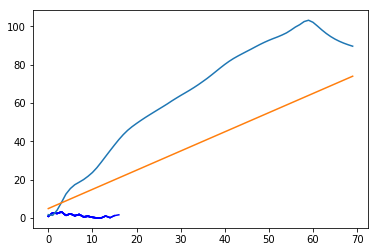

Y1 (1.1873355, 70) (-98.99861173291461, 70)


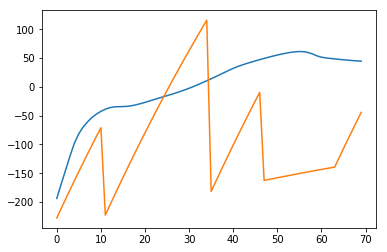

Y2 (-77.73852, 70) (-65.13465524407054, 70)


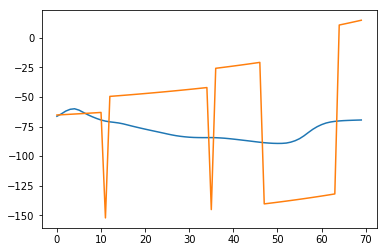

Y3 (-80.40881, 70) (-64.53004956285683, 70)


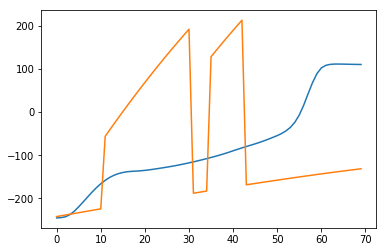

Y4 (-112.81342, 70) (-106.67491883010632, 70)


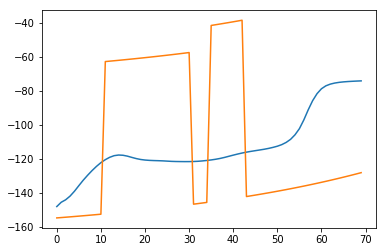

Y5 (2.8235004, 70) (4.071428571428571, 70)


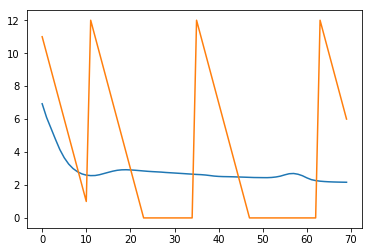

Y6 (62.369274, 70) (124.77142857142857, 70)


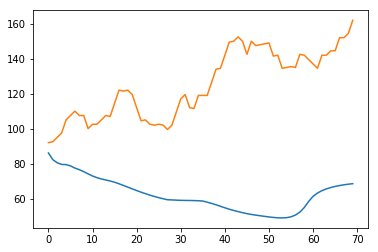

Y7 (128.19241, 70) (144.1016777040832, 70)


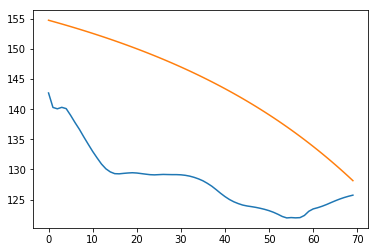

Y8 (154.03668, 70) (183.9446561546271, 70)


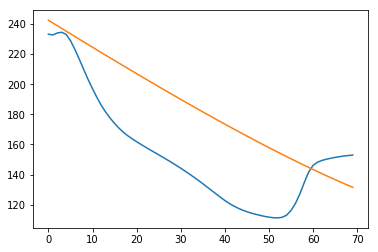

Y9 (0.27765864, 70) (1.0357142857142858, 70)


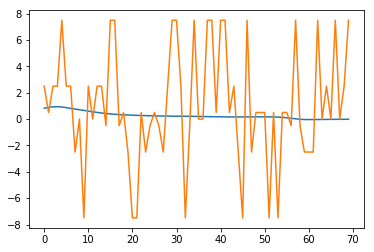

Y10 (0.09253803, 70) (0.1, 70)


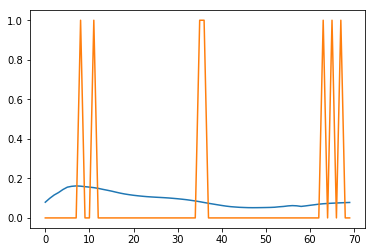

Y11 (0.009295097, 70) (0.0017857142857142857, 70)


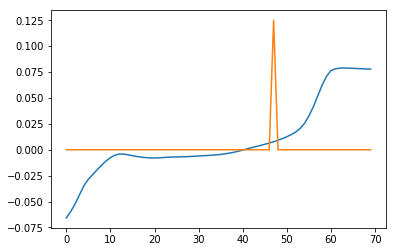

Y12 (0.08508142, 70) (0.17142857142857143, 70)


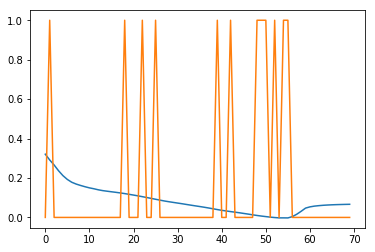

Y13 (0.20177822, 70) (0.1, 70)


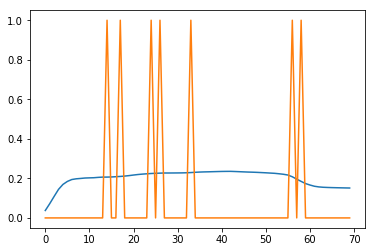

Y14 (0.15423587, 70) (0.18571428571428572, 70)


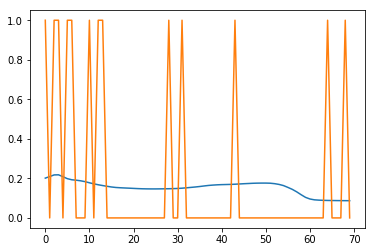

Y15 (0.19494005, 70) (0.12857142857142856, 70)


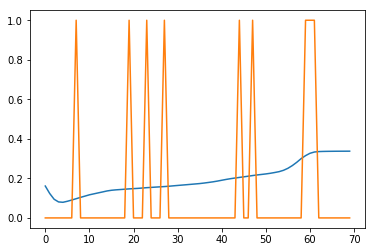

Y16 (0.052055497, 70) (0.21428571428571427, 70)


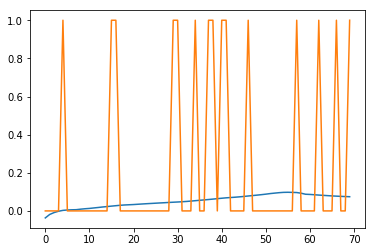

Y17 (0.2037088, 70) (0.1, 70)


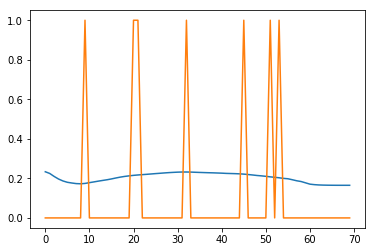

Y18 (0.092948236, 70) (0.1, 70)


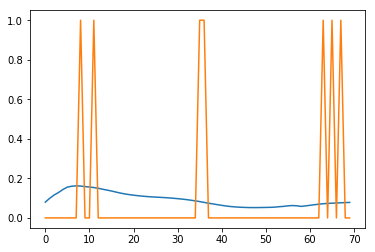

Y19 (0.009963751, 70) (0.0017857142857142857, 70)


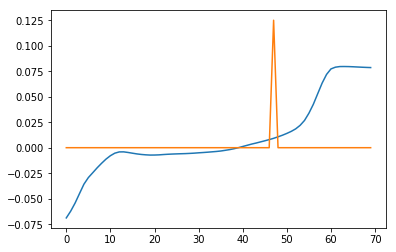

TEST recursive (8.217332828372475, 0.21408133)
Epoch 1/1
4500/4500 [==============================] - 0s 20us/step - loss: 442.9575
self-test 0.6750832859866513
episode: 17   score: 0.5   memory length: 4500   epsilon: 0.011084012756089733
Epoch 1/1
4750/4750 [==============================] - 0s 20us/step - loss: 506.1891
self-test 0.6826325651432403
episode: 18   score: 0.0625   memory length: 4750   epsilon: 0.009998671593271896
hit
Epoch 1/1
5000/5000 [==============================] - 0s 22us/step - loss: 449.4588
self-test 0.6762669232440774
episode: 19   score: 1.6875   memory length: 5000   epsilon: 0.009998671593271896
Y0 (102.37462, 70) (202.5, 70)


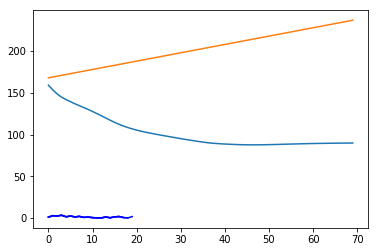

Y1 (-120.29145, 70) (-178.37968368341615, 70)


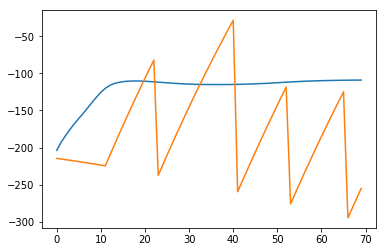

Y2 (-66.54224, 70) (-5.3862997862004205, 70)


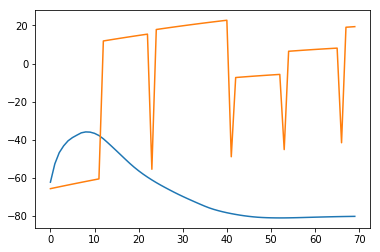

Y3 (-136.60158, 70) (-192.11070415592025, 70)


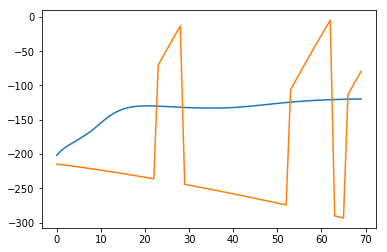

Y4 (-79.64116, 70) (-37.360677645846216, 70)


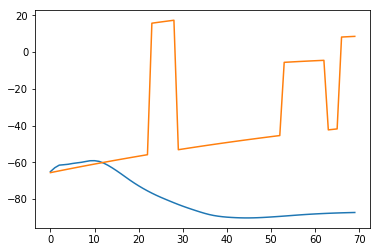

Y5 (3.4132967, 70) (5.057142857142857, 70)


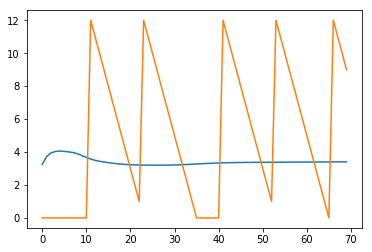

Y6 (37.147423, 70) (61.74285714285714, 70)


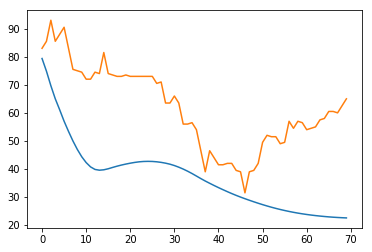

Y7 (82.18487, 70) (51.82871880225068, 70)


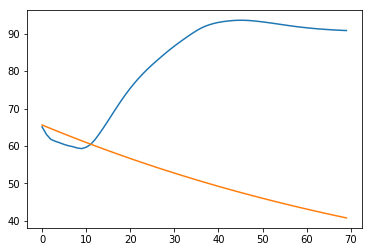

Y8 (141.53545, 70) (253.0808252887764, 70)


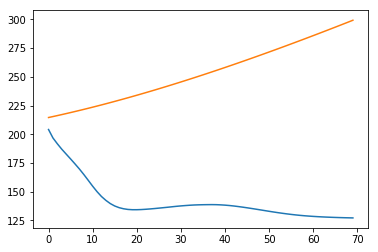

Y9 (-0.43105876, 70) (-0.25, 70)


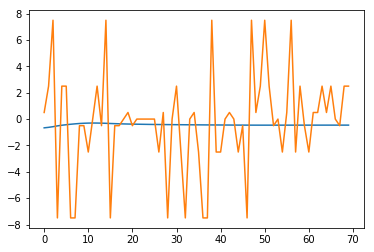

Y10 (0.16370723, 70) (0.18571428571428572, 70)


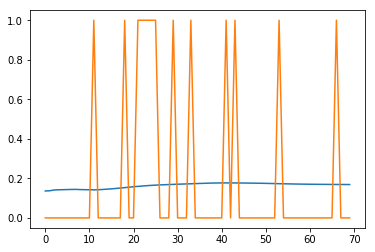

Y11 (0.0098689385, 70) (0.005357142857142857, 70)


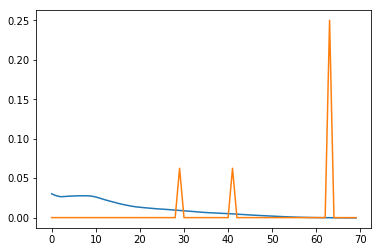

Y12 (0.27382237, 70) (0.14285714285714285, 70)


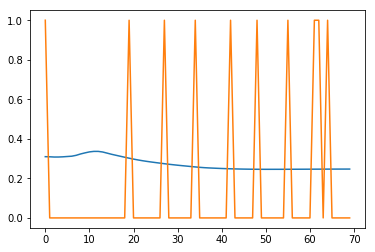

Y13 (0.073328085, 70) (0.14285714285714285, 70)


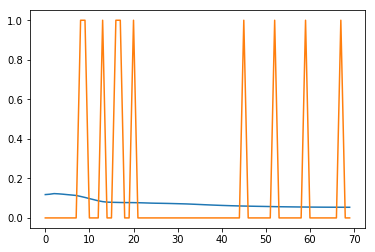

Y14 (0.23138537, 70) (0.17142857142857143, 70)


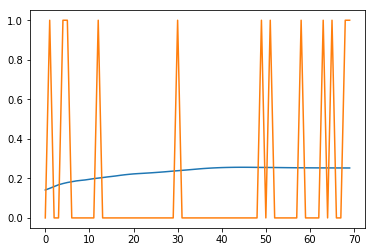

Y15 (0.040937573, 70) (0.14285714285714285, 70)


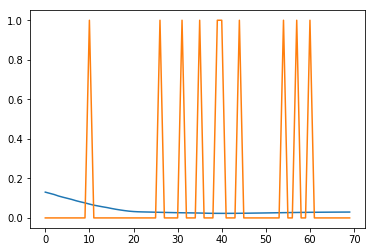

Y16 (0.05558323, 70) (0.08571428571428572, 70)


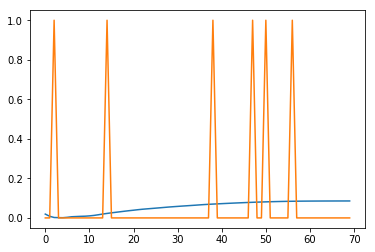

Y17 (0.16977619, 70) (0.12857142857142856, 70)


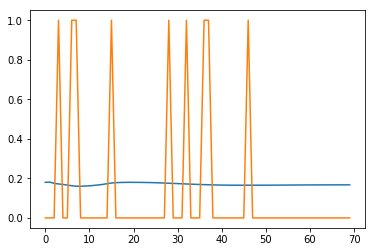

Y18 (0.16421053, 70) (0.18571428571428572, 70)


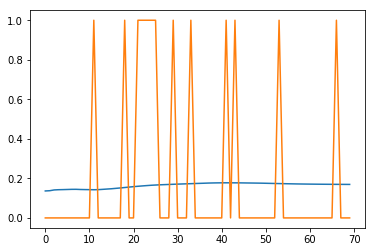

Y19 (0.009825627, 70) (0.005357142857142857, 70)


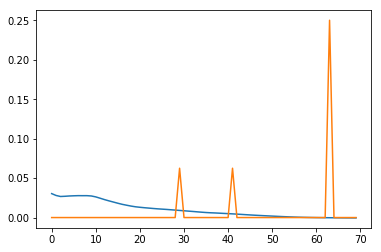

TEST recursive (8.174839149697018, 0.49047133)
Epoch 1/1
5250/5250 [==============================] - 0s 22us/step - loss: 418.3539
self-test 0.6733878625747398
episode: 20   score: 0.5625   memory length: 5250   epsilon: 0.009998671593271896
Epoch 1/1
5500/5500 [==============================] - 0s 22us/step - loss: 434.9129
self-test 0.667247846341934
episode: 21   score: 0.1875   memory length: 5500   epsilon: 0.009998671593271896
Epoch 1/1
5750/5750 [==============================] - 0s 19us/step - loss: 412.8312
self-test 0.6601601645019175
episode: 22   score: 0.625   memory length: 5750   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 19us/step - loss: 400.7552
self-test 0.6514655917359635
episode: 23   score: 0   memory length: 6000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 25us/step - loss: 397.6463
self-test 0.6508076219859578
episode: 24   score: 0.625   memory length: 6250   epsilon: 0.

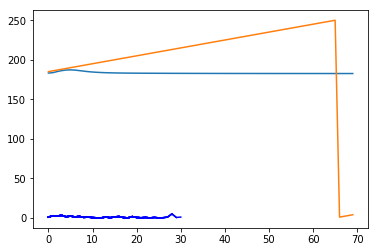

Y1 (97.00297, 70) (-139.0149243640361, 70)


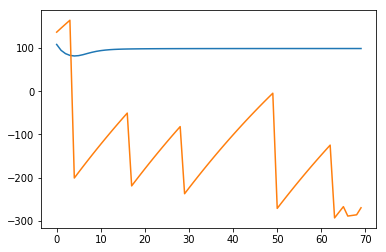

Y2 (90.511826, 70) (41.83290717117851, 70)


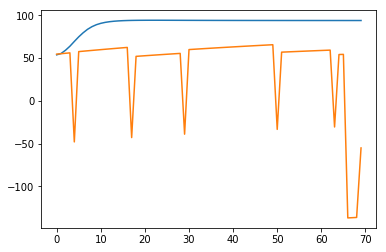

Y3 (-169.54347, 70) (-53.078974928774635, 70)


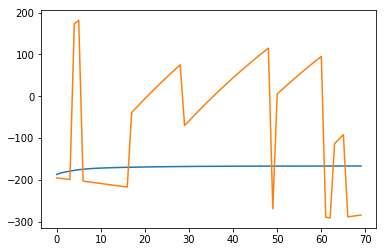

Y4 (-1.7829047, 70) (23.44123051648188, 70)


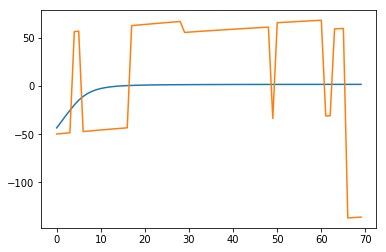

Y5 (0.57857615, 70) (5.257142857142857, 70)


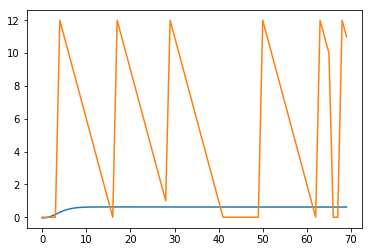

Y6 (76.939354, 70) (92.45714285714286, 70)


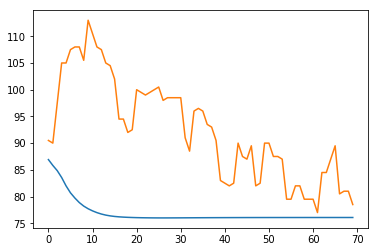

Y7 (2.9855335, 70) (44.30526150147691, 70)


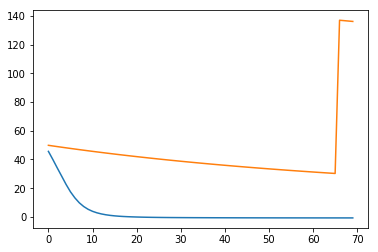

Y8 (174.27776, 70) (246.08967373054548, 70)


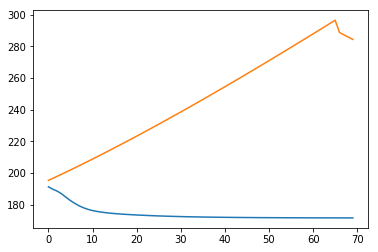

Y9 (-0.12181491, 70) (0.0, 70)


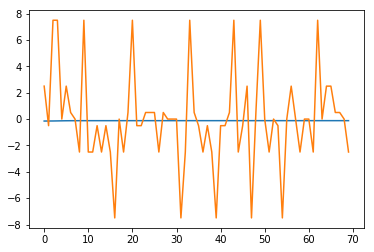

Y10 (-0.009134216, 70) (0.2, 70)


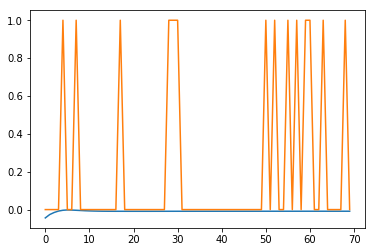

Y11 (0.010050466, 70) (0.0, 70)


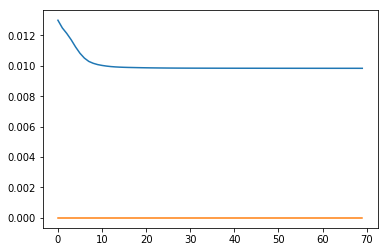

Y12 (0.19971454, 70) (0.15714285714285714, 70)


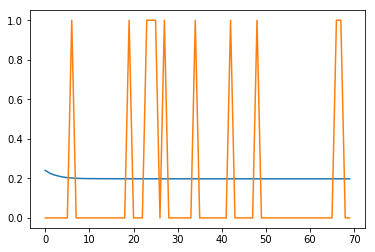

Y13 (0.19338314, 70) (0.15714285714285714, 70)


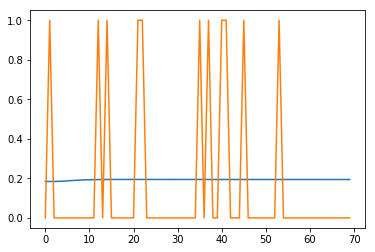

Y14 (0.15858346, 70) (0.08571428571428572, 70)


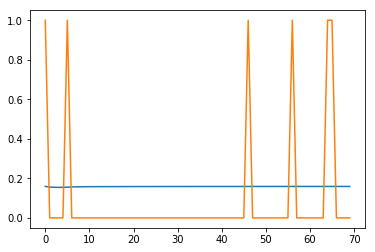

Y15 (0.08905668, 70) (0.21428571428571427, 70)


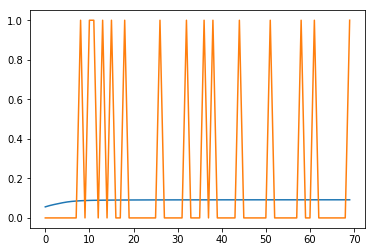

Y16 (0.11498056, 70) (0.11428571428571428, 70)


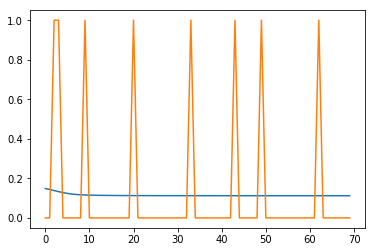

Y17 (0.25343648, 70) (0.07142857142857142, 70)


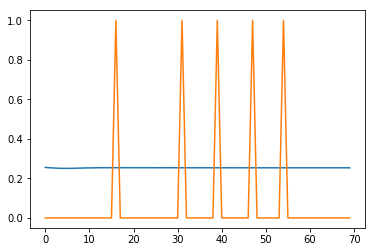

Y18 (-0.009154884, 70) (0.2, 70)


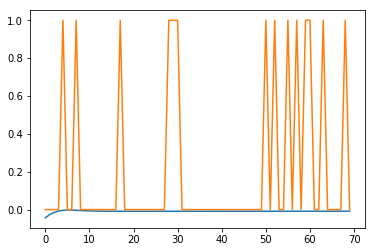

Y19 (0.010050397, 70) (0.0, 70)


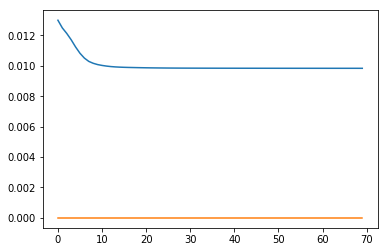

TEST recursive (8.278980307304199, 0.5890182)
Epoch 1/1
6000/6000 [==============================] - 0s 21us/step - loss: 362.2094
self-test 0.6439007149560956
episode: 31   score: 0.6875   memory length: 7000   epsilon: 0.009998671593271896
Y0 (134.29738, 70) (147.5, 70)


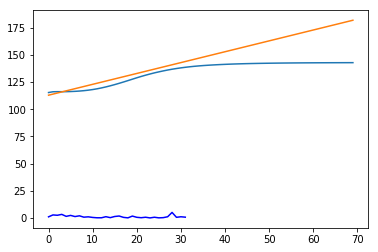

Y1 (-122.52992, 70) (-127.50117594065325, 70)


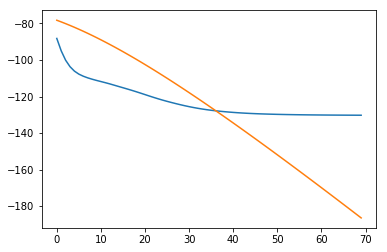

Y2 (-69.0568, 70) (-36.96823128677169, 70)


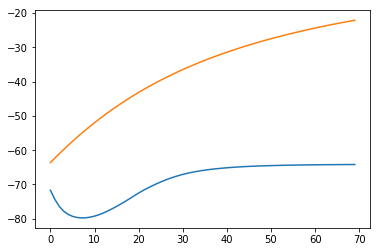

Y3 (-121.90992, 70) (-127.50117594065325, 70)


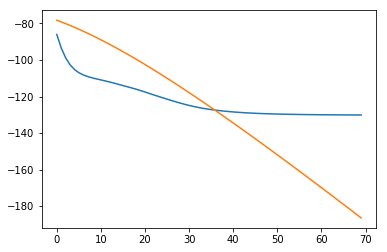

Y4 (-64.263695, 70) (-36.96823128677169, 70)


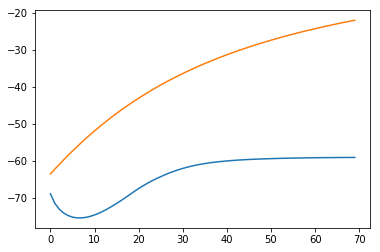

Y5 (3.6543567, 70) (3.342857142857143, 70)


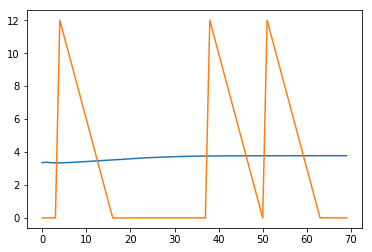

Y6 (-43.648945, 70) (-21.414285714285715, 70)


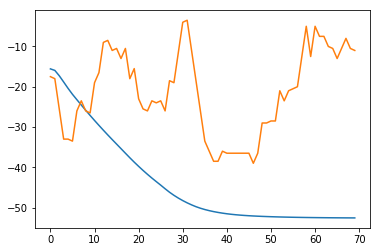

Y7 (60.757786, 70) (36.96823128677169, 70)


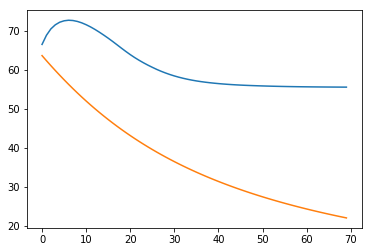

Y8 (126.88796, 70) (127.50117594065325, 70)


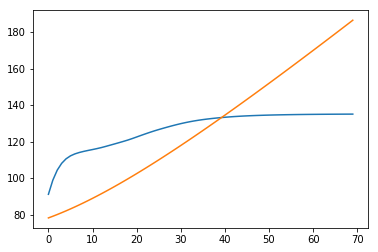

Y9 (-0.7195511, 70) (0.12857142857142856, 70)


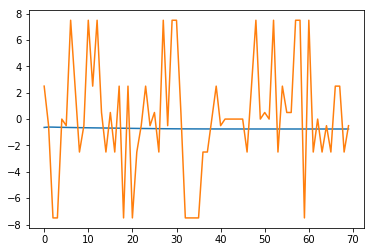

Y10 (0.17652297, 70) (0.14285714285714285, 70)


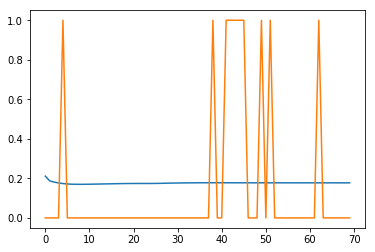

Y11 (-0.065049835, 70) (0.0008928571428571428, 70)


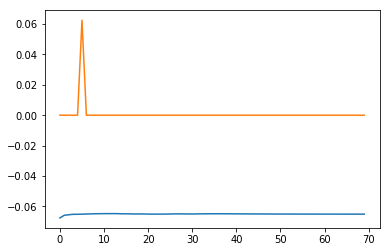

Y12 (0.071584575, 70) (0.1, 70)


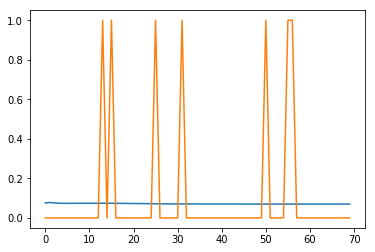

Y13 (0.11909761, 70) (0.12857142857142856, 70)


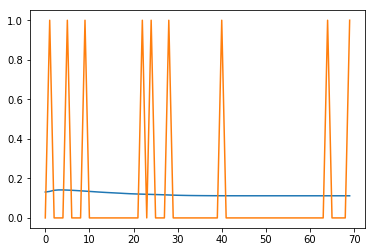

Y14 (0.07996632, 70) (0.15714285714285714, 70)


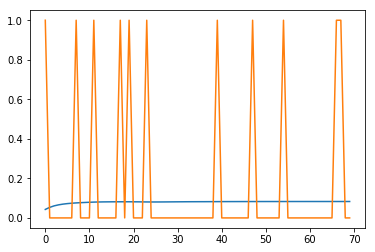

Y15 (0.15531953, 70) (0.18571428571428572, 70)


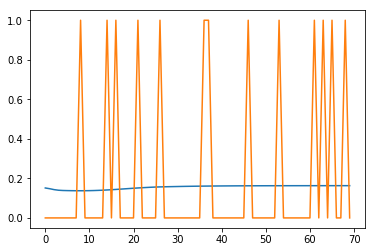

Y16 (0.09438948, 70) (0.15714285714285714, 70)


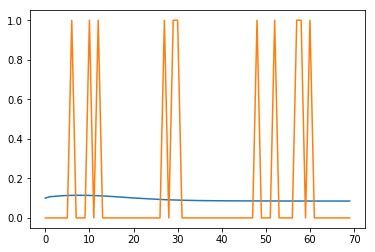

Y17 (0.27804816, 70) (0.12857142857142856, 70)


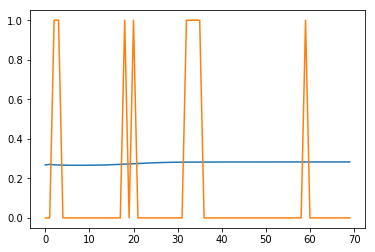

Y18 (0.17655776, 70) (0.14285714285714285, 70)


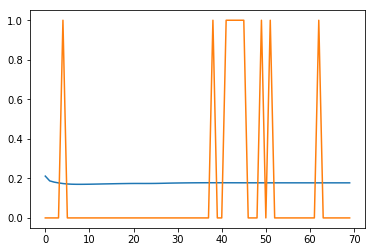

Y19 (-0.06504924, 70) (0.0008928571428571428, 70)


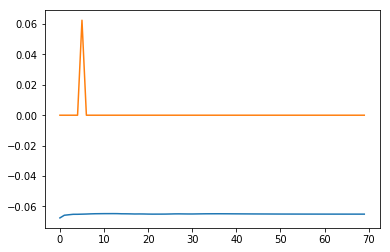

TEST recursive (8.329881695276345, -3.8489196)
Epoch 1/1
6000/6000 [==============================] - 0s 21us/step - loss: 356.0107
self-test 0.6364550929343376
episode: 32   score: 0.25   memory length: 7000   epsilon: 0.009998671593271896
Y0 (82.01785, 70) (113.5, 70)


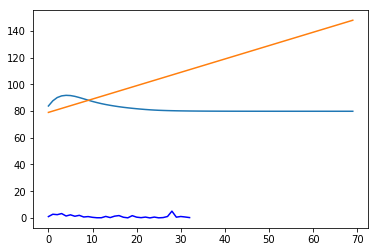

Y1 (137.54695, 70) (-55.17820325321154, 70)


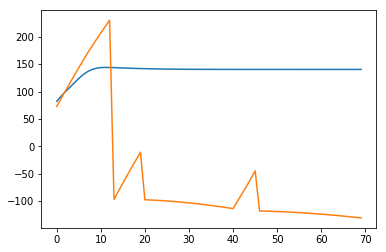

Y2 (-57.20337, 70) (-71.19357807440878, 70)


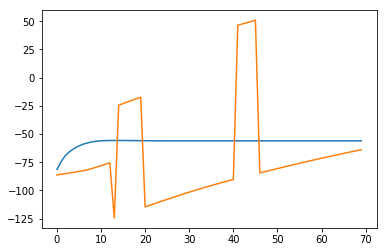

Y3 (-128.25957, 70) (-78.81068998922854, 70)


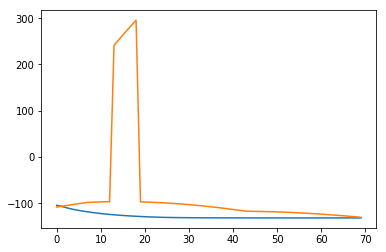

Y4 (-117.19676, 70) (-94.58059459311173, 70)


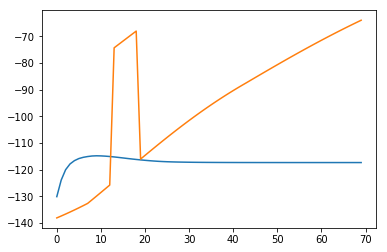

Y5 (-0.5028781, 70) (2.2285714285714286, 70)


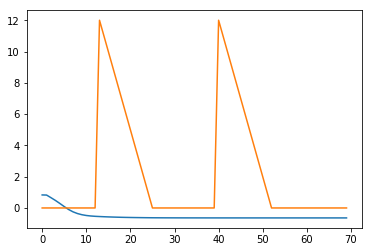

Y6 (60.48818, 70) (121.71428571428571, 70)


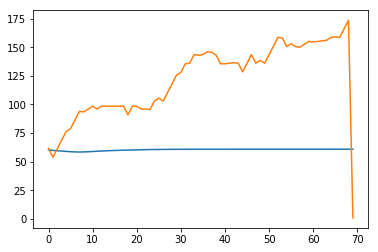

Y7 (115.603134, 70) (98.8451860333589, 70)


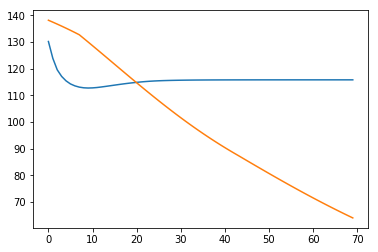

Y8 (132.49539, 70) (110.15385237578896, 70)


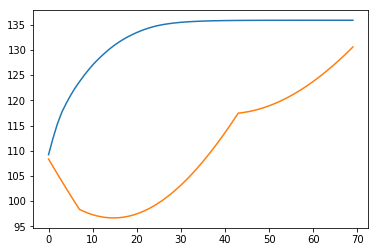

Y9 (-0.5828717, 70) (1.8142857142857143, 70)


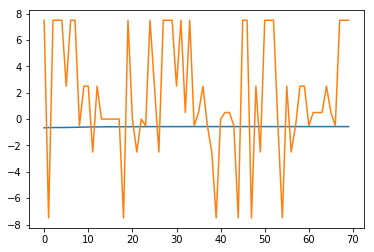

Y10 (0.12989002, 70) (0.11428571428571428, 70)


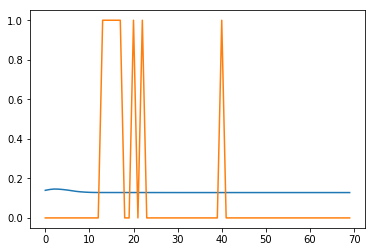

Y11 (-0.000121895675, 70) (0.004464285714285714, 70)


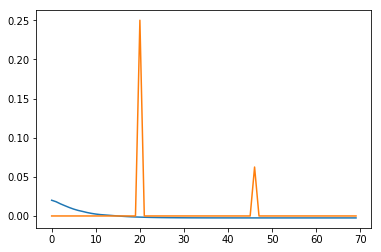

Y12 (0.008333036, 70) (0.11428571428571428, 70)


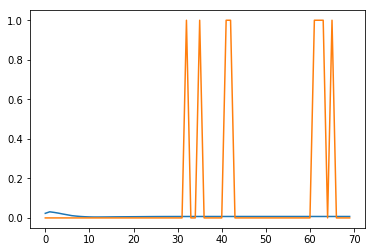

Y13 (0.38689974, 70) (0.12857142857142856, 70)


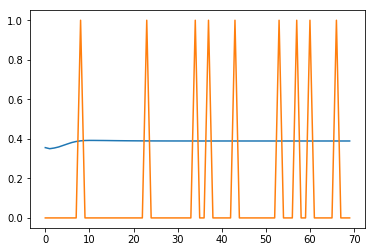

Y14 (0.22512746, 70) (0.17142857142857143, 70)


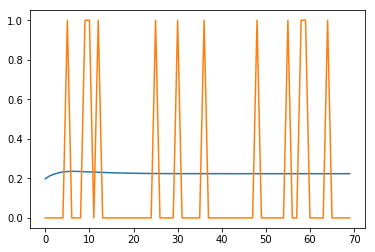

Y15 (0.20056297, 70) (0.08571428571428572, 70)


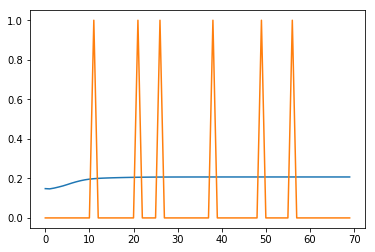

Y16 (0.120980605, 70) (0.3, 70)


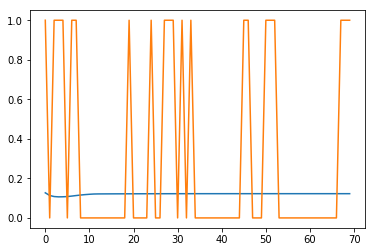

Y17 (-0.07991189, 70) (0.08571428571428572, 70)


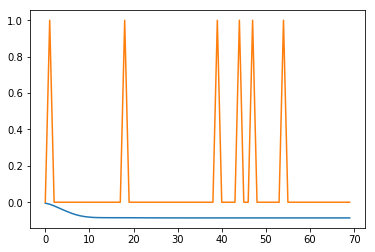

Y18 (0.12989475, 70) (0.11428571428571428, 70)


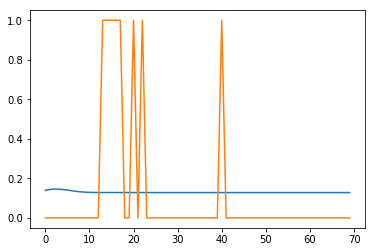

Y19 (-0.00012230285, 70) (0.004464285714285714, 70)


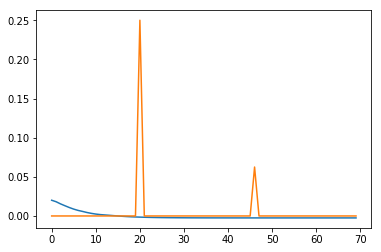

TEST recursive (8.411022321140017, -0.07118379)
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 356.2563
self-test 0.6430598106404182
episode: 33   score: 0.375   memory length: 7000   epsilon: 0.009998671593271896
hit
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 395.8868
self-test 0.646477298632844
episode: 34   score: 1.3125   memory length: 7000   epsilon: 0.009998671593271896
Y0 (233.16786, 70) (99.78571428571429, 70)


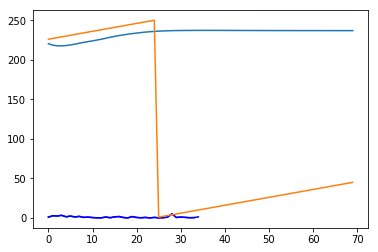

Y1 (-182.66814, 70) (-176.8310830119489, 70)


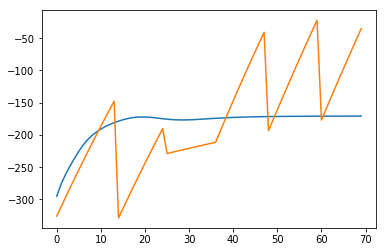

Y2 (28.978601, 70) (-55.80007278917358, 70)


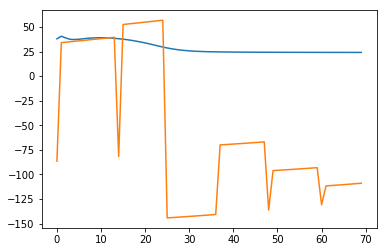

Y3 (-61.221016, 70) (-67.35788317959275, 70)


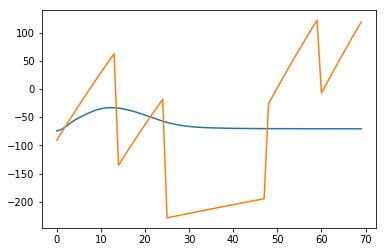

Y4 (17.322361, 70) (-51.285218448879306, 70)


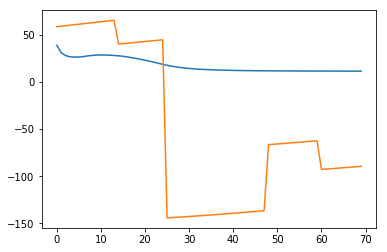

Y5 (6.1829553, 70) (5.514285714285714, 70)


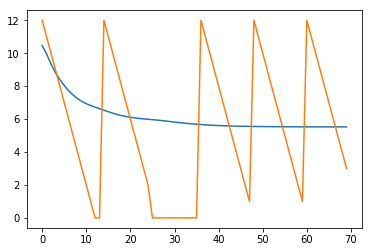

Y6 (80.608986, 70) (70.70714285714286, 70)


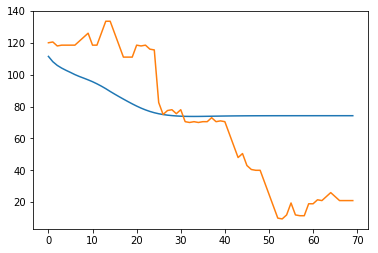

Y7 (48.068607, 70) (116.8576293456477, 70)


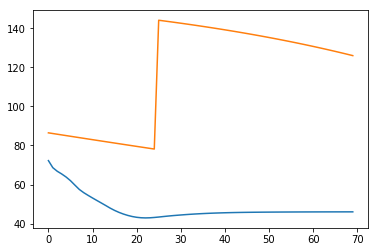

Y8 (282.45215, 70) (243.0687579143549, 70)


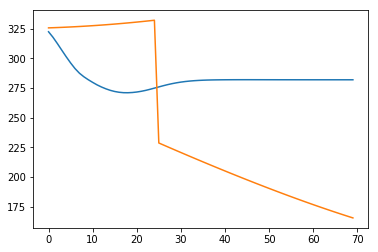

Y9 (-0.9401112, 70) (-0.9071428571428571, 70)


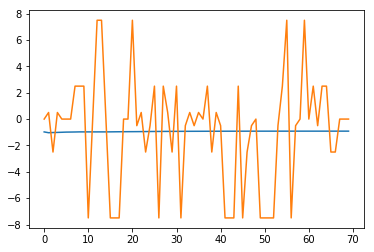

Y10 (0.059895243, 70) (0.21428571428571427, 70)


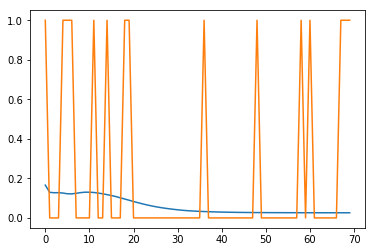

Y11 (0.0033822395, 70) (0.0, 70)


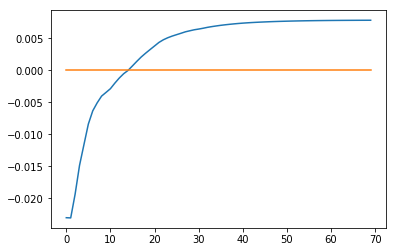

Y12 (0.01248759, 70) (0.1, 70)


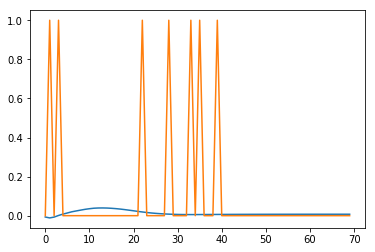

Y13 (0.20887332, 70) (0.12857142857142856, 70)


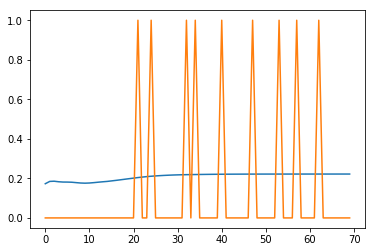

Y14 (0.20435515, 70) (0.17142857142857143, 70)


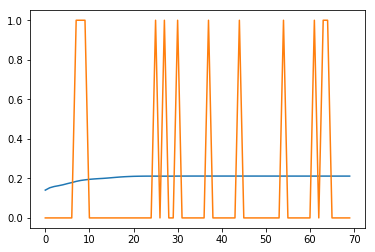

Y15 (0.20151311, 70) (0.1, 70)


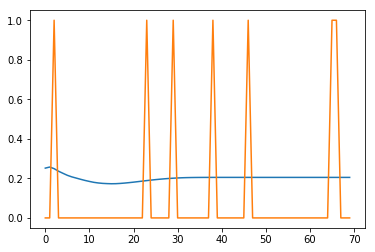

Y16 (0.0412065, 70) (0.07142857142857142, 70)


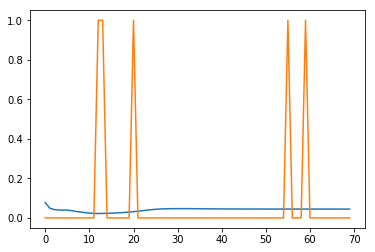

Y17 (0.28953314, 70) (0.21428571428571427, 70)


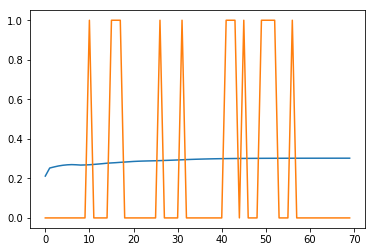

Y18 (0.059844412, 70) (0.21428571428571427, 70)


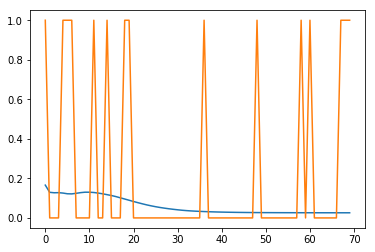

Y19 (0.0033822705, 70) (0.0, 70)


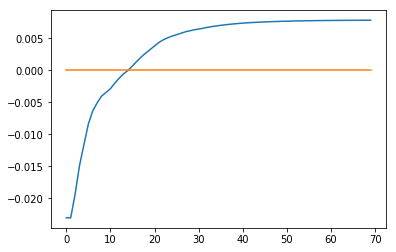

TEST recursive (8.504080986939433, 0.2999466)
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 350.6954
self-test 0.6392670693141916
episode: 35   score: 0   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 342.2159
self-test 0.6367279072227077
episode: 36   score: 0.25   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 22us/step - loss: 338.5678
self-test 0.6356783708900987
episode: 37   score: 0.5625   memory length: 7000   epsilon: 0.009998671593271896
Y0 (74.41635, 70) (115.5, 70)


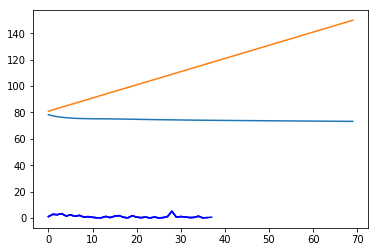

Y1 (38.631367, 70) (-67.29701596093706, 70)


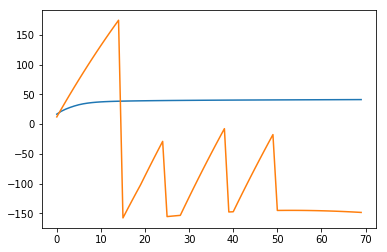

Y2 (-67.764694, 70) (-48.922600372035596, 70)


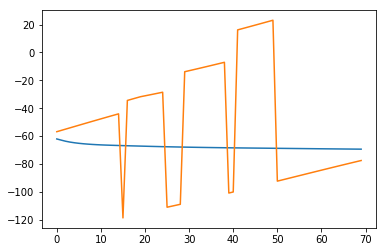

Y3 (164.16414, 70) (-85.26338565663838, 70)


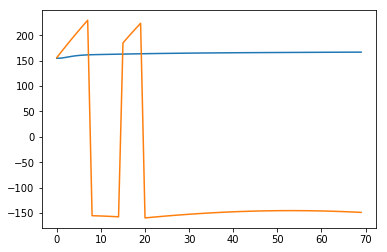

Y4 (-74.10305, 70) (-90.64847563636854, 70)


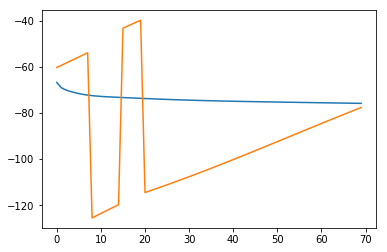

Y5 (1.695651, 70) (3.342857142857143, 70)


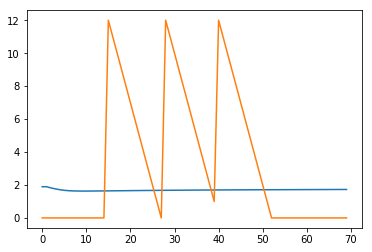

Y6 (71.590195, 70) (97.77857142857142, 70)


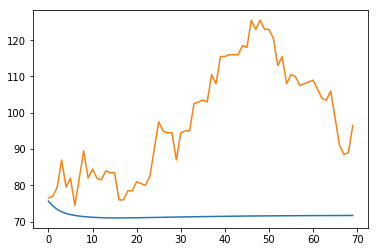

Y7 (132.45078, 70) (104.36888866738377, 70)


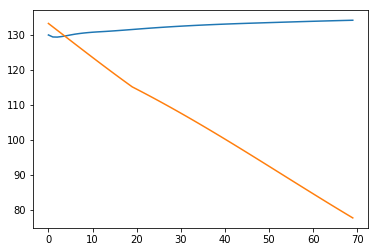

Y8 (143.02124, 70) (150.9854627194399, 70)


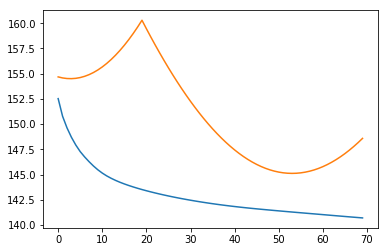

Y9 (-0.0061306036, 70) (0.29285714285714287, 70)


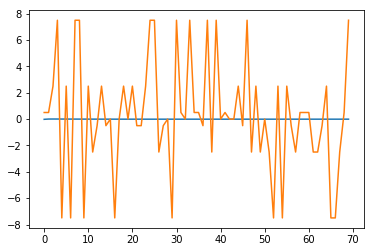

Y10 (0.1755197, 70) (0.12857142857142856, 70)


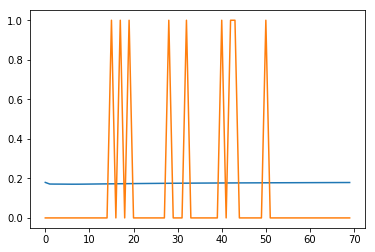

Y11 (-0.014530727, 70) (0.009821428571428571, 70)


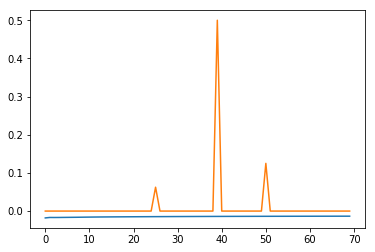

Y12 (-0.019756284, 70) (0.14285714285714285, 70)


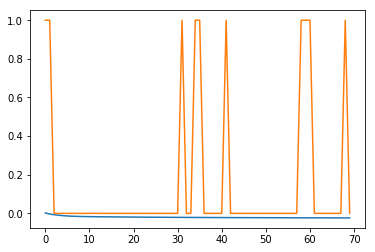

Y13 (0.32391843, 70) (0.12857142857142856, 70)


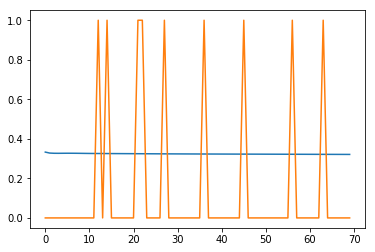

Y14 (0.18270214, 70) (0.17142857142857143, 70)


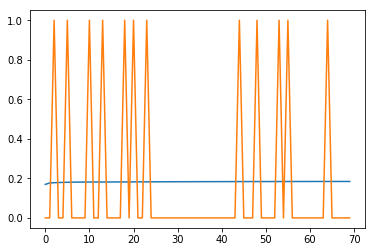

Y15 (0.12074299, 70) (0.14285714285714285, 70)


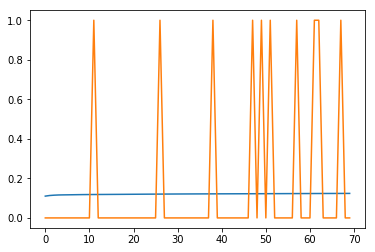

Y16 (0.04927011, 70) (0.15714285714285714, 70)


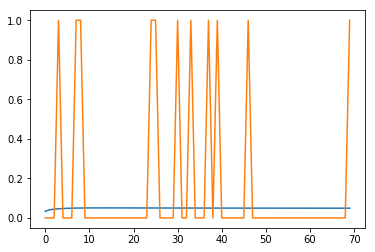

Y17 (0.1662473, 70) (0.12857142857142856, 70)


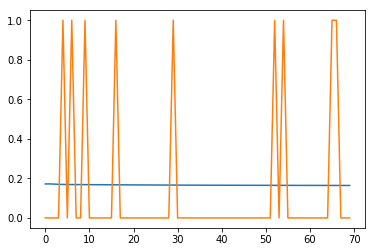

Y18 (0.17554566, 70) (0.12857142857142856, 70)


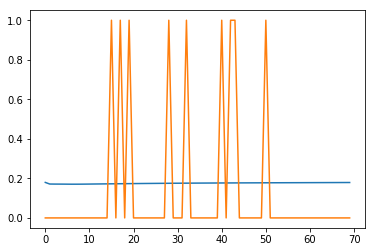

Y19 (-0.014530681, 70) (0.009821428571428571, 70)


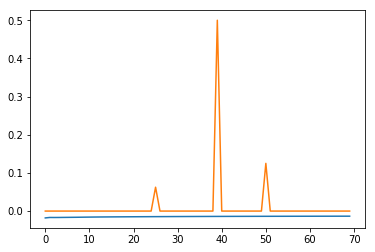

TEST recursive (8.61147851418344, -0.8498194)
Epoch 1/1
6000/6000 [==============================] - 0s 21us/step - loss: 343.8060
self-test 0.6383560159590518
episode: 38   score: 0.875   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 18us/step - loss: 337.3425
self-test 0.6369120669480773
episode: 39   score: 0.8125   memory length: 7000   epsilon: 0.009998671593271896
Y0 (131.84332, 70) (104.5, 70)


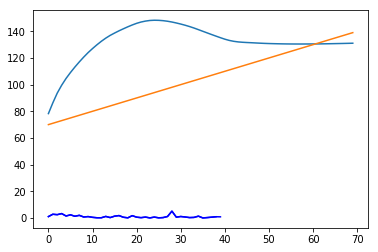

Y1 (-84.76934, 70) (-133.26677933379565, 70)


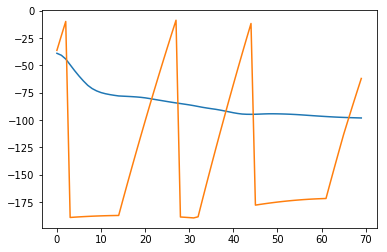

Y2 (-36.08783, 70) (-36.04883051061085, 70)


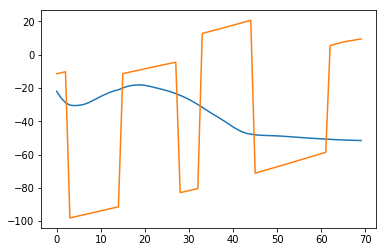

Y3 (-123.99354, 70) (-182.04728256229973, 70)


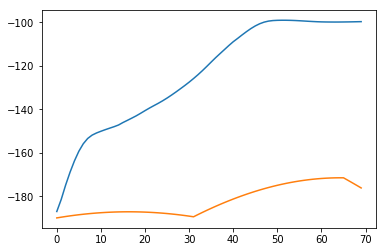

Y4 (-61.916756, 70) (-77.61930643310876, 70)


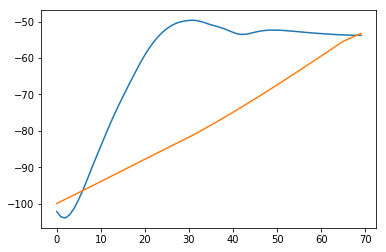

Y5 (3.3042972, 70) (3.2714285714285714, 70)


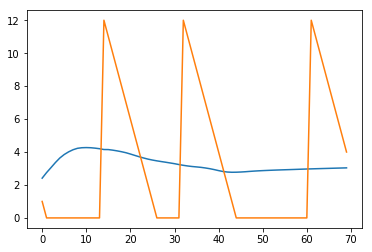

Y6 (40.34316, 70) (78.51428571428572, 70)


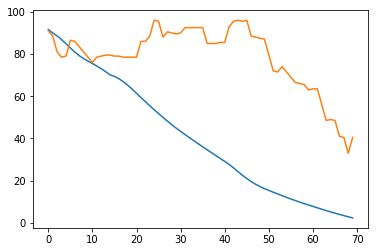

Y7 (62.978977, 70) (77.61930643310876, 70)


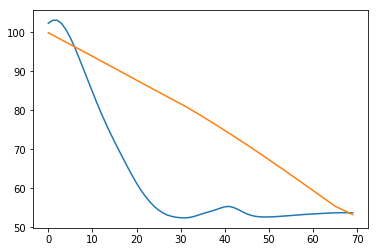

Y8 (125.73683, 70) (182.04728256229973, 70)


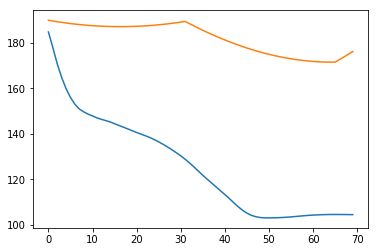

Y9 (-0.11301452, 70) (-0.7571428571428571, 70)


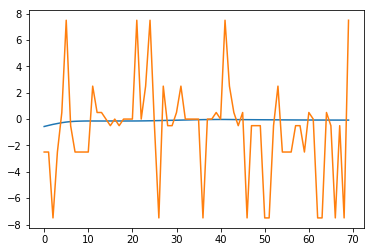

Y10 (0.18273742, 70) (0.2, 70)


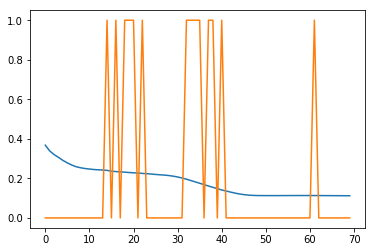

Y11 (0.02904303, 70) (0.0125, 70)


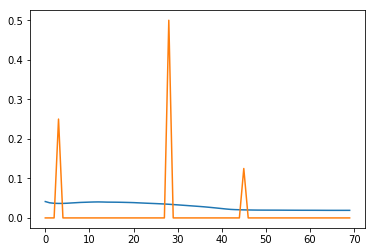

Y12 (0.19785966, 70) (0.12857142857142856, 70)


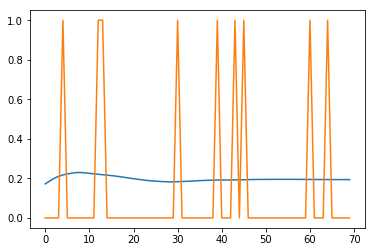

Y13 (-0.0102375895, 70) (0.21428571428571427, 70)


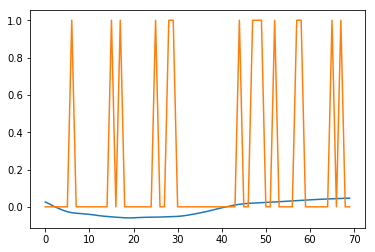

Y14 (0.25037283, 70) (0.08571428571428572, 70)


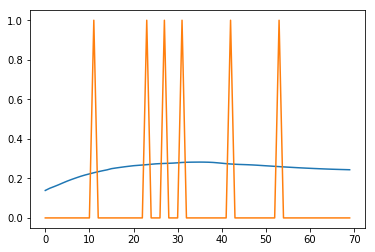

Y15 (0.07970118, 70) (0.15714285714285714, 70)


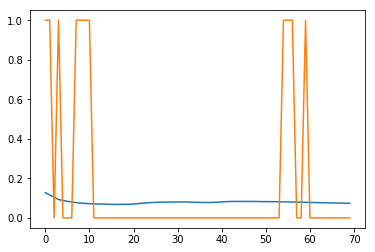

Y16 (0.24050088, 70) (0.07142857142857142, 70)


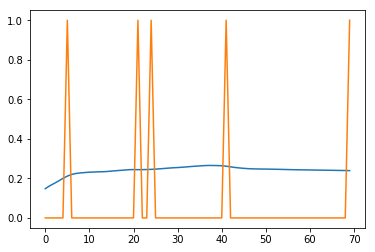

Y17 (0.08040291, 70) (0.14285714285714285, 70)


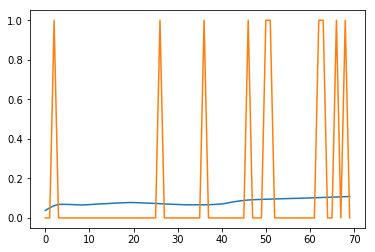

Y18 (0.18274616, 70) (0.2, 70)


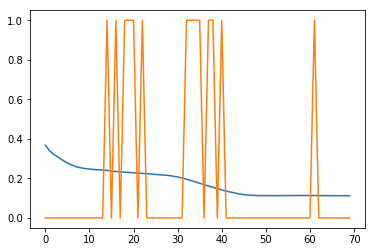

Y19 (0.029043058, 70) (0.0125, 70)


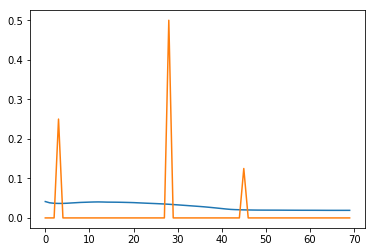

TEST recursive (8.74868096667767, 1.7274803)
Epoch 1/1
6000/6000 [==============================] - 0s 19us/step - loss: 310.6945
self-test 0.6339379224340067
episode: 40   score: 1.3125   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 327.0427
self-test 0.6307279243517917
episode: 41   score: 0.75   memory length: 7000   epsilon: 0.009998671593271896
hit
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 319.6784
self-test 0.6338726647305751
episode: 42   score: 1.5625   memory length: 7000   epsilon: 0.009998671593271896
hit
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 331.4851
self-test 0.6412981058121259
episode: 43   score: 1.75   memory length: 7000   epsilon: 0.009998671593271896
Y0 (73.045074, 70) (96.5, 70)


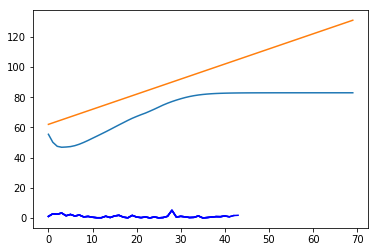

Y1 (107.36033, 70) (-142.8824175775015, 70)


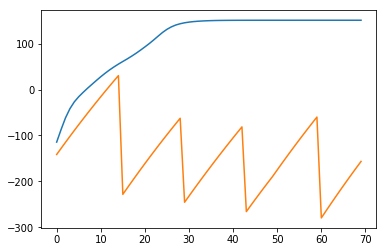

Y2 (-49.39936, 70) (-41.78805004840044, 70)


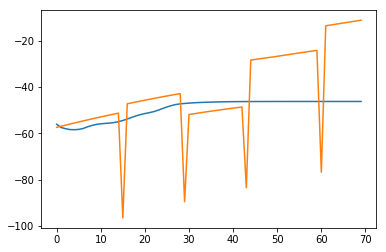

Y3 (-156.05211, 70) (-27.673796598538324, 70)


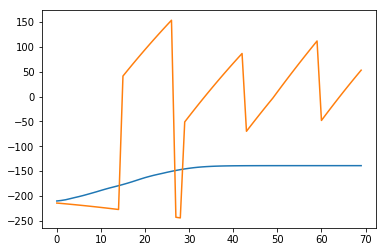

Y4 (-106.242455, 70) (-55.23422152076025, 70)


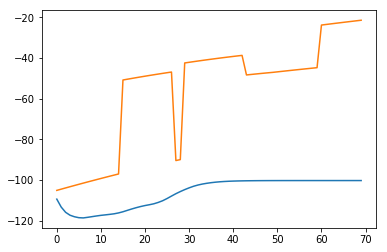

Y5 (0.794555, 70) (4.814285714285714, 70)


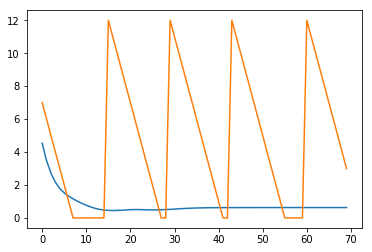

Y6 (74.27952, 70) (51.114285714285714, 70)


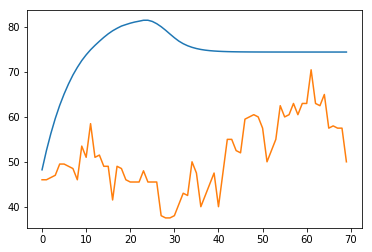

Y7 (106.32426, 70) (87.80163723643058, 70)


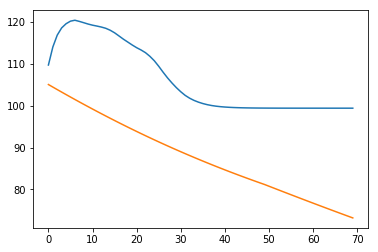

Y8 (154.72145, 70) (252.5298454958681, 70)


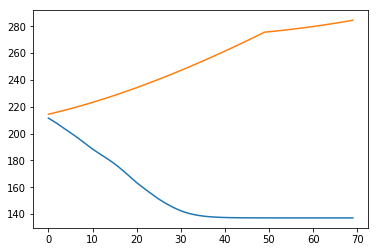

Y9 (0.0874506, 70) (0.05714285714285714, 70)


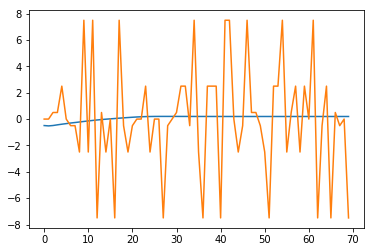

Y10 (0.05460555, 70) (0.17142857142857143, 70)


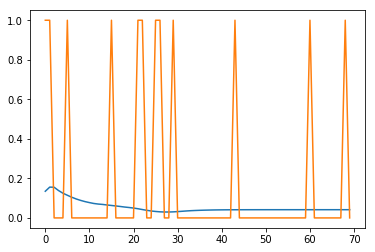

Y11 (-0.05338157, 70) (0.0, 70)


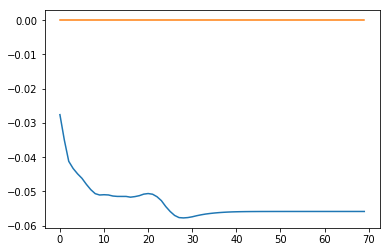

Y12 (0.037307445, 70) (0.11428571428571428, 70)


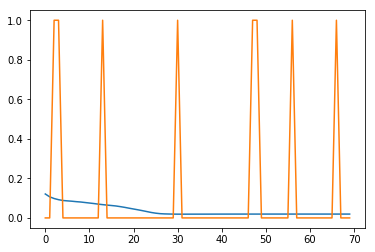

Y13 (0.50469786, 70) (0.14285714285714285, 70)


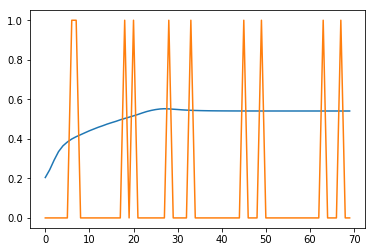

Y14 (0.16765451, 70) (0.17142857142857143, 70)


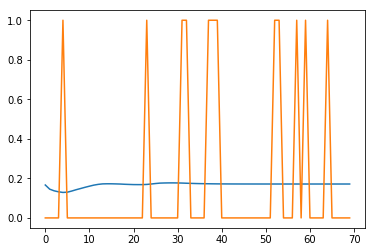

Y15 (-0.03419755, 70) (0.14285714285714285, 70)


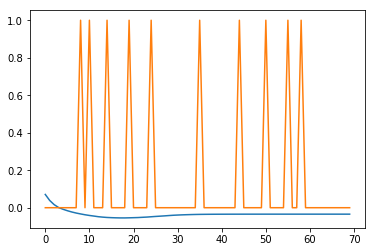

Y16 (0.11808295, 70) (0.12857142857142856, 70)


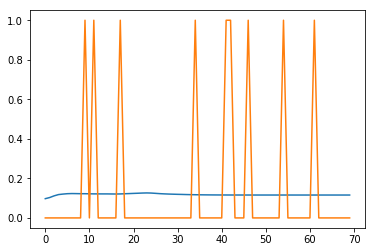

Y17 (0.12092769, 70) (0.12857142857142856, 70)


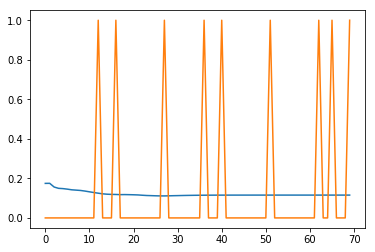

Y18 (0.054612365, 70) (0.17142857142857143, 70)


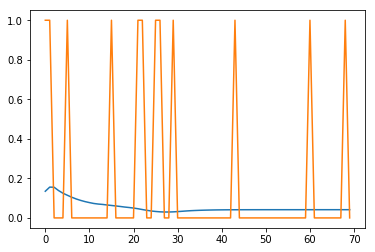

Y19 (-0.053381592, 70) (0.0, 70)


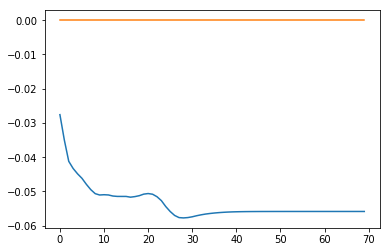

TEST recursive (8.652564120441264, -3.228049)
hit
Epoch 1/1
6000/6000 [==============================] - 0s 21us/step - loss: 330.3249
self-test 0.63779936620898
episode: 44   score: 1.25   memory length: 7000   epsilon: 0.009998671593271896
hit
Epoch 1/1
6000/6000 [==============================] - 0s 22us/step - loss: 320.7450
self-test 0.6315377153396634
episode: 45   score: 1.25   memory length: 7000   epsilon: 0.009998671593271896
Y0 (91.955, 70) (125.5, 70)


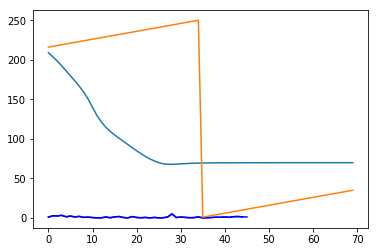

Y1 (43.54132, 70) (-110.22010127437575, 70)


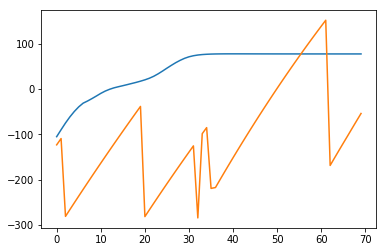

Y2 (-80.01891, 70) (-87.38676909056798, 70)


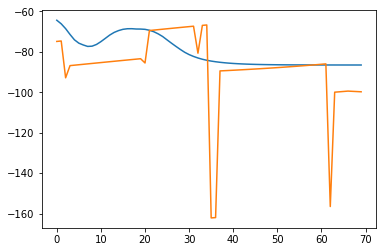

Y3 (185.89198, 70) (-59.07818573982751, 70)


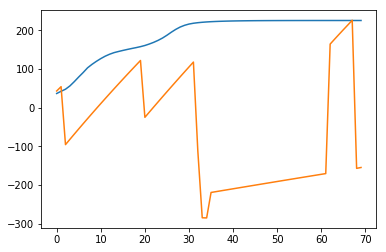

Y4 (-80.47555, 70) (-110.28440865193147, 70)


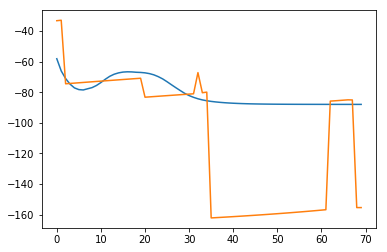

Y5 (1.4399514, 70) (4.8, 70)


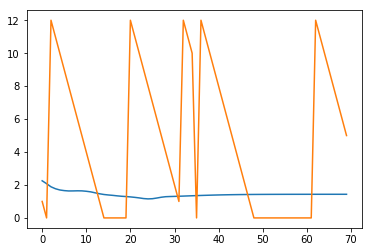

Y6 (55.961353, 70) (30.892857142857142, 70)


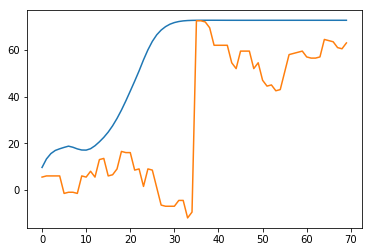

Y7 (136.7129, 70) (122.77509896219384, 70)


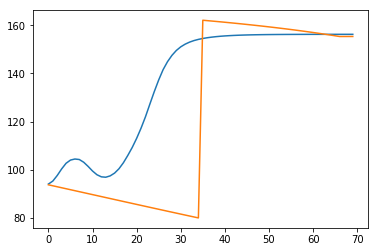

Y8 (139.42581, 70) (234.38987243453406, 70)


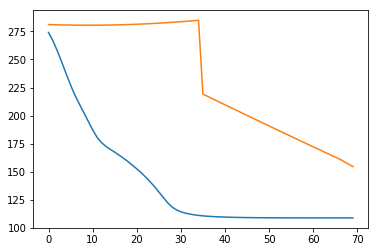

Y9 (-0.061034538, 70) (-0.42142857142857143, 70)


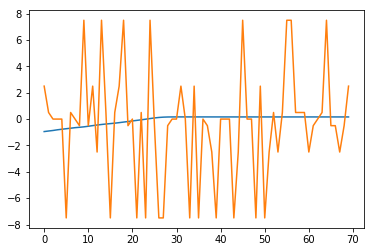

Y10 (0.1585029, 70) (0.21428571428571427, 70)


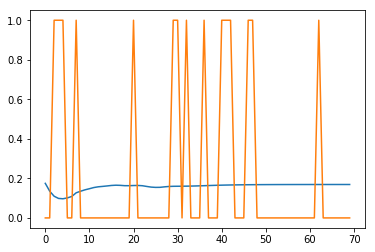

Y11 (0.0026758052, 70) (0.0, 70)


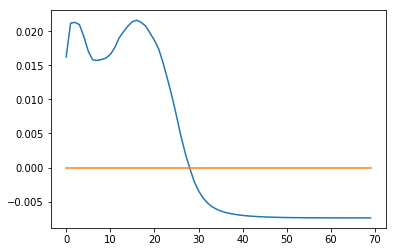

Y12 (0.10645028, 70) (0.15714285714285714, 70)


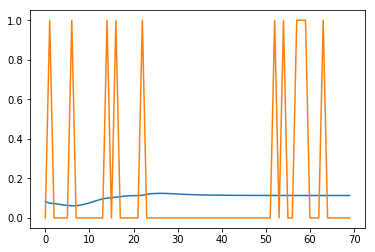

Y13 (0.0287656, 70) (0.14285714285714285, 70)


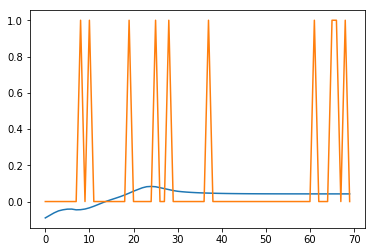

Y14 (0.1642571, 70) (0.1, 70)


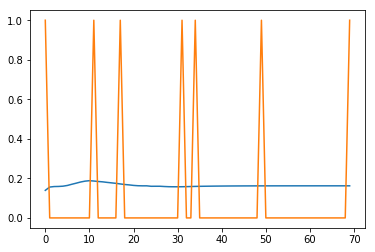

Y15 (0.12839921, 70) (0.1, 70)


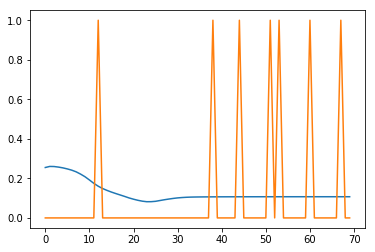

Y16 (0.30905882, 70) (0.11428571428571428, 70)


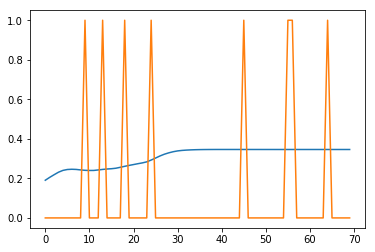

Y17 (0.08521924, 70) (0.17142857142857143, 70)


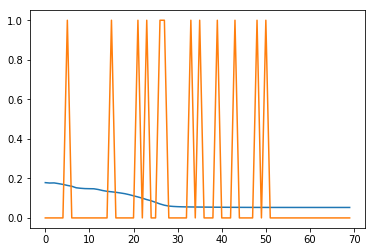

Y18 (0.1585043, 70) (0.21428571428571427, 70)


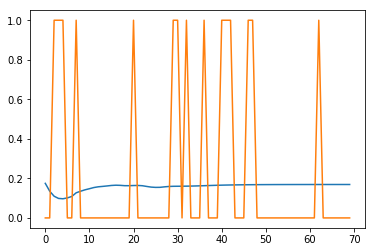

Y19 (0.0026758092, 70) (0.0, 70)


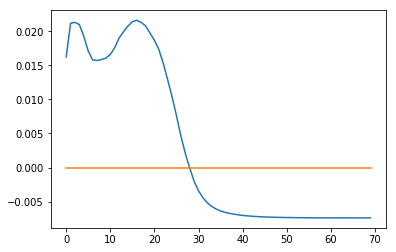

TEST recursive (8.718610988650058, -0.09302537)
hit
Epoch 1/1
6000/6000 [==============================] - 0s 21us/step - loss: 319.5699
self-test 0.6360388873218549
episode: 46   score: 1.5   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 323.2405
self-test 0.6366243508615658
episode: 47   score: 1.1875   memory length: 7000   epsilon: 0.009998671593271896
hit
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 333.7302
self-test 0.6382363610230353
episode: 48   score: 1.25   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 337.3024
self-test 0.6373987269292298
episode: 49   score: 1.3125   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 21us/step - loss: 321.4715
self-test 0.6338418213956459
episode: 50   score: 0.875   memory length: 7000   

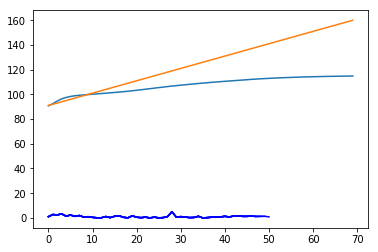

Y1 (-67.86794, 70) (-151.79366418697614, 70)


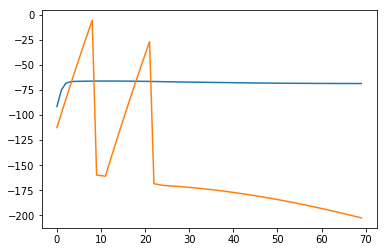

Y2 (-11.976967, 70) (-47.29665924003517, 70)


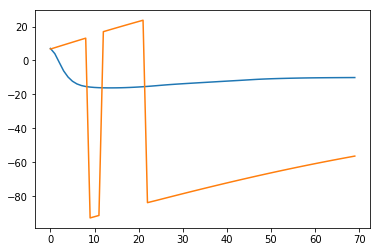

Y3 (-155.81244, 70) (-175.87008773357582, 70)


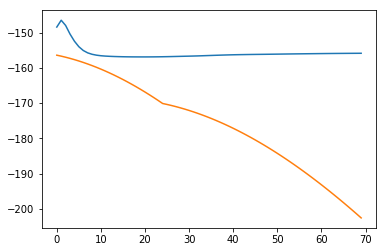

Y4 (-79.82016, 70) (-76.39395621916941, 70)


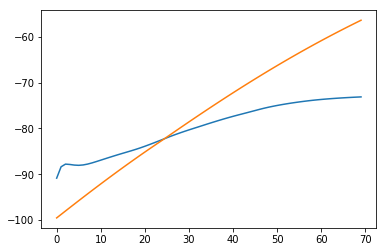

Y5 (4.249176, 70) (2.085714285714286, 70)


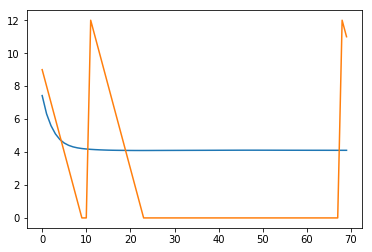

Y6 (93.651596, 70) (92.17857142857143, 70)


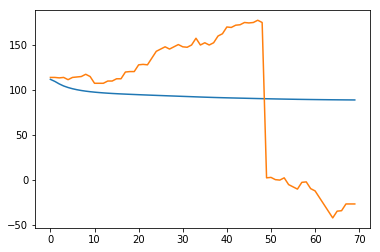

Y7 (83.07463, 70) (76.39395621916941, 70)


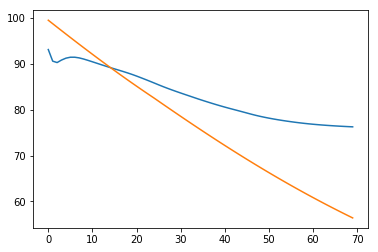

Y8 (159.8329, 70) (175.87008773357582, 70)


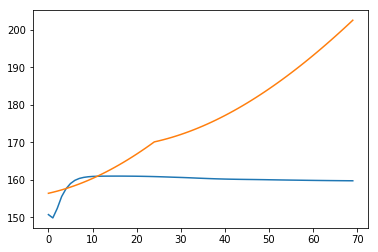

Y9 (0.41405457, 70) (0.5642857142857143, 70)


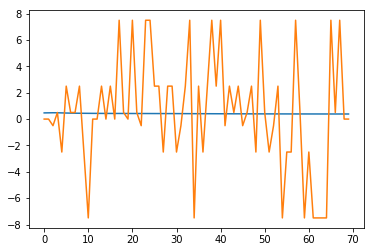

Y10 (0.11487714, 70) (0.12857142857142856, 70)


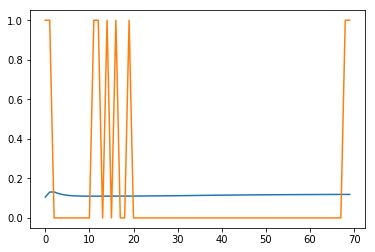

Y11 (-0.0068228715, 70) (0.0035714285714285713, 70)


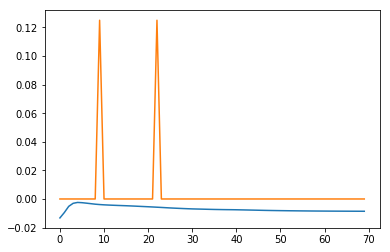

Y12 (0.19537474, 70) (0.14285714285714285, 70)


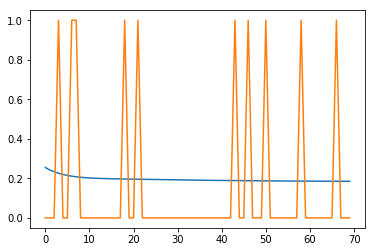

Y13 (0.061555255, 70) (0.08571428571428572, 70)


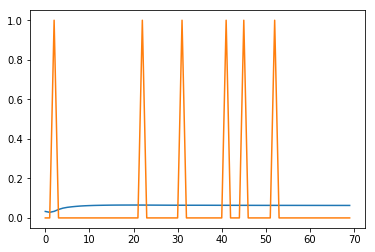

Y14 (0.105710655, 70) (0.22857142857142856, 70)


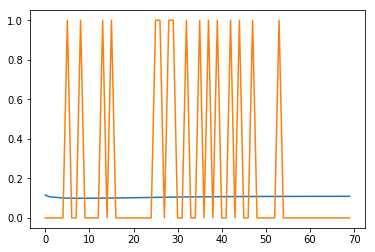

Y15 (0.11539706, 70) (0.14285714285714285, 70)


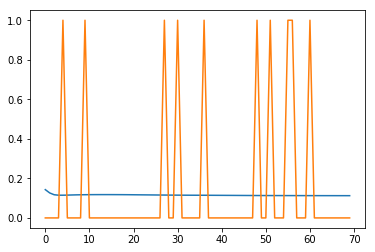

Y16 (0.15155748, 70) (0.15714285714285714, 70)


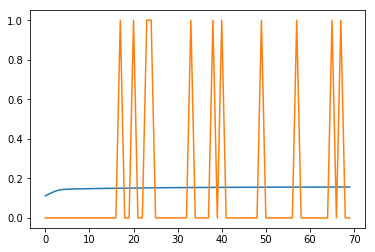

Y17 (0.2557422, 70) (0.11428571428571428, 70)


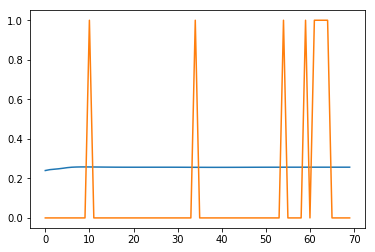

Y18 (0.11487668, 70) (0.12857142857142856, 70)


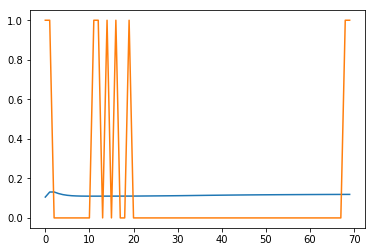

Y19 (-0.006822876, 70) (0.0035714285714285713, 70)


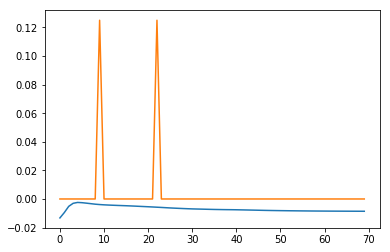

TEST recursive (8.832279798665363, -0.4205022)
Epoch 1/1
6000/6000 [==============================] - 0s 19us/step - loss: 318.4132
self-test 0.6351955475921047
episode: 51   score: 1.125   memory length: 7000   epsilon: 0.009998671593271896
hit
Epoch 1/1
6000/6000 [==============================] - 0s 21us/step - loss: 336.1043
self-test 0.6443999691879353
episode: 52   score: 1.5   memory length: 7000   epsilon: 0.009998671593271896
Y0 (137.22903, 70) (192.35714285714286, 70)


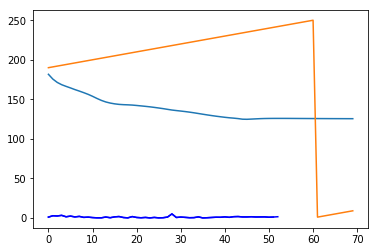

Y1 (-84.483475, 70) (-113.30596044535105, 70)


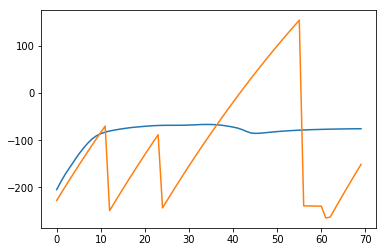

Y2 (-41.339546, 70) (-53.46386165513624, 70)


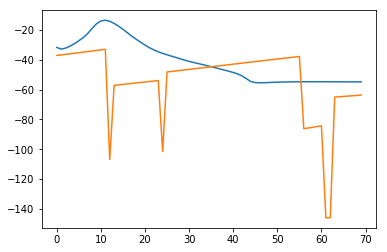

Y3 (-141.99649, 70) (-119.76419869708292, 70)


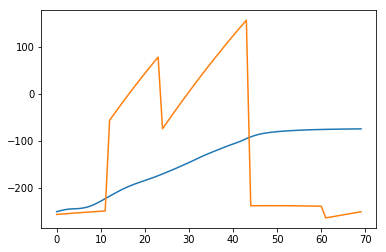

Y4 (-65.11869, 70) (-78.50940670062914, 70)


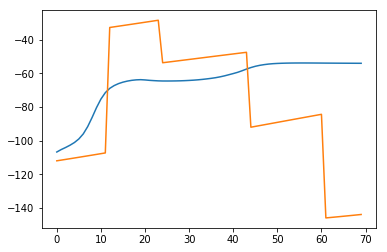

Y5 (3.6189609, 70) (3.9857142857142858, 70)


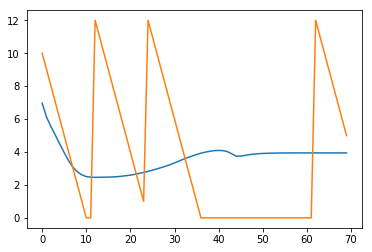

Y6 (25.090778, 70) (57.74285714285714, 70)


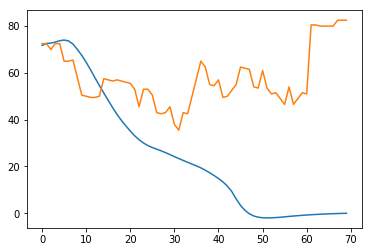

Y7 (64.47727, 70) (104.44926587385784, 70)


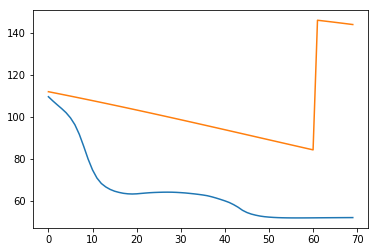

Y8 (142.34248, 70) (245.60279234751215, 70)


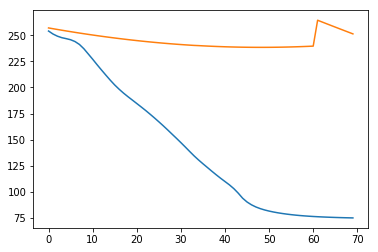

Y9 (-0.042758547, 70) (-0.2714285714285714, 70)


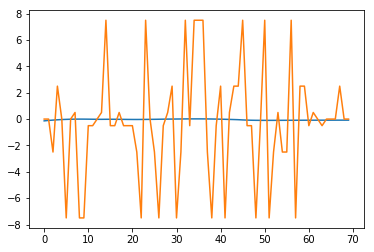

Y10 (0.22930077, 70) (0.17142857142857143, 70)


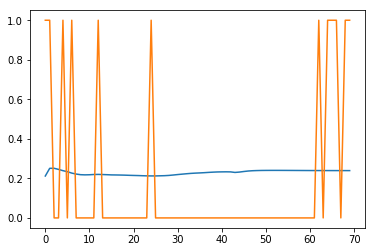

Y11 (-0.009967254, 70) (0.0, 70)


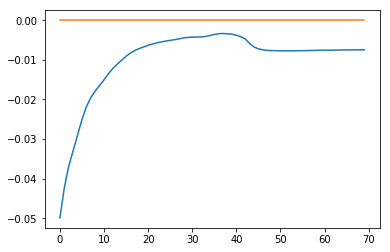

Y12 (0.14851339, 70) (0.1, 70)


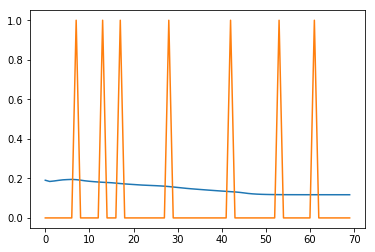

Y13 (0.18156156, 70) (0.21428571428571427, 70)


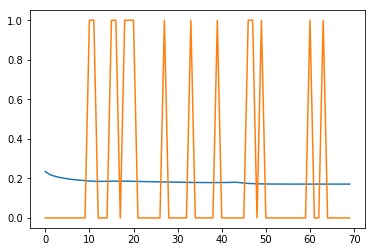

Y14 (0.16659638, 70) (0.11428571428571428, 70)


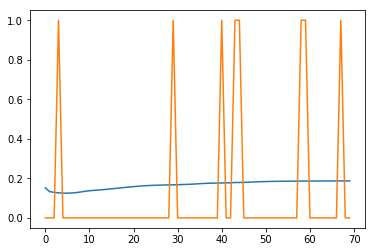

Y15 (0.08480958, 70) (0.11428571428571428, 70)


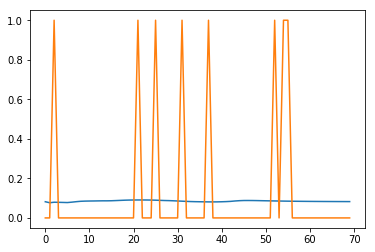

Y16 (0.077042274, 70) (0.12857142857142856, 70)


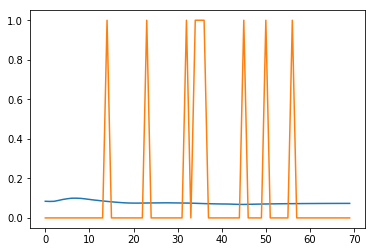

Y17 (0.113939516, 70) (0.15714285714285714, 70)


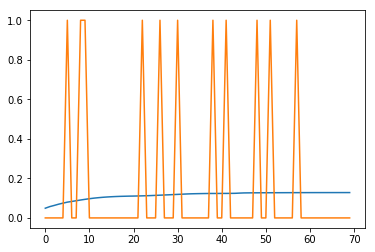

Y18 (0.22930188, 70) (0.17142857142857143, 70)


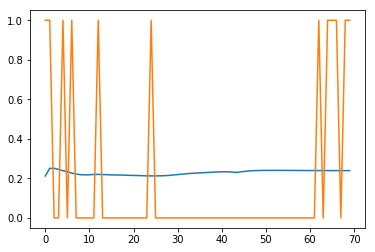

Y19 (-0.009967251, 70) (0.0, 70)


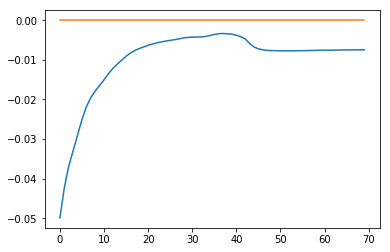

TEST recursive (8.860290359149843, -0.52329034)
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 348.3030
self-test 0.6404147862201979
episode: 53   score: 0.375   memory length: 7000   epsilon: 0.009998671593271896
hit
Y0 (77.55565, 70) (123.5, 70)


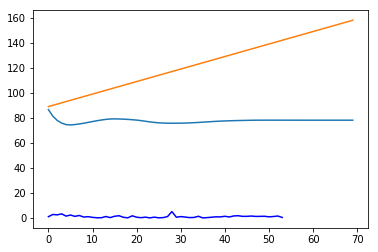

Y1 (28.21223, 70) (37.77123853514661, 70)


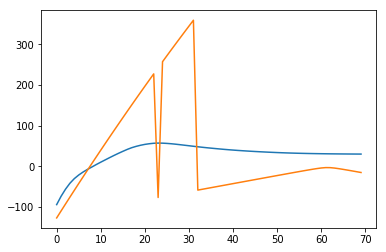

Y2 (-74.14719, 70) (-148.3542132789541, 70)


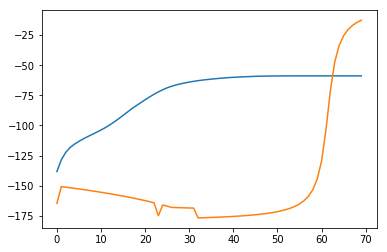

Y3 (145.8919, 70) (34.13876856273245, 70)


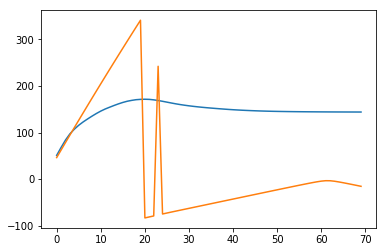

Y4 (-79.527695, 70) (-152.44748993779592, 70)


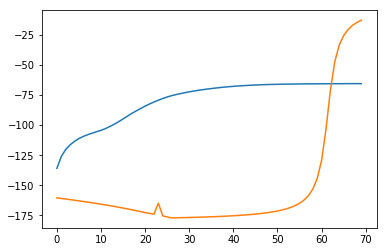

Y5 (2.3916385, 70) (3.342857142857143, 70)


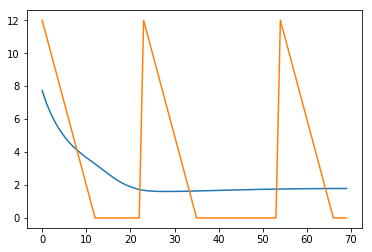

Y6 (64.335915, 70) (68.64285714285714, 70)


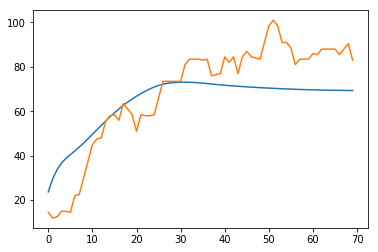

Y7 (134.00594, 70) (153.18845805340263, 70)


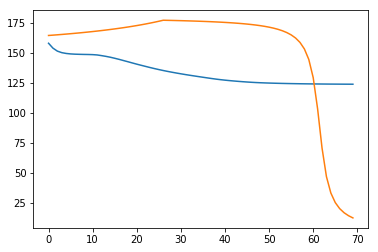

Y8 (133.1111, 70) (56.73826861190897, 70)


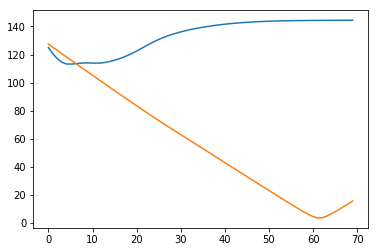

Y9 (0.6965126, 70) (0.9785714285714285, 70)


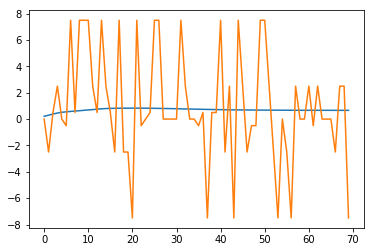

Y10 (0.048833508, 70) (0.21428571428571427, 70)


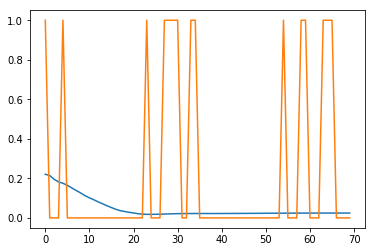

Y11 (0.01462363, 70) (0.008035714285714285, 70)


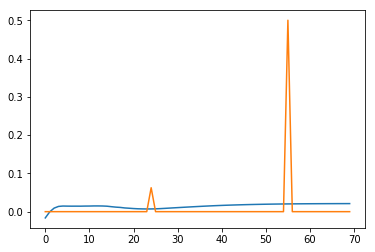

Y12 (0.03532337, 70) (0.11428571428571428, 70)


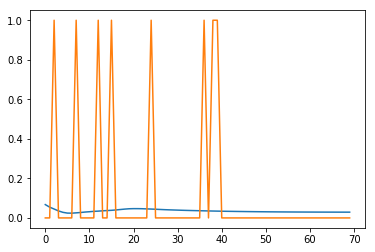

Y13 (0.22699189, 70) (0.08571428571428572, 70)


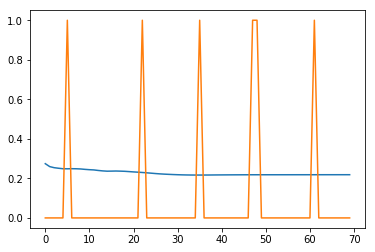

Y14 (0.21293789, 70) (0.17142857142857143, 70)


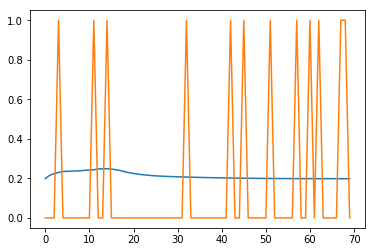

Y15 (0.14837204, 70) (0.12857142857142856, 70)


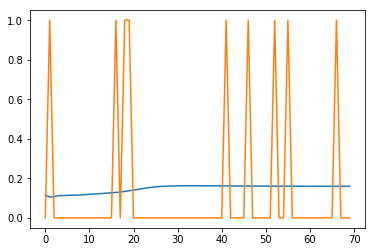

Y16 (0.23911223, 70) (0.2, 70)


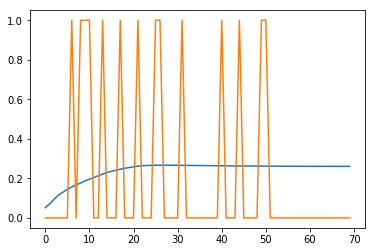

Y17 (0.048927087, 70) (0.08571428571428572, 70)


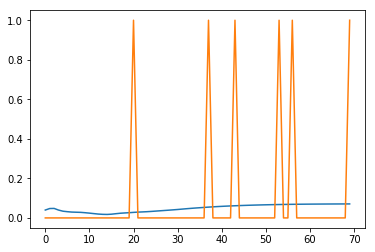

Y18 (0.048833743, 70) (0.21428571428571427, 70)


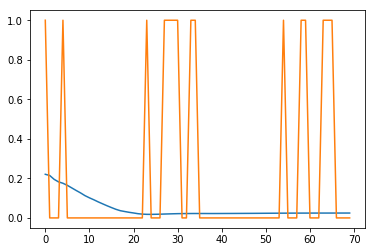

Y19 (0.014623587, 70) (0.008035714285714285, 70)


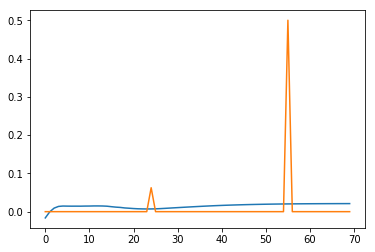

TEST recursive (8.738273177327944, 0.8711209)
Y0 (88.755554, 70) (150.5, 70)


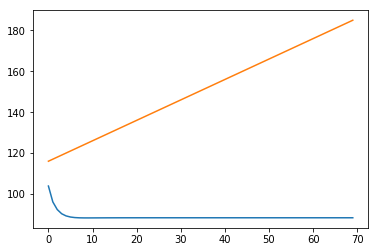

Y1 (254.14436, 70) (-7.105512525140662, 70)


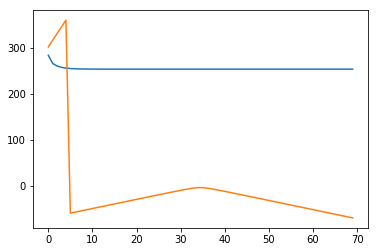

Y2 (-104.37454, 70) (-89.15126852251542, 70)


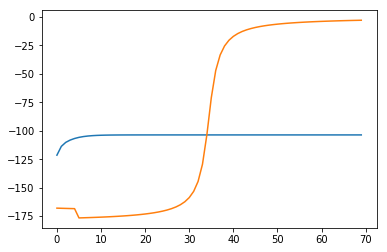

Y3 (-56.597538, 70) (-35.350129066954935, 70)


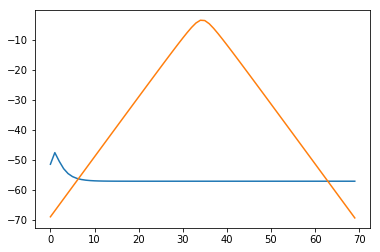

Y4 (-151.719, 70) (-89.77009708011616, 70)


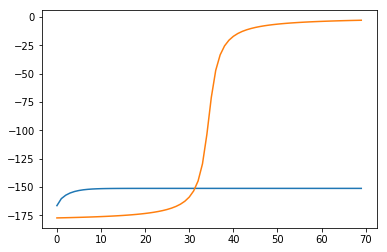

Y5 (1.5869945, 70) (3.7142857142857144, 70)


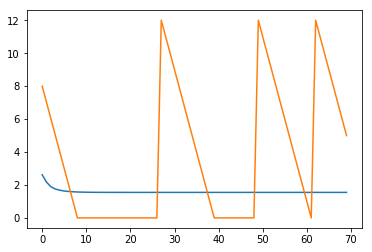

Y6 (50.852573, 70) (83.94285714285714, 70)


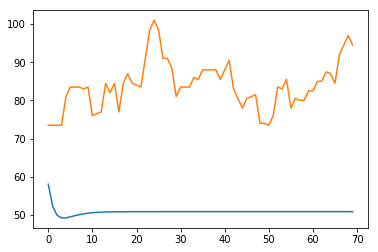

Y7 (148.0833, 70) (89.77009708011616, 70)


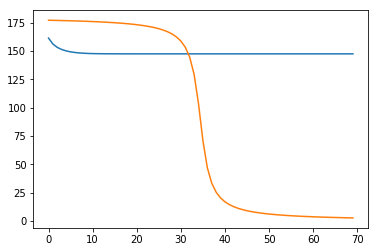

Y8 (55.657, 70) (35.350129066954935, 70)


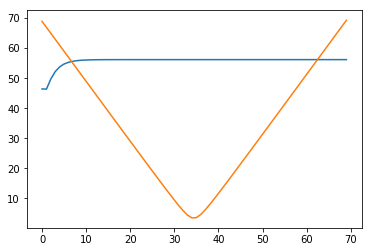

Y9 (-0.10383938, 70) (0.3, 70)


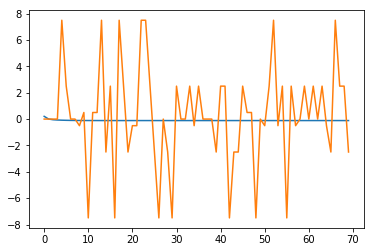

Y10 (-0.059846237, 70) (0.22857142857142856, 70)


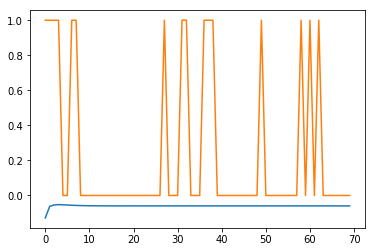

Y11 (-0.021232704, 70) (0.0125, 70)


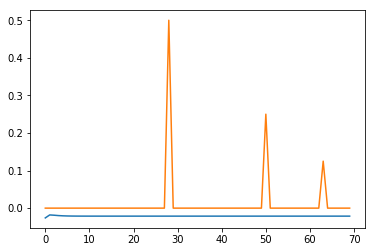

Y12 (0.055353906, 70) (0.07142857142857142, 70)


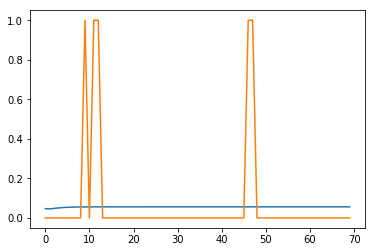

Y13 (-0.0061466005, 70) (0.11428571428571428, 70)


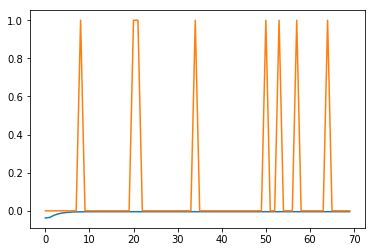

Y14 (0.28158477, 70) (0.2571428571428571, 70)


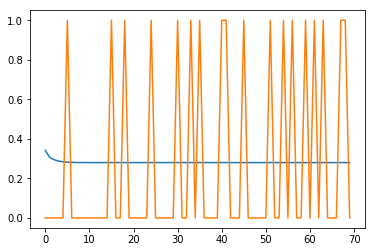

Y15 (0.27613017, 70) (0.12857142857142856, 70)


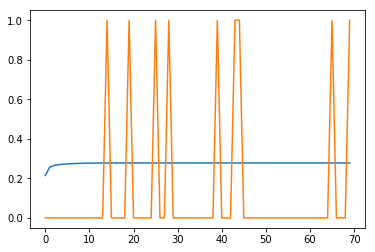

Y16 (0.15912664, 70) (0.1, 70)


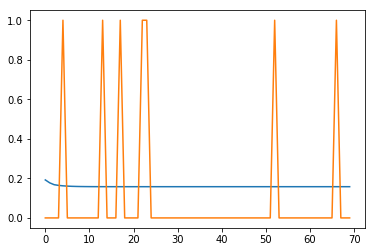

Y17 (0.31973484, 70) (0.1, 70)


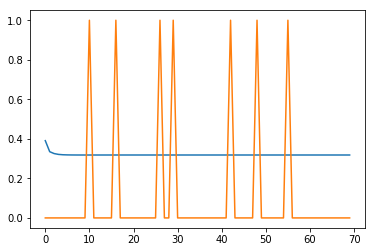

Y18 (-0.05984326, 70) (0.22857142857142856, 70)


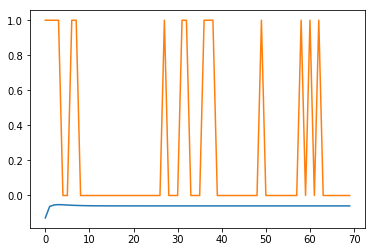

Y19 (-0.021232769, 70) (0.0125, 70)


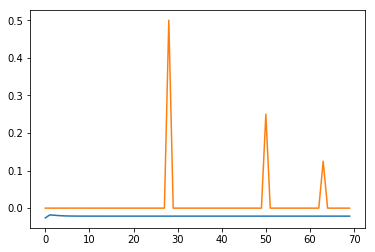

TEST recursive (8.731477770868885, -1.2583269)
Epoch 1/1
6000/6000 [==============================] - 0s 21us/step - loss: 310.3352
self-test 0.6329957765406362
episode: 54   score: 2.5   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 21us/step - loss: 310.1749
self-test 0.637808600710377
episode: 55   score: 0.3125   memory length: 7000   epsilon: 0.009998671593271896
Y0 (71.66118, 70) (99.5, 70)


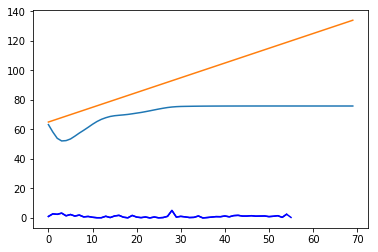

Y1 (26.73487, 70) (-81.47596171603338, 70)


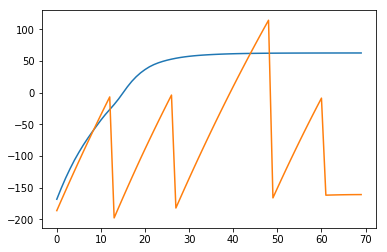

Y2 (-60.911762, 70) (-54.95822954235347, 70)


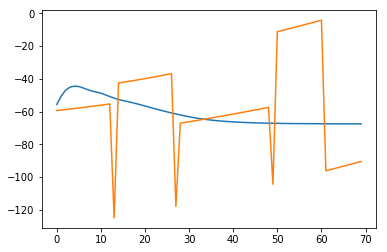

Y3 (146.9581, 70) (52.50395002594086, 70)


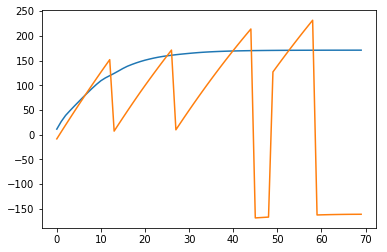

Y4 (-69.66164, 70) (-62.32916116577417, 70)


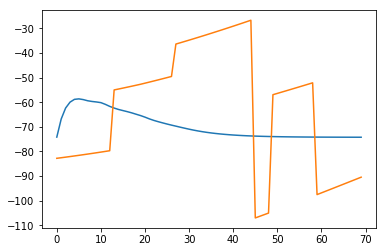

Y5 (1.5389037, 70) (4.128571428571429, 70)


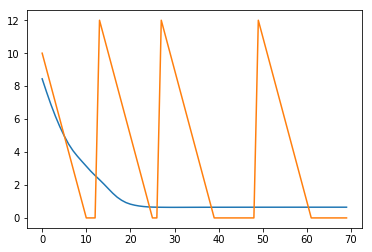

Y6 (79.59439, 70) (70.19285714285714, 70)


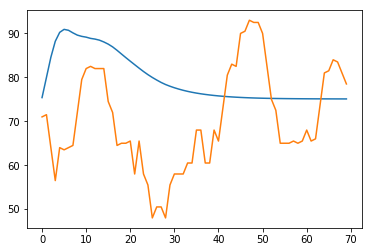

Y7 (135.32819, 70) (112.45511376857164, 70)


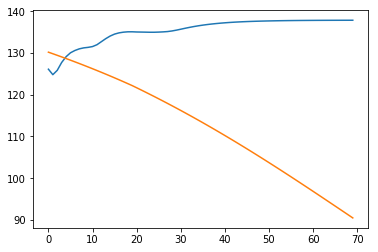

Y8 (151.47371, 70) (180.0290577282623, 70)


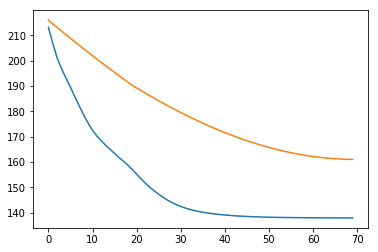

Y9 (0.062484883, 70) (0.21428571428571427, 70)


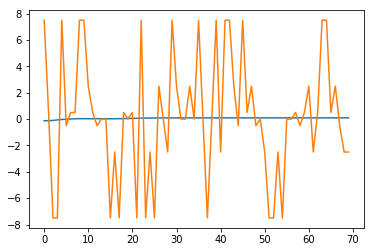

Y10 (-0.012947346, 70) (0.17142857142857143, 70)


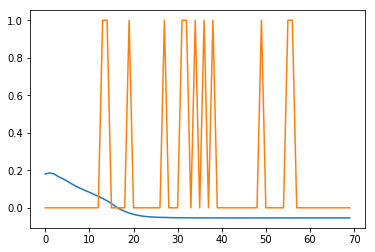

Y11 (0.04315747, 70) (0.007142857142857143, 70)


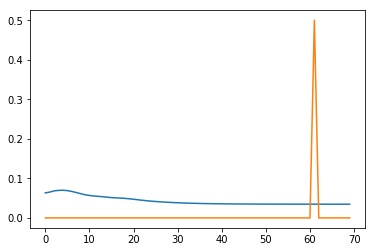

Y12 (0.089301854, 70) (0.15714285714285714, 70)


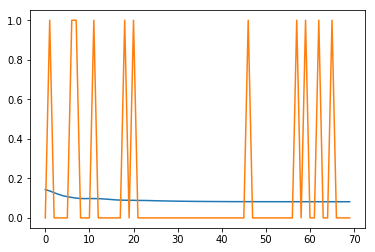

Y13 (0.17084503, 70) (0.08571428571428572, 70)


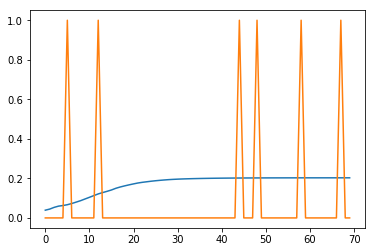

Y14 (0.3408695, 70) (0.11428571428571428, 70)


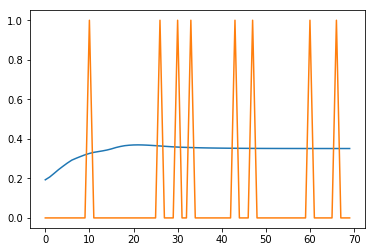

Y15 (0.13445766, 70) (0.12857142857142856, 70)


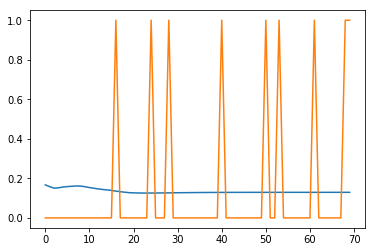

Y16 (0.045559037, 70) (0.18571428571428572, 70)


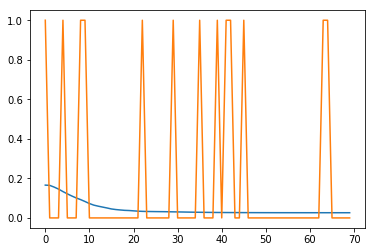

Y17 (0.21497649, 70) (0.15714285714285714, 70)


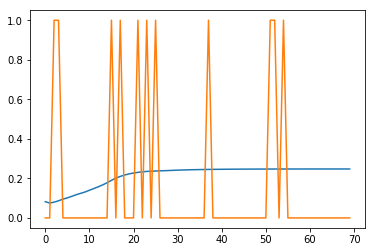

Y18 (-0.012946355, 70) (0.17142857142857143, 70)


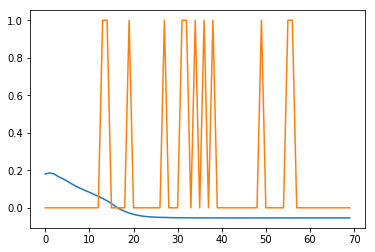

Y19 (0.043157443, 70) (0.007142857142857143, 70)


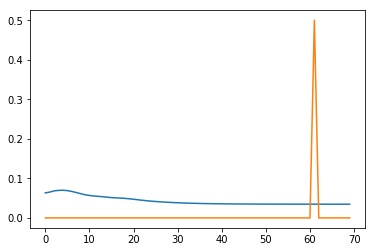

TEST recursive (8.896699486263186, 2.3735883)
Epoch 1/1
6000/6000 [==============================] - 0s 21us/step - loss: 323.6386
self-test 0.632777645306043
episode: 56   score: 1.0625   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 22us/step - loss: 302.2502
self-test 0.6364235103025127
episode: 57   score: 0.6875   memory length: 7000   epsilon: 0.009998671593271896
Y0 (52.57559, 70) (40.5, 70)


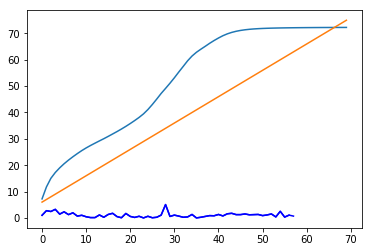

Y1 (-108.90134, 70) (-53.99362885514658, 70)


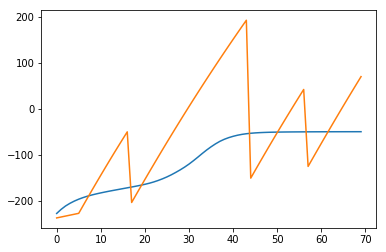

Y2 (-136.21333, 70) (-137.32180699837582, 70)


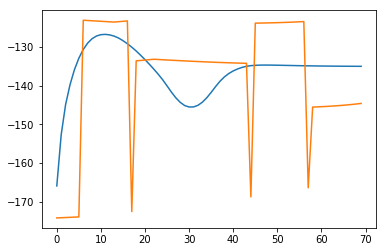

Y3 (-103.666985, 70) (-12.381342720525293, 70)


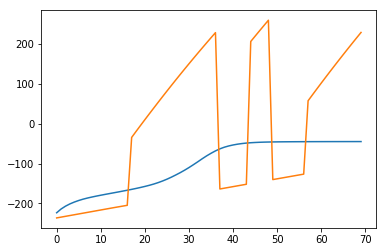

Y4 (-139.18329, 70) (-145.7556800110723, 70)


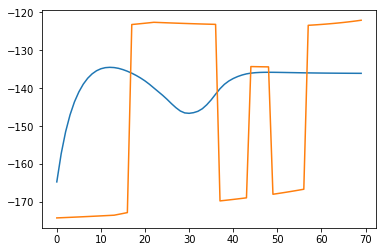

Y5 (3.7661538, 70) (4.457142857142857, 70)


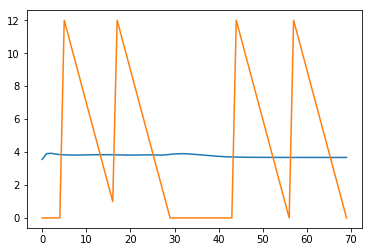

Y6 (46.675022, 70) (41.142857142857146, 70)


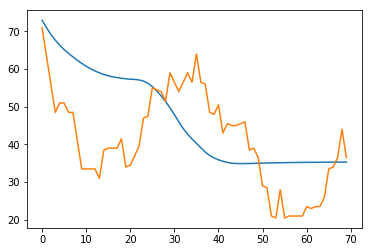

Y7 (141.58382, 70) (169.73867805979506, 70)


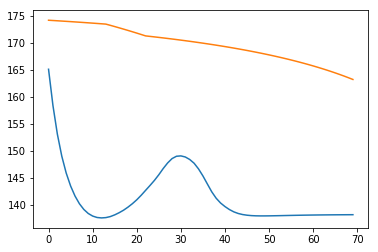

Y8 (112.91091, 70) (168.70532841898, 70)


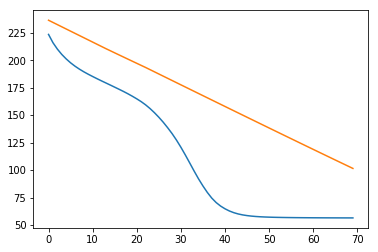

Y9 (-0.02351534, 70) (-0.5, 70)


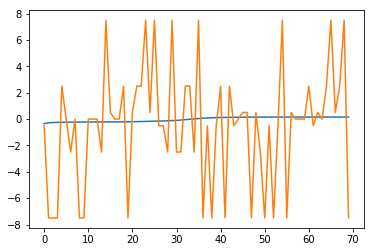

Y10 (0.3000051, 70) (0.17142857142857143, 70)


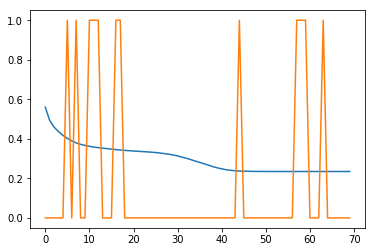

Y11 (0.035076723, 70) (0.0, 70)


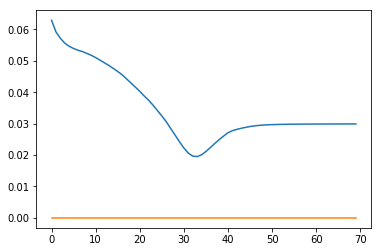

Y12 (0.20710288, 70) (0.12857142857142856, 70)


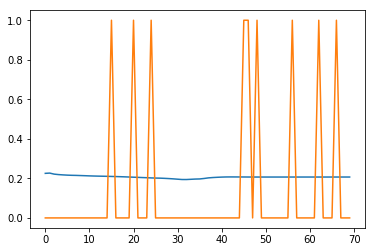

Y13 (0.057118177, 70) (0.12857142857142856, 70)


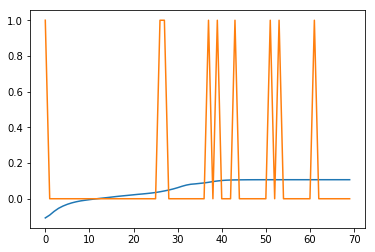

Y14 (0.11045762, 70) (0.15714285714285714, 70)


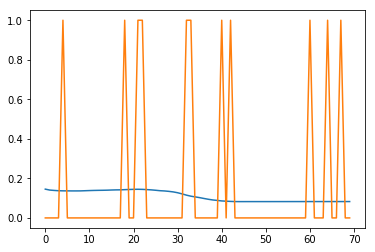

Y15 (0.14520416, 70) (0.1, 70)


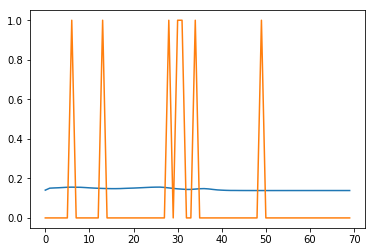

Y16 (0.014279594, 70) (0.11428571428571428, 70)


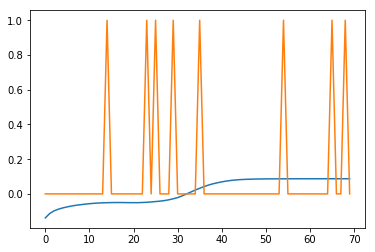

Y17 (0.19707997, 70) (0.2, 70)


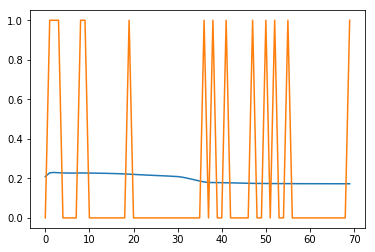

Y18 (0.3000063, 70) (0.17142857142857143, 70)


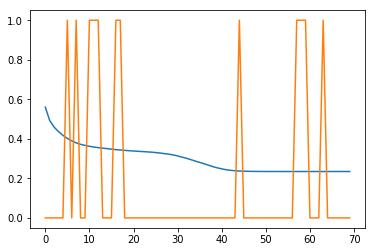

Y19 (0.035076734, 70) (0.0, 70)


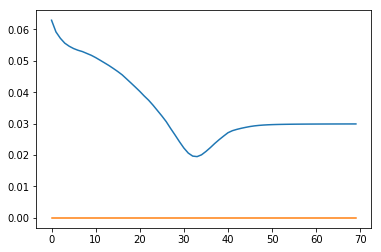

TEST recursive (8.912931959771802, 1.9315817)
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 285.6875
self-test 0.6333190407461627
episode: 58   score: 0.8125   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 19us/step - loss: 289.9326
self-test 0.6318129279736704
episode: 59   score: 0.3125   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 22us/step - loss: 303.6542
self-test 0.6351667439698675
episode: 60   score: 0.75   memory length: 7000   epsilon: 0.009998671593271896
Y0 (73.05475, 70) (113.5, 70)


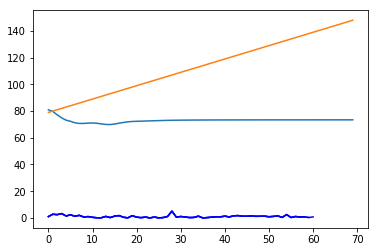

Y1 (5.979045, 70) (-76.20014008439989, 70)


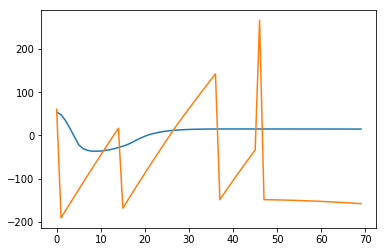

Y2 (-64.61517, 70) (4.163287872582576, 70)


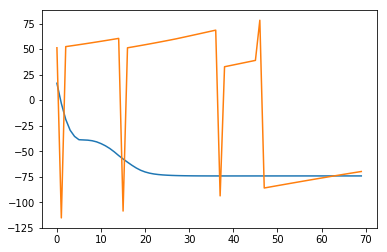

Y3 (-131.57544, 70) (30.73818091771369, 70)


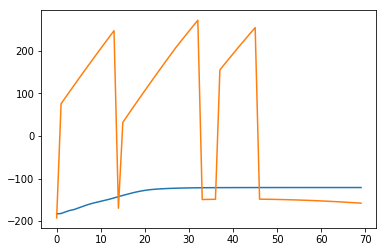

Y4 (-108.16623, 70) (1.8480780704498905, 70)


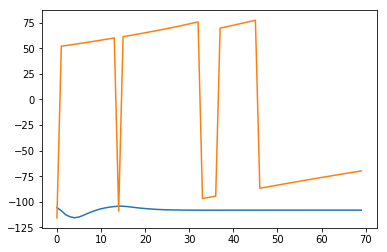

Y5 (3.265108, 70) (3.342857142857143, 70)


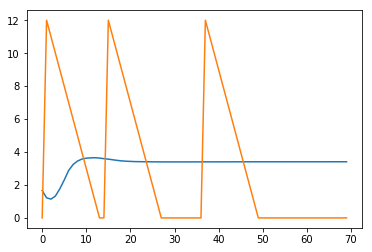

Y6 (46.450035, 70) (133.78571428571428, 70)


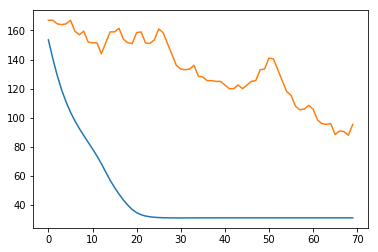

Y7 (110.88286, 70) (94.65660974621242, 70)


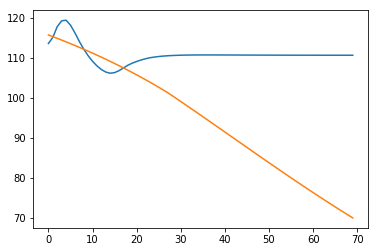

Y8 (139.67363, 70) (158.91195998663284, 70)


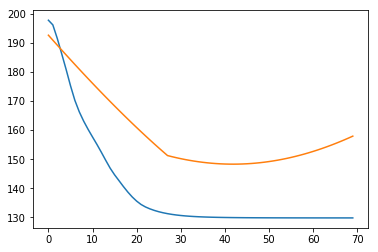

Y9 (-0.29641655, 70) (-1.0571428571428572, 70)


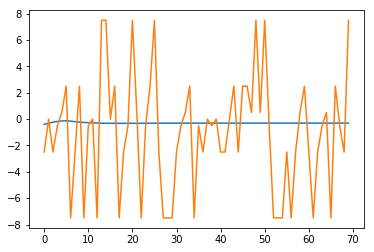

Y10 (0.24337523, 70) (0.08571428571428572, 70)


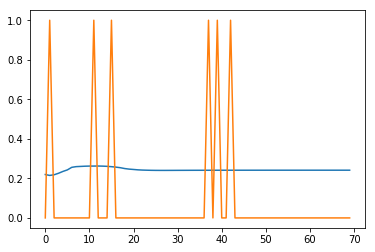

Y11 (0.00090036594, 70) (0.0008928571428571428, 70)


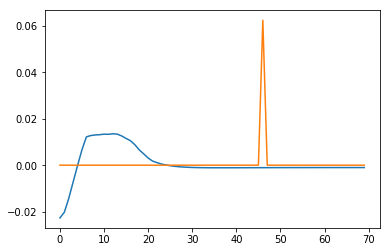

Y12 (0.22871883, 70) (0.1, 70)


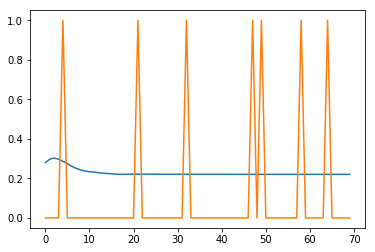

Y13 (0.13470276, 70) (0.14285714285714285, 70)


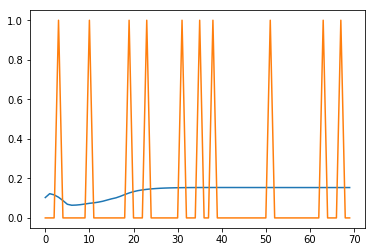

Y14 (0.061313927, 70) (0.14285714285714285, 70)


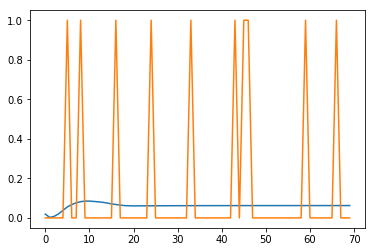

Y15 (0.054664195, 70) (0.21428571428571427, 70)


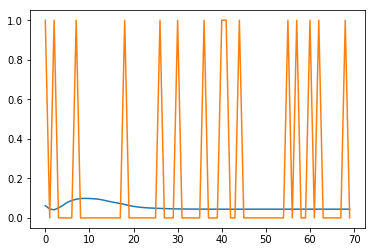

Y16 (0.19446194, 70) (0.1, 70)


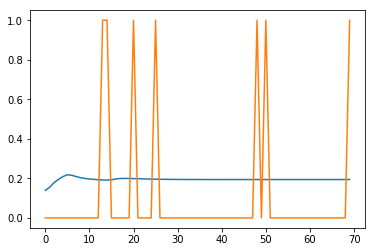

Y17 (0.06393053, 70) (0.21428571428571427, 70)


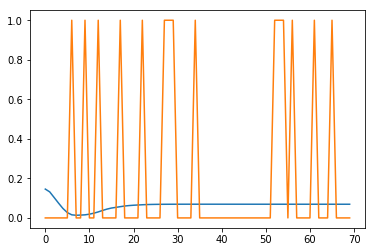

Y18 (0.24337554, 70) (0.08571428571428572, 70)


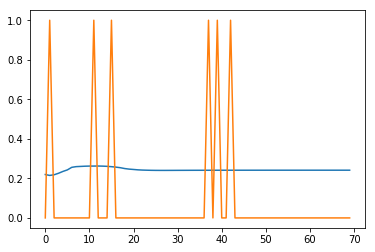

Y19 (0.00090036454, 70) (0.0008928571428571428, 70)


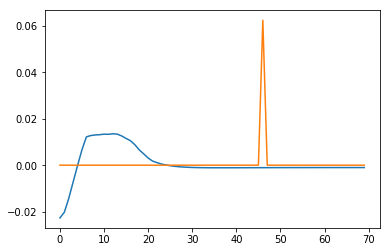

TEST recursive (8.752011429929226, -0.001881982)
hit
Epoch 1/1
6000/6000 [==============================] - 0s 21us/step - loss: 300.4756
self-test 0.6360065397023493
episode: 61   score: 1.25   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 289.9105
self-test 0.637348886583986
episode: 62   score: 0.875   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 21us/step - loss: 295.8700
self-test 0.6363898553321132
episode: 63   score: 0.3125   memory length: 7000   epsilon: 0.009998671593271896
Y0 (130.22388, 70) (165.5, 70)


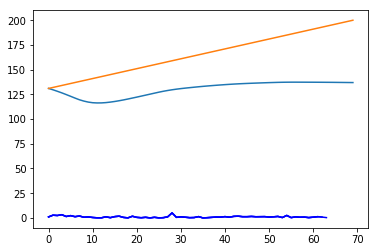

Y1 (-52.924175, 70) (-130.43592137411525, 70)


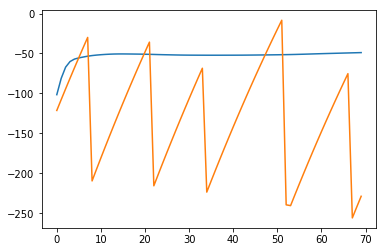

Y2 (-21.193232, 70) (1.5839322131279747, 70)


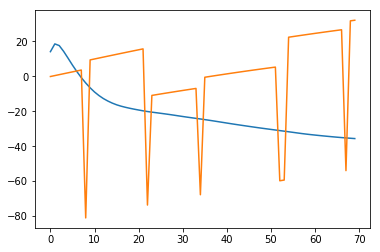

Y3 (-155.35466, 70) (-193.2081462025171, 70)


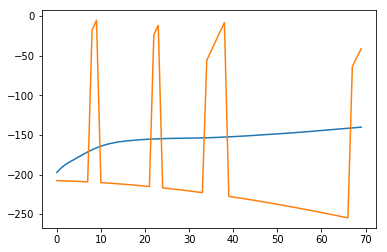

Y4 (-67.9864, 70) (-55.374723432332495, 70)


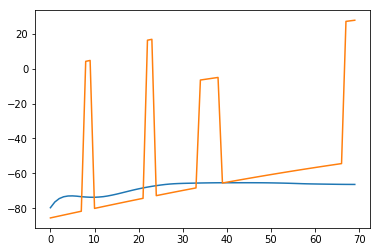

Y5 (2.6036985, 70) (5.228571428571429, 70)


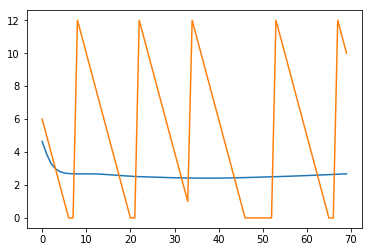

Y6 (60.73122, 70) (77.97857142857143, 70)


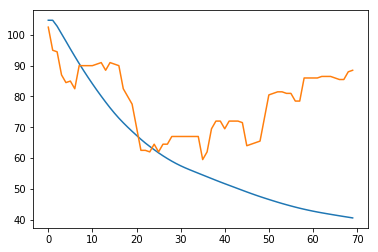

Y7 (69.288765, 70) (68.21767523820667, 70)


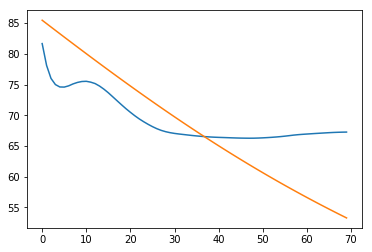

Y8 (159.71848, 70) (227.09660382439242, 70)


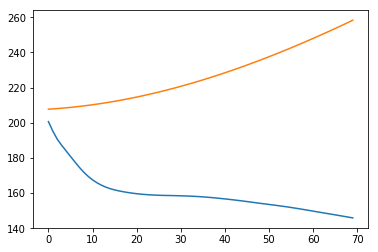

Y9 (-0.009383067, 70) (-0.2357142857142857, 70)


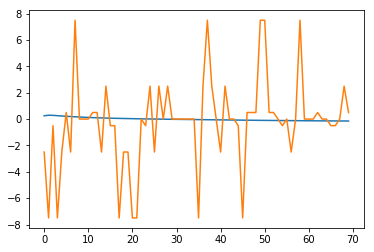

Y10 (0.25469416, 70) (0.32857142857142857, 70)


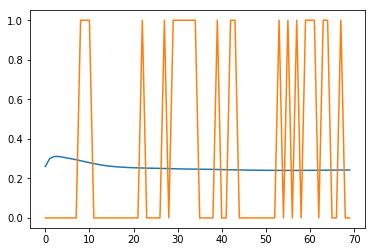

Y11 (0.016038043, 70) (0.01607142857142857, 70)


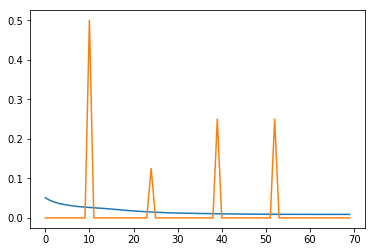

Y12 (0.07742931, 70) (0.14285714285714285, 70)


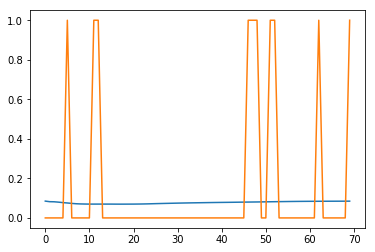

Y13 (0.16480598, 70) (0.11428571428571428, 70)


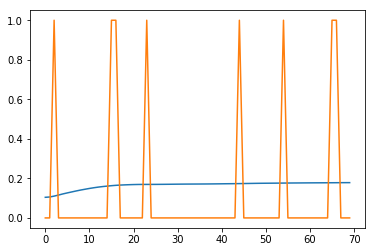

Y14 (0.010752216, 70) (0.11428571428571428, 70)


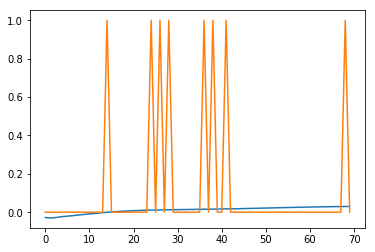

Y15 (0.20646153, 70) (0.12857142857142856, 70)


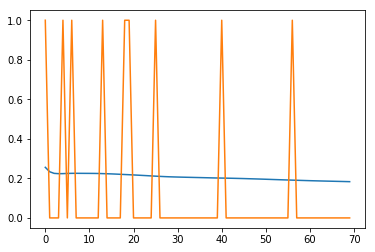

Y16 (0.09370199, 70) (0.07142857142857142, 70)


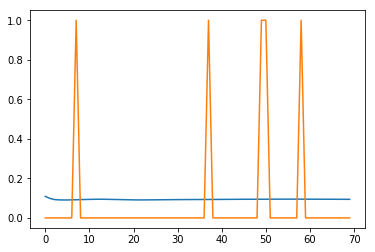

Y17 (0.19725183, 70) (0.1, 70)


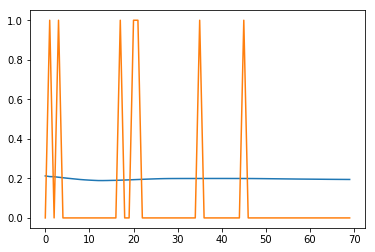

Y18 (0.25469437, 70) (0.32857142857142857, 70)


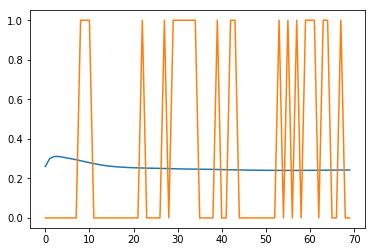

Y19 (0.01603798, 70) (0.01607142857142857, 70)


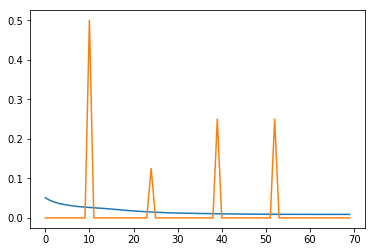

TEST recursive (8.57621566309355, 0.81763345)
Epoch 1/1
6000/6000 [==============================] - 0s 22us/step - loss: 297.5074
self-test 0.6336672890498842
episode: 64   score: 1.1875   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 27us/step - loss: 296.6811
self-test 0.6339238875840467
episode: 65   score: 0.1875   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 304.4896
self-test 0.6423241798622766
episode: 66   score: 1.4375   memory length: 7000   epsilon: 0.009998671593271896
hit
Epoch 1/1
6000/6000 [==============================] - 0s 22us/step - loss: 304.3967
self-test 0.6398302859516437
episode: 67   score: 2.375   memory length: 7000   epsilon: 0.009998671593271896
Y0 (156.19678, 70) (192.35714285714286, 70)


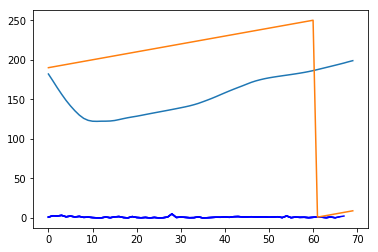

Y1 (-90.97967, 70) (-85.6177642956475, 70)


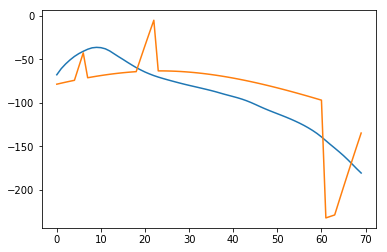

Y2 (-24.284033, 70) (-76.2635462052435, 70)


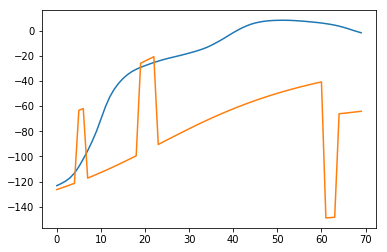

Y3 (-91.99953, 70) (-92.70768001180537, 70)


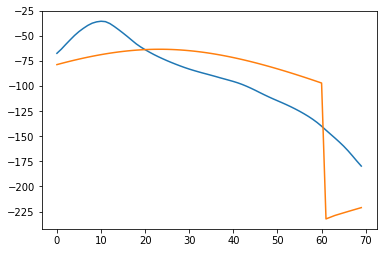

Y4 (-24.736814, 70) (-89.00490798105355, 70)


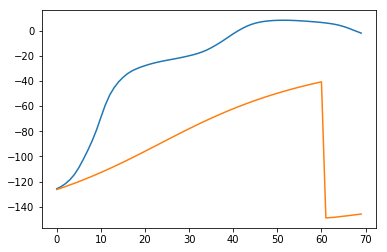

Y5 (3.5626035, 70) (3.1714285714285713, 70)


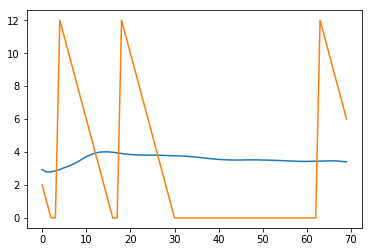

Y6 (20.336582, 70) (79.72142857142858, 70)


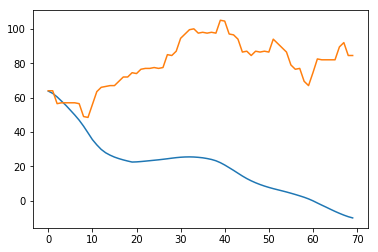

Y7 (25.307951, 70) (89.00490798105355, 70)


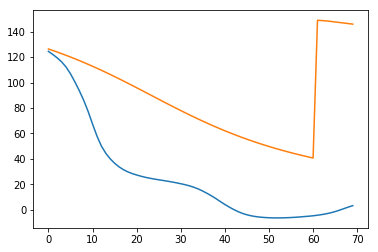

Y8 (93.23601, 70) (92.70768001180537, 70)


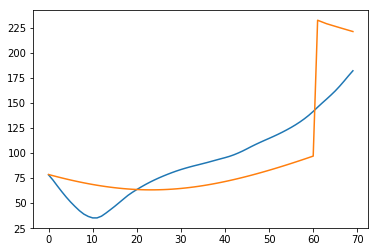

Y9 (-0.49012822, 70) (0.17857142857142858, 70)


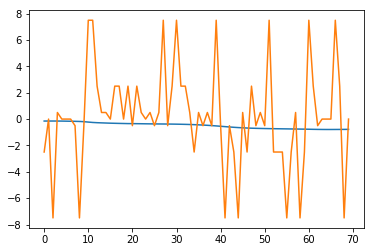

Y10 (0.11455987, 70) (0.15714285714285714, 70)


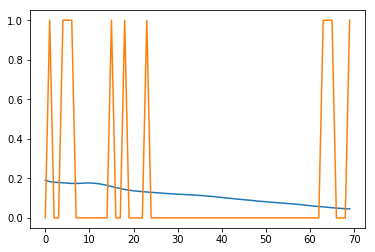

Y11 (-0.004171656, 70) (0.005357142857142857, 70)


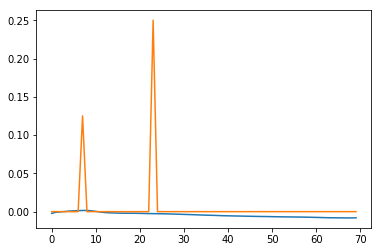

Y12 (0.06874446, 70) (0.17142857142857143, 70)


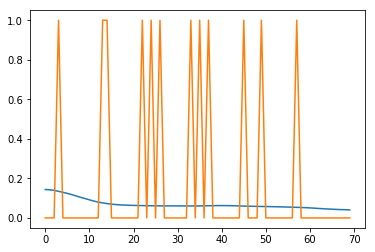

Y13 (0.21739426, 70) (0.17142857142857143, 70)


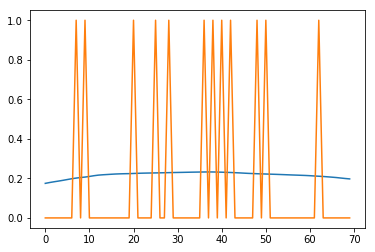

Y14 (0.053519387, 70) (0.15714285714285714, 70)


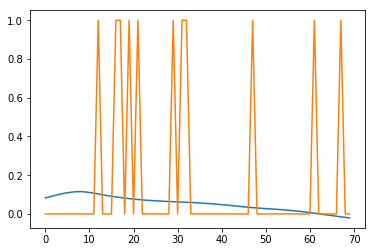

Y15 (0.18778293, 70) (0.12857142857142856, 70)


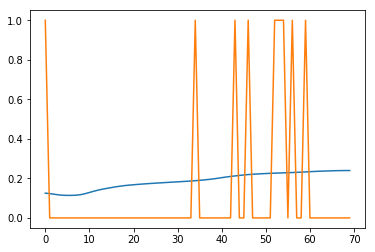

Y16 (0.086901404, 70) (0.11428571428571428, 70)


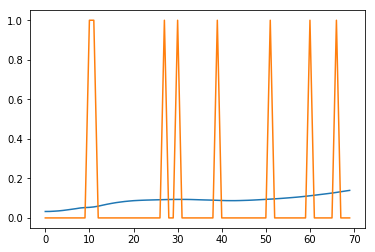

Y17 (0.24983785, 70) (0.1, 70)


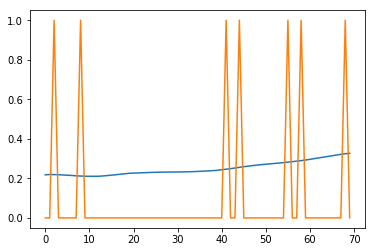

Y18 (0.11456011, 70) (0.15714285714285714, 70)


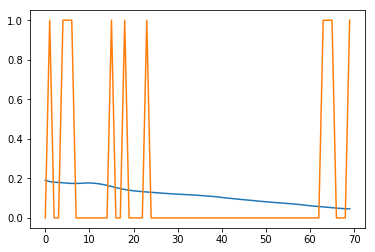

Y19 (-0.0041716546, 70) (0.005357142857142857, 70)


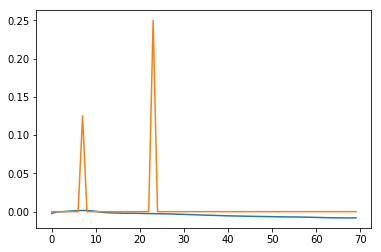

TEST recursive (8.347424661372742, -0.25612515)
hit
Y0 (156.24907, 70) (166.5, 70)


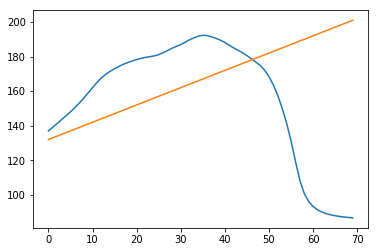

Y1 (74.06504, 70) (-173.9297996980186, 70)


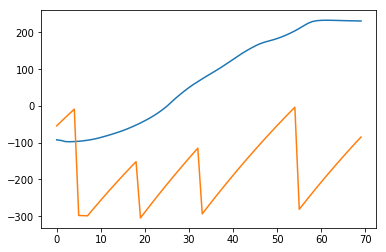

Y2 (-95.93472, 70) (-34.362153411976664, 70)


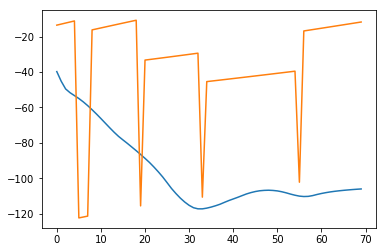

Y3 (-178.62737, 70) (-132.0371876980908, 70)


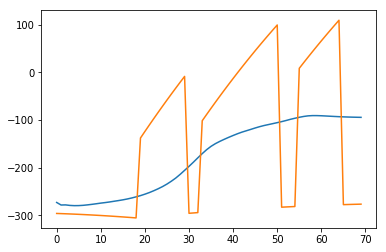

Y4 (-142.54333, 70) (-63.74659633237382, 70)


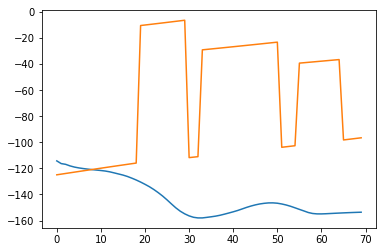

Y5 (0.9144416, 70) (4.457142857142857, 70)


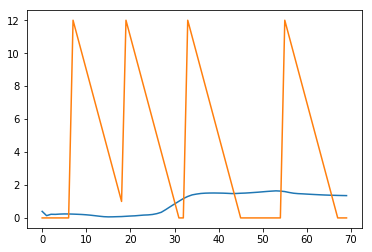

Y6 (53.153984, 70) (79.65, 70)


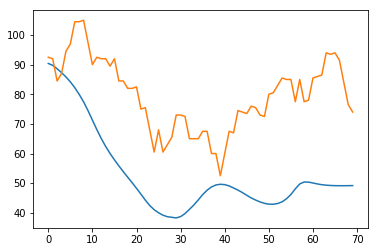

Y7 (141.04243, 70) (110.15064184739084, 70)


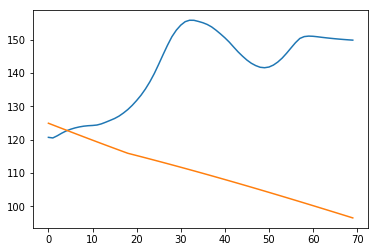

Y8 (184.10657, 70) (291.2852262001302, 70)


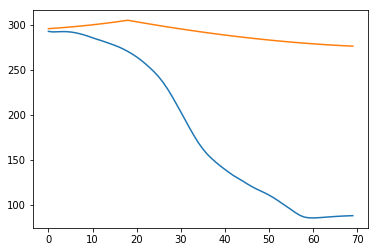

Y9 (0.3841332, 70) (-0.22857142857142856, 70)


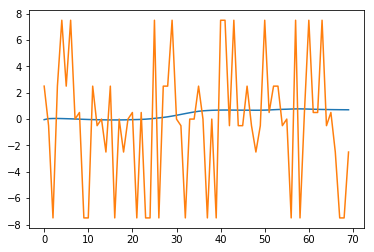

Y10 (0.122497626, 70) (0.14285714285714285, 70)


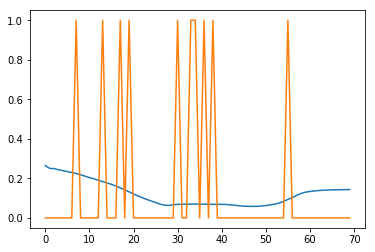

Y11 (-0.019215494, 70) (0.005357142857142857, 70)


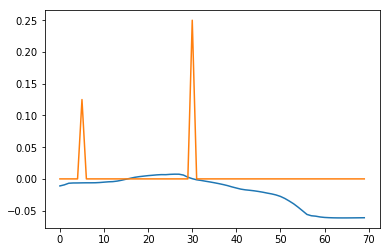

Y12 (0.2045021, 70) (0.11428571428571428, 70)


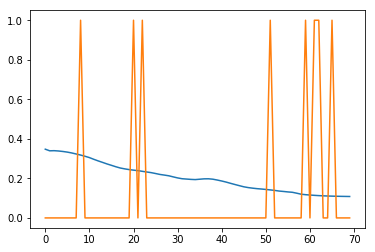

Y13 (-0.028515687, 70) (0.14285714285714285, 70)


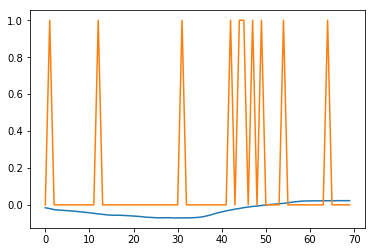

Y14 (0.09911813, 70) (0.15714285714285714, 70)


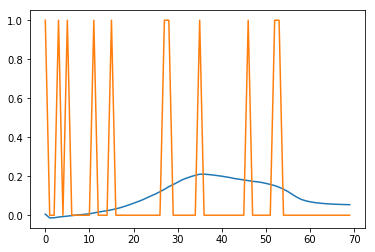

Y15 (0.3639439, 70) (0.07142857142857142, 70)


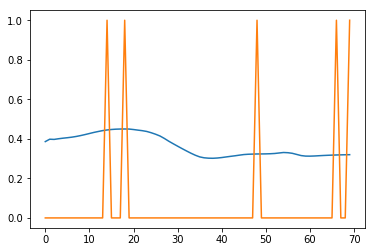

Y16 (0.37796032, 70) (0.15714285714285714, 70)


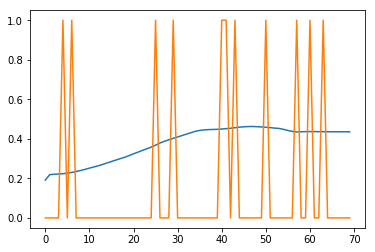

Y17 (-0.13593984, 70) (0.21428571428571427, 70)


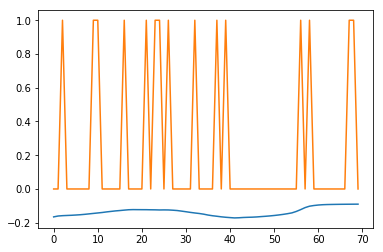

Y18 (0.12249731, 70) (0.14285714285714285, 70)


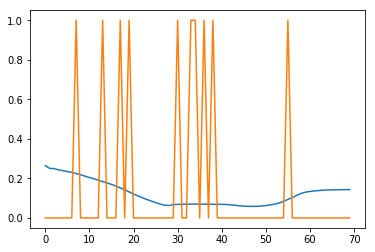

Y19 (-0.019215556, 70) (0.005357142857142857, 70)


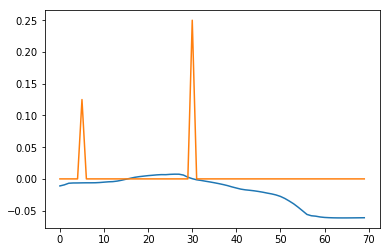

TEST recursive (8.332363816382495, -0.830834)
Epoch 1/1
6000/6000 [==============================] - 0s 21us/step - loss: 297.9039
self-test 0.63289690599546
episode: 68   score: 2.375   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 22us/step - loss: 314.8250
self-test 0.6351296916105482
episode: 69   score: 0.375   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 19us/step - loss: 307.1420
self-test 0.6369517449096938
episode: 70   score: 0.375   memory length: 7000   epsilon: 0.009998671593271896
Y0 (117.1946, 70) (141.5, 70)


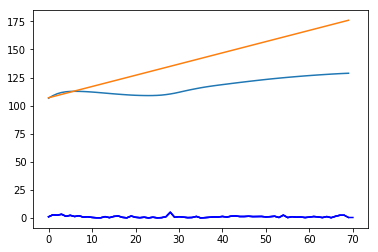

Y1 (-80.76015, 70) (-132.42603376110756, 70)


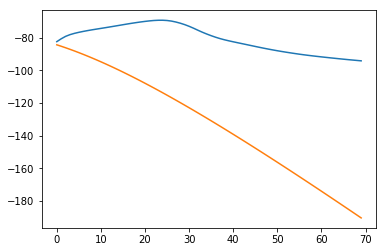

Y2 (-46.355293, 70) (-38.457769861135674, 70)


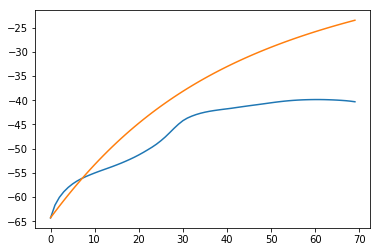

Y3 (-91.71244, 70) (-132.42603376110756, 70)


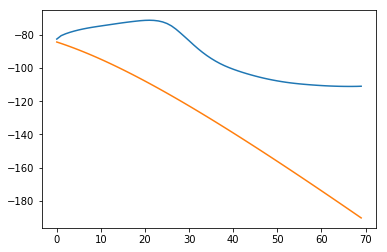

Y4 (-52.36587, 70) (-38.457769861135674, 70)


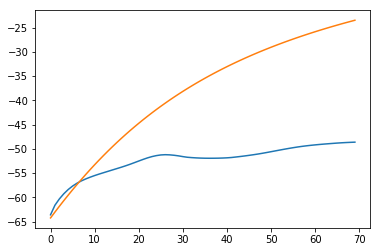

Y5 (4.4387074, 70) (4.442857142857143, 70)


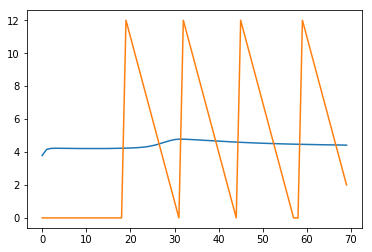

Y6 (6.421043, 70) (-31.12142857142857, 70)


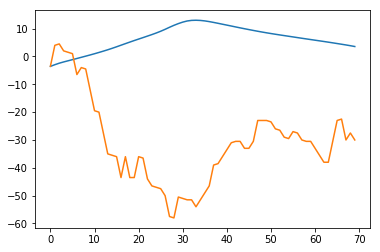

Y7 (52.492855, 70) (38.457769861135674, 70)


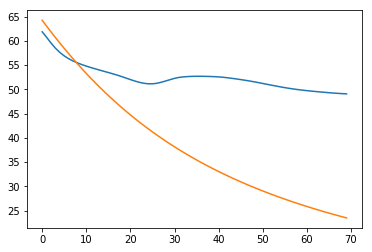

Y8 (92.54009, 70) (132.42603376110756, 70)


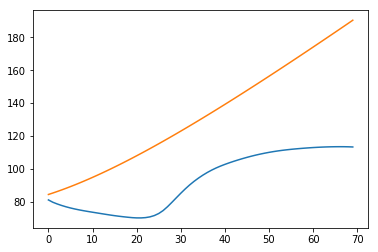

Y9 (-0.51517856, 70) (-0.2714285714285714, 70)


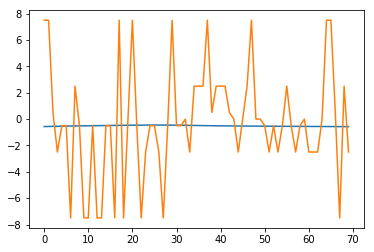

Y10 (0.1504225, 70) (0.11428571428571428, 70)


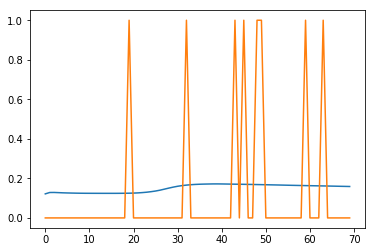

Y11 (-0.00061502075, 70) (0.0008928571428571428, 70)


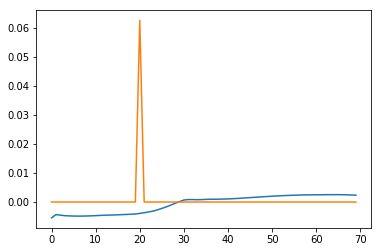

Y12 (0.026890673, 70) (0.05714285714285714, 70)


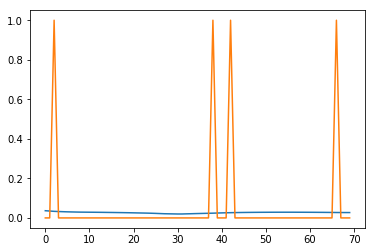

Y13 (0.19395788, 70) (0.24285714285714285, 70)


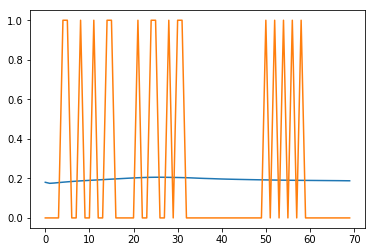

Y14 (0.15792358, 70) (0.14285714285714285, 70)


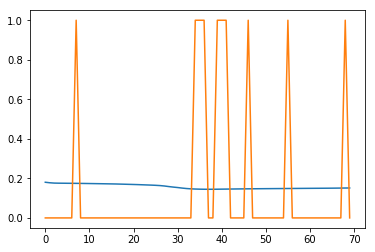

Y15 (0.2345906, 70) (0.17142857142857143, 70)


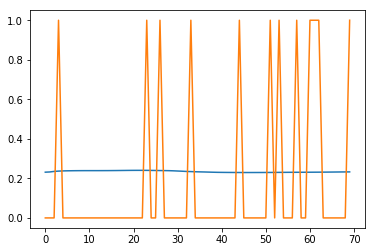

Y16 (0.069551475, 70) (0.12857142857142856, 70)


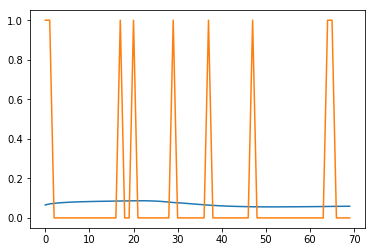

Y17 (0.1287752, 70) (0.14285714285714285, 70)


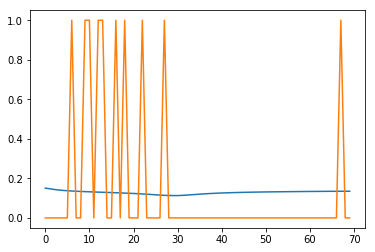

Y18 (0.15042277, 70) (0.11428571428571428, 70)


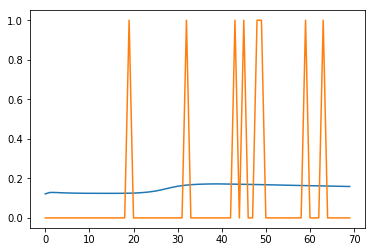

Y19 (-0.000615059, 70) (0.0008928571428571428, 70)


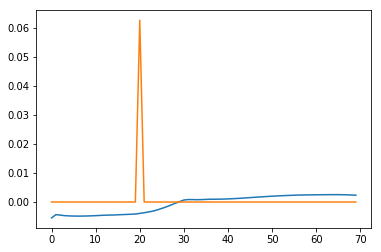

TEST recursive (8.378886724308535, 0.005650724)
Epoch 1/1
6000/6000 [==============================] - 0s 21us/step - loss: 311.5796
self-test 0.6346519967932096
episode: 71   score: 0.3125   memory length: 7000   epsilon: 0.009998671593271896
hit
Y0 (214.74438, 70) (198.5, 70)


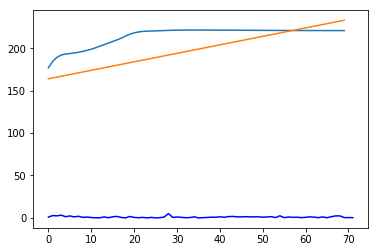

Y1 (-32.200787, 70) (-229.69756082787393, 70)


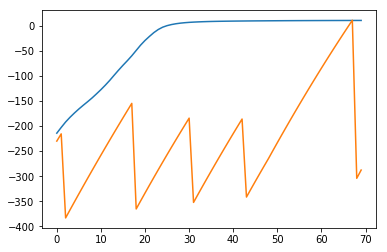

Y2 (-69.35443, 70) (-78.85527301568641, 70)


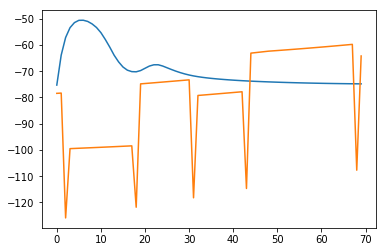

Y3 (78.3539, 70) (-84.58785579563005, 70)


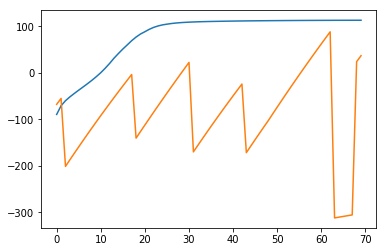

Y4 (-77.653404, 70) (-81.93243042368191, 70)


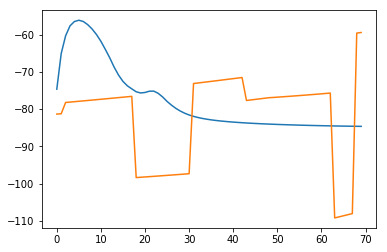

Y5 (2.018004, 70) (4.8, 70)


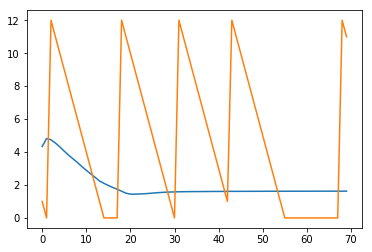

Y6 (84.71877, 70) (44.97142857142857, 70)


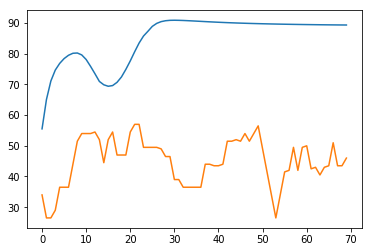

Y7 (132.85976, 70) (117.09507107757514, 70)


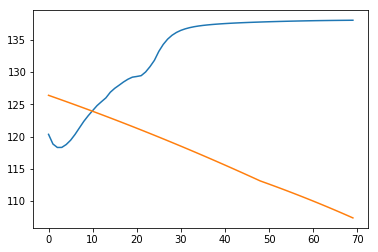

Y8 (230.31735, 70) (347.4743049587692, 70)


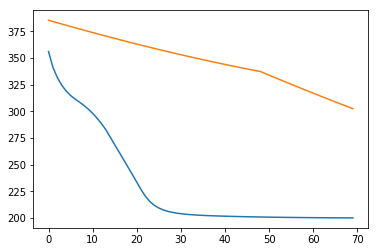

Y9 (0.84003067, 70) (0.20714285714285716, 70)


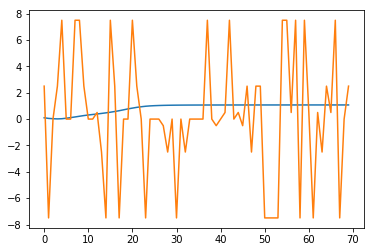

Y10 (0.18016124, 70) (0.3, 70)


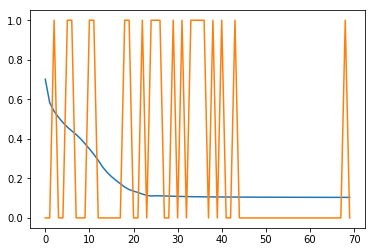

Y11 (-0.10271614, 70) (0.0, 70)


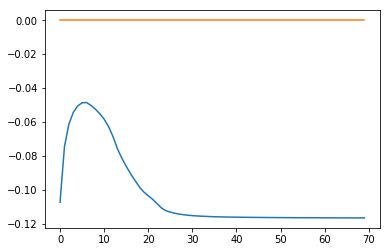

Y12 (0.16619977, 70) (0.1, 70)


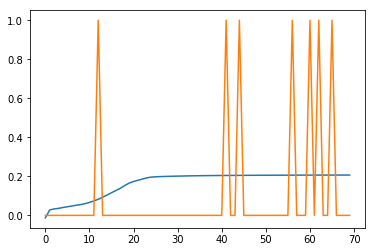

Y13 (0.0064173555, 70) (0.04285714285714286, 70)


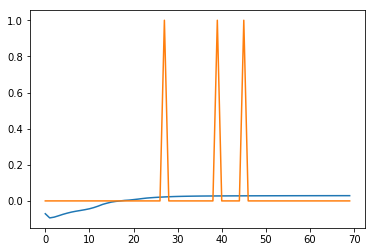

Y14 (0.242516, 70) (0.14285714285714285, 70)


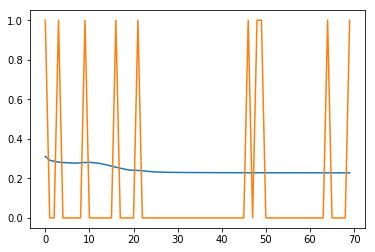

Y15 (0.043175906, 70) (0.07142857142857142, 70)


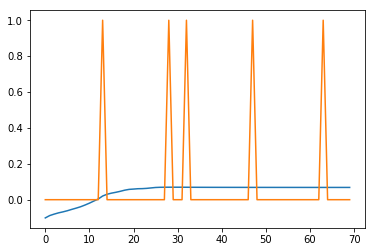

Y16 (0.07059928, 70) (0.17142857142857143, 70)


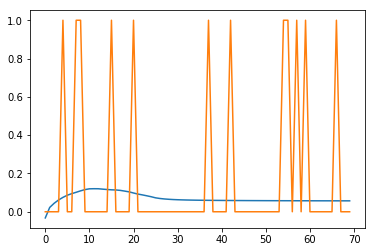

Y17 (0.22191884, 70) (0.17142857142857143, 70)


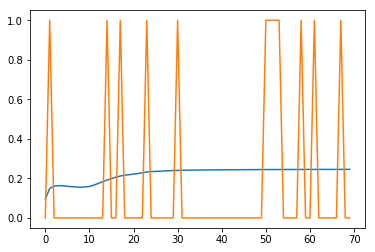

Y18 (0.180161, 70) (0.3, 70)


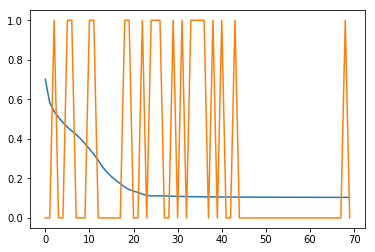

Y19 (-0.10271621, 70) (0.0, 70)


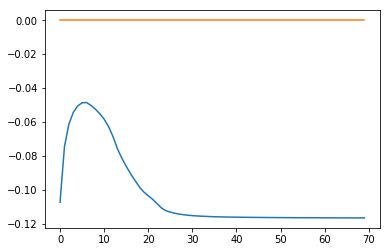

TEST recursive (8.420762135135273, -6.451032)
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 315.7203
self-test 0.6345490619860554
episode: 72   score: 1.1875   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 21us/step - loss: 294.7283
self-test 0.6338179771938062
episode: 73   score: 1.6875   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 21us/step - loss: 285.7463
self-test 0.6353726420457897
episode: 74   score: 0.875   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 287.1677
self-test 0.6358288701057659
episode: 75   score: 1.25   memory length: 7000   epsilon: 0.009998671593271896
Y0 (124.56952, 70) (154.5, 70)


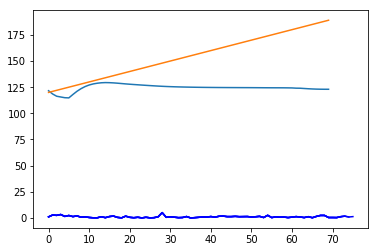

Y1 (-49.77747, 70) (-56.796019583723854, 70)


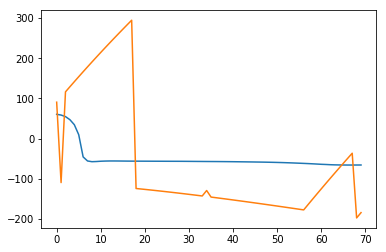

Y2 (-22.624659, 70) (-5.853511310143678, 70)


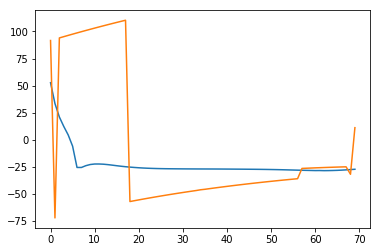

Y3 (-105.13499, 70) (-142.23614769164115, 70)


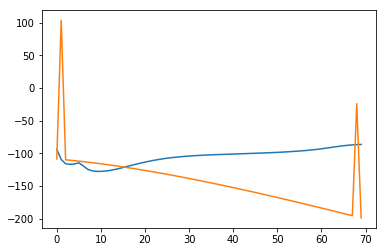

Y4 (-44.97439, 70) (-45.74214175560636, 70)


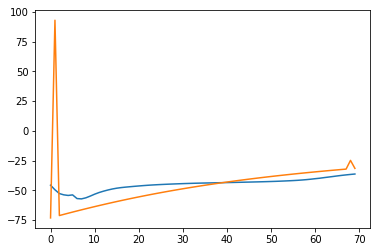

Y5 (4.1195097, 70) (4.785714285714286, 70)


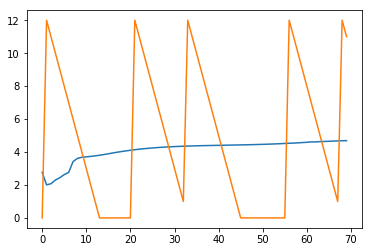

Y6 (33.158806, 70) (24.52857142857143, 70)


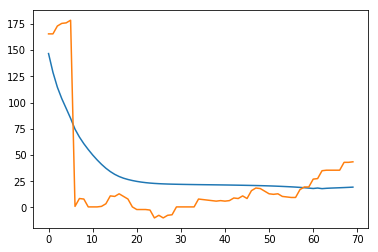

Y7 (47.73498, 70) (48.199318039778504, 70)


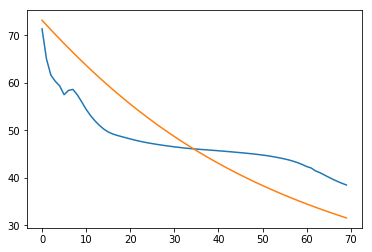

Y8 (111.107376, 70) (147.7508977012561, 70)


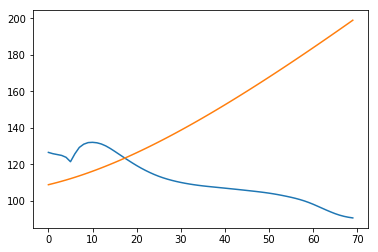

Y9 (-0.082517795, 70) (0.8357142857142857, 70)


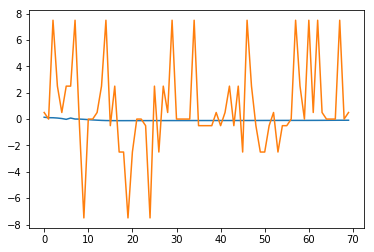

Y10 (0.23808144, 70) (0.21428571428571427, 70)


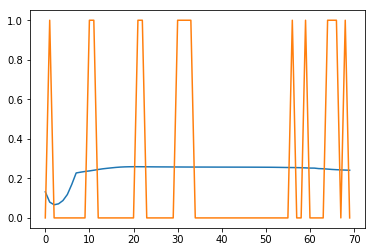

Y11 (0.011266206, 70) (0.0017857142857142857, 70)


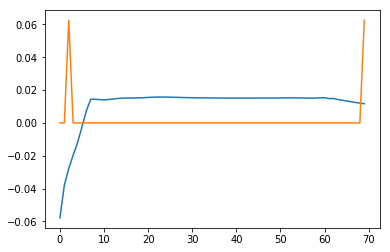

Y12 (0.077063955, 70) (0.14285714285714285, 70)


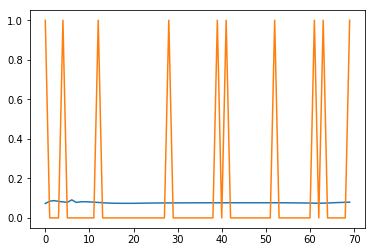

Y13 (0.038208794, 70) (0.18571428571428572, 70)


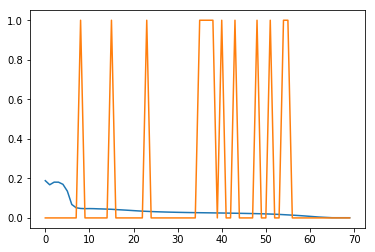

Y14 (0.2378566, 70) (0.15714285714285714, 70)


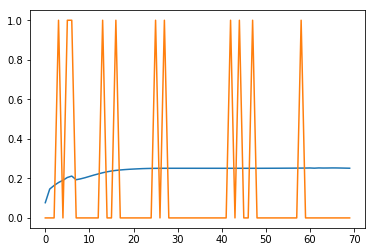

Y15 (0.12754826, 70) (0.11428571428571428, 70)


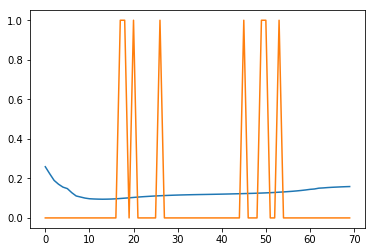

Y16 (0.11389958, 70) (0.14285714285714285, 70)


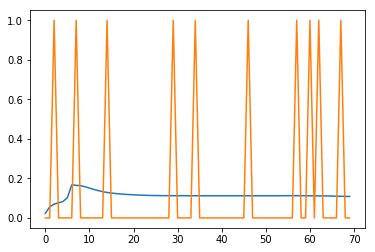

Y17 (0.09722938, 70) (0.04285714285714286, 70)


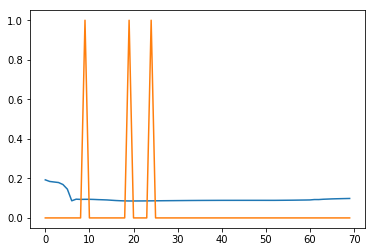

Y18 (0.2380816, 70) (0.21428571428571427, 70)


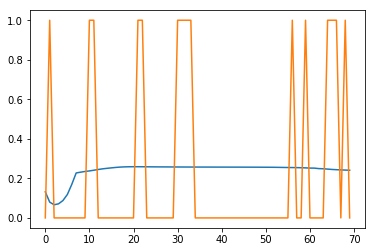

Y19 (0.011266201, 70) (0.0017857142857142857, 70)


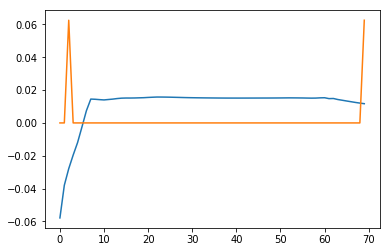

TEST recursive (8.290674105347248, 0.7732021)
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 287.3657
self-test 0.6342887162732131
episode: 76   score: 1.0625   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 288.9641
self-test 0.633834786093159
episode: 77   score: 0.875   memory length: 7000   epsilon: 0.009998671593271896
Y0 (195.05124, 70) (76.64285714285714, 70)


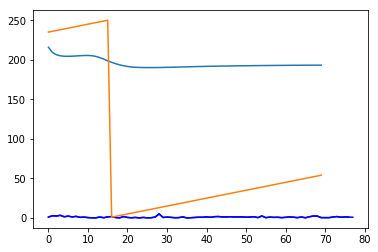

Y1 (-63.91955, 70) (-150.19881247120418, 70)


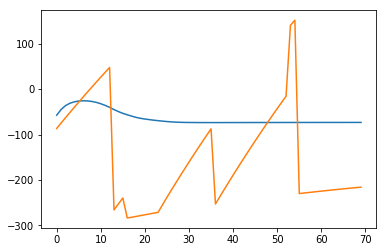

Y2 (7.308805, 70) (-29.7942527230697, 70)


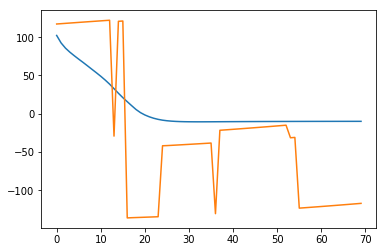

Y3 (-193.52502, 70) (-167.41067879884568, 70)


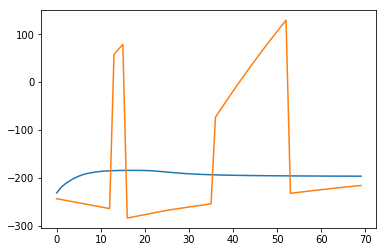

Y4 (-40.56038, 70) (-76.46846980569084, 70)


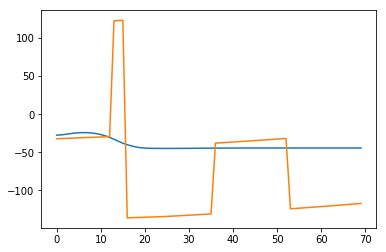

Y5 (2.132255, 70) (2.7142857142857144, 70)


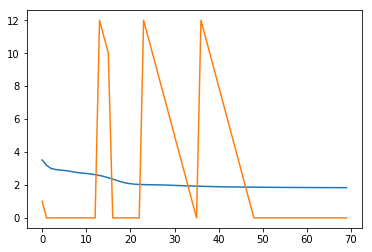

Y6 (68.35296, 70) (119.39285714285714, 70)


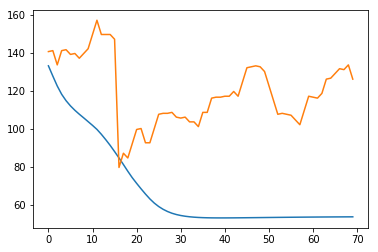

Y7 (41.572548, 70) (105.49645609304987, 70)


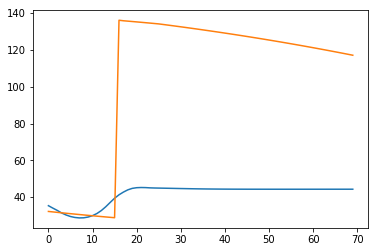

Y8 (196.86969, 70) (248.35058962981378, 70)


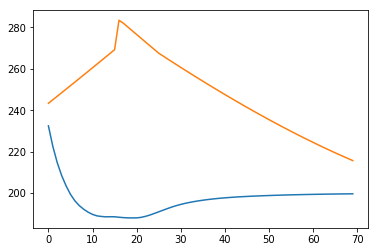

Y9 (0.056840084, 70) (0.7571428571428571, 70)


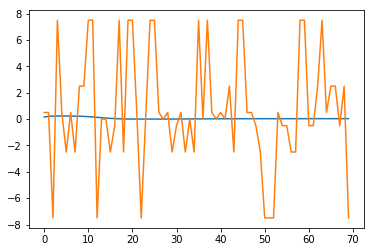

Y10 (-0.011036199, 70) (0.11428571428571428, 70)


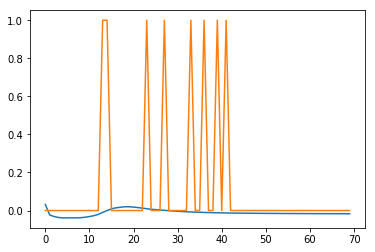

Y11 (0.024391491, 70) (0.0017857142857142857, 70)


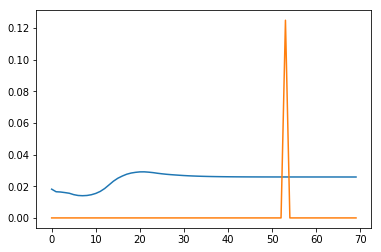

Y12 (0.3619679, 70) (0.2, 70)


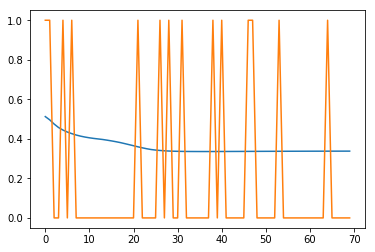

Y13 (-0.0062729535, 70) (0.11428571428571428, 70)


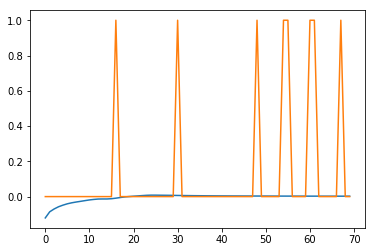

Y14 (0.108360335, 70) (0.1, 70)


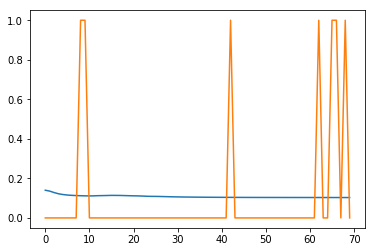

Y15 (0.13931741, 70) (0.15714285714285714, 70)


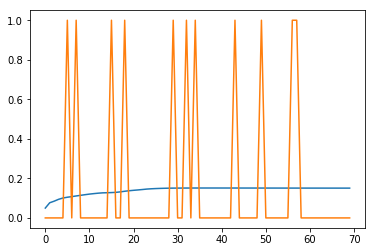

Y16 (0.07277134, 70) (0.21428571428571427, 70)


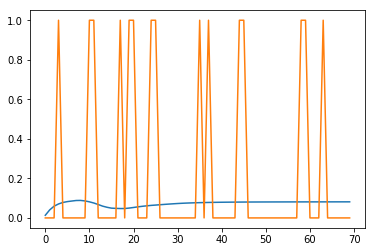

Y17 (0.2368309, 70) (0.1, 70)


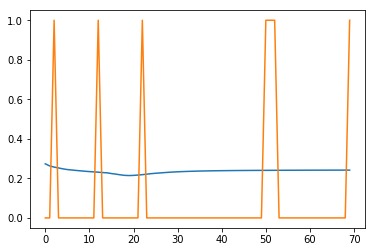

Y18 (-0.011036213, 70) (0.11428571428571428, 70)


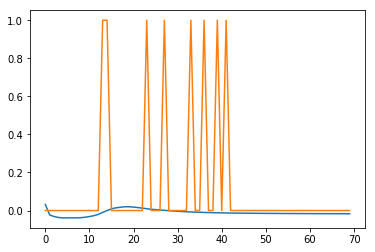

Y19 (0.024391482, 70) (0.0017857142857142857, 70)


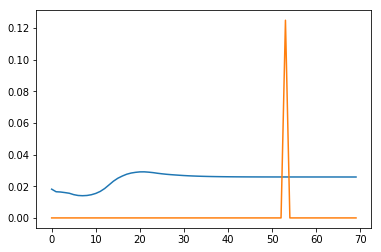

TEST recursive (8.192254375074485, 1.4854071)
Epoch 1/1
6000/6000 [==============================] - 0s 22us/step - loss: 288.2090
self-test 0.6380920365006174
episode: 78   score: 0.375   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 21us/step - loss: 290.8155
self-test 0.6372798643399393
episode: 79   score: 0.375   memory length: 7000   epsilon: 0.009998671593271896
Epoch 1/1
6000/6000 [==============================] - 0s 20us/step - loss: 298.9652
self-test 0.6345744845746362
episode: 80   score: 1.625   memory length: 7000   epsilon: 0.009998671593271896
hit
hit
Epoch 1/1
6000/6000 [==============================] - 0s 28us/step - loss: 303.8859
self-test 0.6396326541920729
episode: 81   score: 3.125   memory length: 7000   epsilon: 0.009998671593271896
hit
Epoch 1/1
6000/6000 [==============================] - 0s 22us/step - loss: 298.1631
self-test 0.6371857786016569
episode: 82   score: 1.6875   memory length: 700

In [ ]:
# In case of CartPole-v1, maximum length of episode is 500
env = aa_gun.AA_gun_simple0_env()
#env = gym.make('AirRaid-ram-v0')
#env = gym.make('Robotank-ramNoFrameskip-v0')
#env = gym.make('Seaquest-ramNoFrameskip-v0')
#env=CartPoleEnv9()
# get size of state and action from environment
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

#agent = DoubleDQNAgent(state_size, action_size)
agent = model_based.ModelBasedAgent(state_size, action_size)
#agent = clusterized_ql.ClusterQLAgent(state_size, action_size)
agent.train_start=3000
#agent = strategy_imitation.ImitAgent(state_size, action_size)
agent.render=False

scores, episodes = [], []
reward_lst = []
s_list=[]
a_list=[]

for e in range(EPISODES):
    done = False
    score = 0
    state = env.reset()
    state = np.reshape(state, [1, state_size])

    while not done:
        if (e in range(100,300)) or (e in range(300,306)) or (e in range(400,406)) or (e in range(500,506)) or (e in range(600,604)):
            if agent.render:
                env.render()

        # get action for the current state and go one step in environment
        verbose = np.random.rand()<0.00001
        action = agent.get_action(state,verbose)
        next_state, reward, done, info = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        # if an action make the episode end, then gives penalty of -100
        

        # save the sample <s, a, r, s'> to the replay memory
        reward_curr=reward
        #if done:
        #    reward_curr -= 100
        agent.append_sample(state, action, reward_curr, next_state, done)
        #if next_state[0,11]!=reward:
        #    print('state[13]!=reward',state[0,11],reward)
        #
        s_list.append(state)
        a_list.append(action)
        reward_lst.append(reward)
        #
        
        # every time step do the training
        agent.train_model()
        score += reward
        state = next_state

        if done:
            # every episode update the target model to be same with model
            agent.update_target_model()

            # every episode, plot the play time
            scores.append(score)
            episodes.append(e)
            pylab.plot(episodes, scores, 'b')
            #pylab.savefig("./save_graph/aa_gun_dqn.png")
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.s), "  epsilon:", agent.epsilon)

            # if the mean of scores of last 10 episode is bigger than 490
            # stop training
        if np.random.rand()<0.001:
            print('TEST recursive',agent.test_model_recursive())
    # save the model
    #if e % 50 == 0:
    #    agent.model.save_weights("./save_model/aa_gun_dqn.h5")

In [ ]:
agent.get_action(state,True)

In [ ]:
agent.sans_mn[2]

In [ ]:
agent.saq_mn

In [ ]:
agent.nsr_mn

In [ ]:
def make_sar_table(s,a,r):
    #print(np.array(a,ndmin=2).T.shape)
    #print(np.array(r,ndmin=2).T.shape)
    #print(np.array(s,ndmin=2)[:,0,:].shape)
    return np.hstack( (np.array(s,ndmin=2)[:,0,:],np.array(a,ndmin=2).T,np.array(r,ndmin=2).T) )

In [ ]:
import matplotlib.pyplot as plt
print(np.mean(reward_lst))
plt.plot(reward_lst)

In [ ]:
plt.plot(agent.r_disco)
#plt.plot(agent.d*20)

In [ ]:
np.mean(reward_lst)

In [ ]:
np.mean(score)

In [ ]:
#Чтобы анализировать разрешимость задачи
def replicate_reward(sar,border=0,wanted_part=0.5):
    part = np.mean(sar[:,-1:]>border)
    if part==0:
        print('ERROR')
        return(sar)
    else:
        while part<wanted_part:
            sar=np.vstack((sar,sar[np.where(sar[:,-1:]>border)[0],:]))
            part = np.mean(sar[:,-1:]>border)
        print(part)
        return(sar)

In [ ]:
sar=make_sar_table(s_list,a_list,reward_lst)
sar=replicate_reward(sar)
X=sar[1:,:]
Y=sar[:-1,:]
Y=sar[:-1,-1:]
Y=sar[1:,-1:]
sar_width=X.shape[1]
nn = Sequential()
nn.add(Dense(200, input_dim=sar_width, activation='relu',
                kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.01)))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))
nn.add(Dense(200, activation='relu',
                kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.01)))
nn.add(Dropout(0.2))
nn.add(BatchNormalization())
nn.add(Dense(200, activation='relu',
                kernel_initializer='he_uniform',kernel_regularizer=keras.regularizers.l2(0.01)))
nn.add(Dropout(0.2))
nn.add(BatchNormalization())
#nn.add(Dense(sar_width, activation='linear',
#                kernel_initializer='he_uniform'))
nn.add(Dense(1, activation='linear',
                kernel_initializer='he_uniform'))

nn.summary()
nn.compile(loss='mse', optimizer=Adam(lr=0.001))
l=X.shape[0]
X_train=X[:int(l/2),:]
Y_train=Y[:int(l/2),:]
X_test=X[int(l/2):,:]
Y_test=Y[int(l/2):,:]
nn.fit(X_train, Y_train, batch_size=1200,epochs=30000, verbose=1)

In [ ]:
Y_pred=np.array(nn.predict(X_test),ndmin=2)
mse = np.mean((Y_pred-Y_test)**2)
print(mse)
rmae=np.mean(np.abs(Y_pred-Y_test))/np.mean(np.abs(Y_test))
print(rmae)
rmae_diversed=np.mean(np.abs(Y_pred-Y_test),axis=0)/np.mean(np.abs(Y_test),axis=0)
print(rmae_diversed)

In [ ]:
colnumn_num=-1
plt.plot(Y_pred[:3000,colnumn_num])
plt.plot(Y_test[:3000,colnumn_num])
plt.show()

In [ ]:
#train (переобучение?)
Y_pred=np.array(nn.predict(X_train),ndmin=2)
mse = np.mean((Y_pred-Y_train)**2)
print(mse)
rmae=np.mean(np.abs(Y_pred-Y_train))/np.mean(np.abs(Y_train))
print(rmae)
rmae_diversed=np.mean(np.abs(Y_pred-Y_train),axis=0)/np.mean(np.abs(Y_train),axis=0)
print(rmae_diversed)

colnumn_num=-1
plt.plot(Y_pred[:1300,colnumn_num])
plt.plot(Y_train[:1300,colnumn_num])
plt.show()

In [ ]:
import xgboost as xgb
xgbparams = {
    'booster':'gbtree',
    'metric':'mse',
    'objective':'reg:squarederror',
    'verbosity':0,
    'max_depth': 7,
    'n_estimators': 90,
    'eta': 0.3,
    'nthreads': 2,
    'seed':0
}
nn=xgb.XGBRegressor(**xgbparams)
nn.fit(X_train[:int(l/4),:], Y_train[:int(l/4),:],
           eval_set=[(X_train[int(l/4):,:], Y_train[int(l/4):,:])],
           verbose=True)

In [ ]:
import pandas as pd
df=pd.DataFrame(sar)
df[df[13]>0]